# Halo Mass Distribution

The goal of this section is to calculate the dark matter distribution function for the EAGLE database and comparing it to the distributions found in the Colossus package. This will allow us to use the colossus halo mass function when analysing the quasars. It will mainly be beneficial becuase the halo mass function is very well understood with a lot of research gone into it meaning it will make otu results more accurate. Also because the function will be an analytic function, specifically a derivative of the Press-Schecter Function, it will allow us to gain much higher resolution when we use it for analysis.


## Simulation
The Simulation considered here will be a Dark Matter Only Simulation detailed below:

### $\color{red}{Simulation Name}$
L0100N1504


### $\color{red}{Simulation Size}$

$100 cMpc^3$


### $\color{red}{Particle Number}$
$1504^3	$

## Installed Packages
Below are the packages that will be used during this section

In [1]:
from colossus.lss import mass_function
from colossus.cosmology import cosmology
import numpy as np
import matplotlib.pyplot as plt
import eagleAnalysisTools as EAT
from scipy.stats import chisquare

## Code
Below is the Code constructing the Halo Mass Distribution

### Testing Colossus Module
Firstly, I need to learn how to use the Colossus package so that I can accurately compare the eagle database to them. The main factors that I need to consider are the cosmology that is assumed in the calculation, the value of the Hubble Parameter used and the form of the Halo Mass Function. The cosmology that I used is the 'Planck18' cosmology [(Plank Collaboration, 2018)](https://arxiv.org/abs/1807.06209), the hubble parameter is not

<ipython-input-2-e80450a57e4c>:16: RuntimeWarning: divide by zero encountered in log10
  y = np.log10(HMD)
<ipython-input-2-e80450a57e4c>:16: RuntimeWarning: divide by zero encountered in log10
  y = np.log10(HMD)
<ipython-input-2-e80450a57e4c>:16: RuntimeWarning: divide by zero encountered in log10
  y = np.log10(HMD)


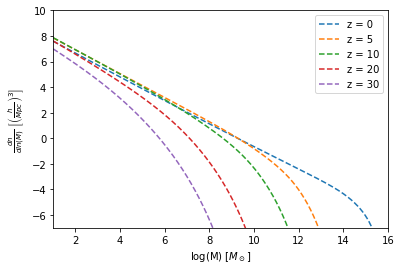

In [2]:
# Setting Up Cosmolgy in the Colossus Module
cosmology.setCosmology('planck18')
low = 1
high = 16
massRange = np.logspace(low,high,1000,base=10)

# Calculating the Halo Mass Function
redshifts = [0,5,10,20,30]
models = ['reed07']
# redshifts = [7]
for model in models:
    for z in redshifts:
        HMD = mass_function.massFunction(massRange, z, q_out = 'dndlnM', model = model)
        x = np.log10(massRange)
        # y = HMD
        y = np.log10(HMD)


        plt.plot(x,y, label = "z = {}".format(z), linestyle= '--')

    plt.legend()
    plt.xlim(low,high)
    plt.ylim(-7,10)
    plt.xlabel(r'log(M) [$M_\odot$]')
    plt.ylabel(r'$\frac{dn}{dln(M)}$ $\left[\left(\frac{h}{Mpc}\right)^3\right]$')

    plt.show()


### Gathering the Eagle Data
As the above distribution is the correct halo distribution I will be moving onto collecting the relevant data from the EAGLE simulation to plot against this function. This will be done using the simulation described at the top of this notebook. By selecting every halo from each redshift that will be tested and binning them appropriately 

In [3]:
# EAGLE query for the relevant Data
def queryDefine(sim, snap):
    dataBaseQuery = "SELECT \
            SH.MassType_DM as HaloMass, \
            SH.Redshift as Z, \
            SH.Snapnum as SnapShot, \
            SH.SubGroupNumber \
        FROM \
            {}_SubHalo as SH \
        WHERE \
            SH.Snapnum = {}".format(sim,snap)
    return dataBaseQuery

# Variables specifying the Query
randomNumber = 1
simulation = 'DMONLY..L0100N1504'
storageLocation = 'C:/Users/samue/Documents/University Work/Year 4/Quasars/DataStorage/haloDistributionFunction/'


# Undertaking the Query for the relevant snapshots and saving it in the eagle class 
snapShots = [28, 19, 8, 5, 2, 0]
redshifts = [0, 1, 5, 7, 10, 20]

eagle = EAT.eagleData(randomNumber, simulation, storageLocation)

for Z, SN in zip(redshifts, snapShots):
    title = "DarkMatterZ{}".format(Z)
    eagle.DatabaseQuery(title, queryDefine(simulation, SN))

10/03/2021 17:36:35 | Querying Database ... 
10/03/2021 17:37:59   |  Query Time: 83.88s
Sorting Data into Astropy Table ...
10/03/2021 17:37:59   |  Sort Time: 0.1s
10/03/2021 17:37:59 | Querying Database ... 
10/03/2021 17:39:38   |  Query Time: 98.58s
Sorting Data into Astropy Table ...
10/03/2021 17:39:38   |  Sort Time: 0.1s
10/03/2021 17:39:38 | Querying Database ... 
10/03/2021 17:40:54   |  Query Time: 76.64s
Sorting Data into Astropy Table ...
10/03/2021 17:40:55   |  Sort Time: 0.09s
10/03/2021 17:40:55 | Querying Database ... 
10/03/2021 17:41:43   |  Query Time: 48.12s
Sorting Data into Astropy Table ...
10/03/2021 17:41:43   |  Sort Time: 0.05s
10/03/2021 17:41:43 | Querying Database ... 
10/03/2021 17:41:58   |  Query Time: 15.54s
Sorting Data into Astropy Table ...
10/03/2021 17:41:58   |  Sort Time: 0.02s
10/03/2021 17:41:58 | Querying Database ... 
10/03/2021 17:41:59   |  Query Time: 0.66s
Sorting Data into Astropy Table ...
10/03/2021 17:41:59   |  Sort Time: 0.0s


### Data Reducing and Comparison

From this point onwards the query has been made and also save to pickle files for the given redshifts. So further data reduction will be vastly sped up by importing the pickle files at the data storage location. The first part of the data reduction will be to bin the data to create a $\frac{dn}{dlnM}$ vs $log(M)$ plot.

Reduced Chi Squared Fit | z = 0 | 253.16994210924616
Reduced Chi Squared Fit | z = 1 | 243.83401967995266
Reduced Chi Squared Fit | z = 5 | 227.799261828302
Reduced Chi Squared Fit | z = 7 | 228.51043522549145
Reduced Chi Squared Fit | z = 10 | 232.48493708464542


<ipython-input-4-adef0c552a38>:49: RuntimeWarning: divide by zero encountered in log10
  y = np.log10(HMD * (h**3))


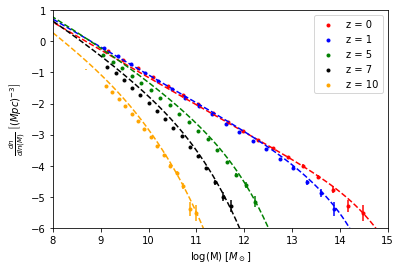

In [4]:
# Setting up Limits and Restrictions
dataSetRedshift = 7
size = 100**3
redshifts = [0, 1, 5, 7, 10]
h = 0.6777
model = 'reed07'
percentiles = [60,40]
dataRange = np.log10( np.array([ min( eagle.dataStorage[title]['HaloMass'] ) , max( eagle.dataStorage[title]['HaloMass'] ) ]))
colours = ['red','blue','green','black','orange']

#Looping over all of the queried datasets
for z, col in zip(redshifts, colours):
    #Set the Dataset required
    title = "DarkMatterZ{}".format(z) 
    #Establishing dataRanges for specific dataSet
    dataRange = np.log10( np.array([ min( eagle.dataStorage[title]['HaloMass'] ) , max( eagle.dataStorage[title]['HaloMass'] ) ]))
    n, bins = np.histogram(np.log10( eagle.dataStorage[title]['HaloMass']), bins = 20, range = (dataRange[0], dataRange[1]))

    # Plotting Data
    x = np.array( [ ((bins[i] + bins[i+1])/2) for i in range(len(bins) - 1)  ] ) 
    y = np.log10( n  / size )

    # Calculating Errors
    error = np.sqrt(n) / size
    error = error / (np.log(10) * (n  / size))


    plt.errorbar(x, y, yerr = error, marker='x', fmt = 'none', color = col) 
    plt.scatter(x[x>9], y[x>9], color = col, marker = '.', label = 'z = {}'.format(z))


    # Creating a ChiSquared Test for the data fitting to colossus model
    TestCondition = x > 9
    xTest = x[TestCondition]
    yTest =  np.log10( mass_function.massFunction(xTest, z, q_out = 'dndlnM', model = model) * (h**3))
    # print(y, yTest)
    Chi = chisquare(f_obs=y[x>9], f_exp=yTest)
    print("Reduced Chi Squared Fit | z = {} | {}".format(z,Chi[0]))



plt.legend()

#Add the Halo Mass Function from the Colossus package
for z, col in zip(redshifts,colours):
    HMD = mass_function.massFunction(massRange, z, q_out = 'dndlnM', model = model)
    x = np.log10(massRange)
    # y = HMD
    y = np.log10(HMD * (h**3))


    plt.plot(x,y, label = "z = {}".format(z), linestyle= '--', color = col)
    

plt.ylim(-6,1)
plt.xlim(8,15)
plt.xlabel(r'log(M) [$M_\odot$]')
plt.ylabel(r'$\frac{dn}{dln(M)}$ $\left[\left(Mpc\right)^{-3}\right]$')

plt.show()



# Critical Virial Velocity


The goal of this section is to take the data showing the divergence of SFR at higher virial velocities (which in itself is a measure of the dark matter halo mass), and apply a fit to it. Previosuly the data was binned and a median trend was ploted with the scatter represented by the percentile fill. Instead of doing this an exponential model will be used, as a first guess, of the form:

$\frac{ \dot{M}_{AGN} }{ \dot{M}_{NoAGN} } = A e^{ \frac{-V_{max}}{V_0}}  + C   $


This fitting wil be done using the LMfit module and will achieve a Chi squared result for the fit. The main issue that may arise is that the data itself is not weighted so the data the lack of datapoints at higher vMax will be weighted the same as lower vMax with larger samples


## Install Packages
Below are the used packages for the current section

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from eagleAnalysisTools import *
import pickle
from scipy.optimize import minimize
from scipy.optimize import curve_fit
import math

## Code

Firstly, will be importing the relevant linked data from storage and creating the relevant quantities

### Fitting a Single Redshift
In this section I am going to be fitting lines to a single redshift which will then be later extended to mulitple redshifts

In [7]:
# Defining the Data Storage Location and other important variables
dataLocation = "C:/Users/samue/Documents/University Work/Year 4/Quasars/DataStorage/LinkedGalaxiesStorage/" # Path to the Data
dataToImport = "snapShot19Galaxies" # Name of the file that will be imported "dataToImport".p
title = "SnapShot 19" # Title of the imported data in the storage class


# Establish the Analysis Tool
eagle = eagleData(1, "sim", dataLocation)
eagle.DatabaseQuery(title, dataToImport, defaultQuery= False, loadFromPickle= True, convertToAstropyOnLoad= False)

#### Data Reduction and Plotting
The data reduction will imvolve the calculating of the appropriate variables and plotting the graph 

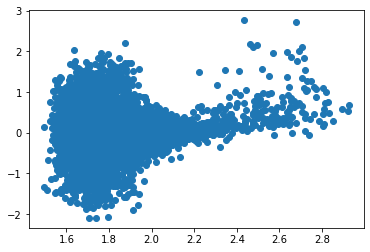

C:\Users\samue\Dropbox\Samuel Hayes - L4 Project - A Model for the Evolution of Quasars\Jupyter Notebook FIles\Epiphany\eagleAnalysisTools.py:404: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  binDataStorage['rawBinnedData'] = np.array(binnedDataTemp)


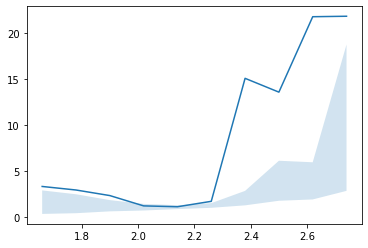

In [6]:
# Establishing the values used for plotting the graph
condition = (eagle.dataStorage[title]['SFR-1'] > 0) & (eagle.dataStorage[title]['SFR-2'] > 0)
eagle.dataStorage[title]['SFRratio'] = np.array(eagle.dataStorage[title]['SFR-2'][condition]) / np.array( eagle.dataStorage[title]['SFR-1'][condition] )
eagle.dataStorage[title]['Vmax'] = np.array( eagle.dataStorage[title]['Vmax-2'][condition] )


# Calculating X and Y values
x = np.log10( eagle.dataStorage[title]['Vmax'] )
y = np.log10( eagle.dataStorage[title]['SFRratio'] )

plt.scatter(x,y)
plt.show()

eagle.binning( title, 10, 'Vmax', 'SFRratio', [1.6,2.8], loggedBins= True )
eagle.binningStorage['SnapShot 19:Vmax vs SFRratio'].keys()

x2 = eagle.binningStorage['SnapShot 19:Vmax vs SFRratio']['binCenters']
y2 = eagle.binningStorage['SnapShot 19:Vmax vs SFRratio']['Median']
ymean = eagle.binningStorage['SnapShot 19:Vmax vs SFRratio']['Mean']
yUp = eagle.binningStorage['SnapShot 19:Vmax vs SFRratio']['Percentile75'] 
yDown = eagle.binningStorage['SnapShot 19:Vmax vs SFRratio']['Percentile25']


plt.plot(x2, ymean)
plt.fill_between(x2, yUp, yDown, alpha = 0.2)
plt.show()



#### Data Fitting

Now that we have the above for reference, below we will set up the requirements for LMfit to as well as conducting the LMfit


In [7]:
# Defining Fuctions Required for Data Fitting
def linearFit(x, b, c):
    return (b*x) + c

def exponentialFit(x, A, B, C):
    return A * np.exp( -1 * x / B) + C

def confidenceInterval(mean, CIpercent, se):
    up = mean + (CIpercent*se)
    down = mean - (CIpercent*se)
    return up,down

def residual(pars,x,data):
    # Change the model to whatever you want to fit to
    model = linearFit(x , pars['b'], pars['c'])
    # model = exponentialFit(x, pars['A'], pars['B'], pars['C'])
    return model - data

def fitemcee(parameters, numWalkers,numSteps, x,data):
    #Paramters is a dictionary with entries: names: [,,,], initialValues: []
    pFit = lm.Parameters()
    for param, initValue in zip(parameters['names'],parameters['initialValues']):
        pFit.add(name = param, value = initValue)
  
    mini = lm.Minimizer(residual, pFit,fcn_args=(x, data))
    out = mini.emcee(nwalkers = numWalkers, steps = numSteps)
    best_fit = data + out.residual
    
    parameters = []
    for p in out.params.values():
        parameters.append(p.value)
        
    Errors = None
    
    
    return best_fit, out, parameters, Errors

##### Median Fitting
Fitting the linear fit to the median of the data

In [8]:
# Conducting the Fit
maximum = 2.2
maskFlat = (eagle.binningStorage['SnapShot 19:Vmax vs SFRratio']['binCenters'] < maximum)
xFitFlat = eagle.binningStorage['SnapShot 19:Vmax vs SFRratio']['binCenters'][maskFlat]
yFitFlat = eagle.binningStorage['SnapShot 19:Vmax vs SFRratio']['Median'][maskFlat]
del maskFlat

inputParams ={}
inputParams['names']  = ['b', 'c']
inputParams['initialValues'] = [1.,1.]
bestFitFlat, outFlat,paramsFlat,pSigmaFlat  = fitemcee(inputParams,100,100,xFitFlat,yFitFlat)


minimum = 2.2
maskSlope = (eagle.binningStorage['SnapShot 19:Vmax vs SFRratio']['binCenters'] > minimum)
xFitSlope = eagle.binningStorage['SnapShot 19:Vmax vs SFRratio']['binCenters'][maskSlope]
yFitSlope = eagle.binningStorage['SnapShot 19:Vmax vs SFRratio']['Median'][maskSlope]
del maskSlope

inputParams ={}
inputParams['names']  = ['b', 'c']
inputParams['initialValues'] = [1.,1.]
bestFitSlope, outSlope,paramsSlope,pSigmaSlope  = fitemcee(inputParams,100,1000,xFitSlope,yFitSlope)


  2%|█▏                                                                             | 15/1000 [00:00<00:06, 142.84it/s]

The chain is shorter than 50 times the integrated autocorrelation time for 2 parameter(s). Use this estimate with caution and run a longer chain!
N/50 = 2;
tau: [8.56296102 8.79438374]


100%|█████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:07<00:00, 127.73it/s]


The chain is shorter than 50 times the integrated autocorrelation time for 2 parameter(s). Use this estimate with caution and run a longer chain!
N/50 = 20;
tau: [50.86919178 50.83669451]


2.253397370507254


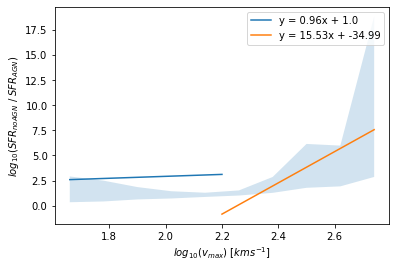

In [9]:
# Plotting the Fit
xsFlat = np.linspace(min(xFitFlat), maximum, 1000)
xsSlope = np.linspace(minimum, max(xFitSlope), 1000)

ysFlat = linearFit(xsFlat, paramsFlat[0], paramsFlat[1])
ysSlope = linearFit(xsSlope, paramsSlope[0], paramsSlope[1])


plt.plot(xsFlat, ysFlat, label = 'y = {}x + {}'.format(round(paramsFlat[0],2),round(paramsFlat[1],2)))
plt.plot(xsSlope, ysSlope, label = 'y = {}x + {}'.format(round(paramsSlope[0],2),round(paramsSlope[1],2)))


plt.fill_between(x2,yUp,yDown, alpha = 0.2)

plt.xlabel(r'$log_{10}(v_{max})$ [$kms^{-1}$]')
plt.ylabel(r'$log_{10}$($SFR_{noAGN}$ / $SFR_{AGN})$')
print((-1 * paramsSlope[1]) / (paramsSlope[0]))
plt.legend()
plt.show()

##### 75th Percentile Fitting
Fitting a linear trend to the 75th Percentile of the data

100%|███████████████████████████████████████████████████████████████████████████| 10000/10000 [01:07<00:00, 147.71it/s]


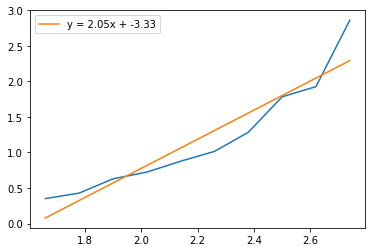

1.6214581445017031


In [10]:

#Fitting a line to the 75%
inputParams ={}
inputParams['names']  = ['b', 'c']
inputParams['initialValues'] = [1.,1.]
bestFitPerc, outPerc,paramsPerc,pSigmaPerc = fitemcee(inputParams,100,10000,x2,yDown)

#
xsPerc = np.linspace(min(x2),max(x2), 1000)

# Plotting the Fit against the 75th Percentile
plt.plot(x2,yDown)
plt.plot(xsPerc, linearFit(xsPerc, paramsPerc[0], paramsPerc[1]), label = 'y = {}x + {}'.format(round(paramsPerc[0],2),round(paramsPerc[1],2)) )
plt.legend()
plt.show()

print((-1 * paramsPerc[1]) / (paramsPerc[0]))

#### Results : Critial Virial Velocity

From fitting of the above graph it indicates a turning point of roughly $log_{10}(V_{crit}) = 2.21135 $ 

From the analysis below of when 75% of galaxies exceed an equal ratio $log_{10}(V_{crit}) = 2.19427 $ 

The results from the 75th percentile fitting is the more reliable value. The median fitting is dependant on the choice of cuttoff point between the sloped and flat section but the percentil fitting has no such dependancy.

### Fitting a Range of Redshifts
The next stage is to determine the redshift dependence on the critical virial velocity. This can be done by either considering each redhsfit separately or by considering ranges of redhsift. Firstly I'm going to calculate a spread of redhsfit across all that are available and see whether there is any disceranble difference bettween them. After this (depending on the results) I will construct two different regions of early and late universe in which the value of the critical density will be compared.

#### Importing Pre-Processed Data

In [11]:
# Defining the Data Storage Location and other important variables
dataLocation = "C:/Users/samue/Documents/University Work/Year 4/Quasars/DataStorage/LinkedGalaxiesStorage/" # Path to the Data
snapShots = [28, 19, 8, 5, 2]
redshifts = [0, 1, 5, 7, 10]

# Establish the Analysis Tool 
eagle = eagleData(1, "sim", dataLocation)

# Importing the Data
for SN, Z in zip(snapShots, redshifts):
 
    dataToImport = "snapShot{}Galaxies".format(SN) # Name of the file that will be imported "dataToImport".p
    title = "SnapShot {}".format(SN) # Title of the imported data in the storage class
    eagle.DatabaseQuery(title, dataToImport, defaultQuery= False, loadFromPickle= True, convertToAstropyOnLoad= False)


#### Data Reduction and Plotting

In [12]:
# Looping over each Redshift and Snapshot
i = 0
for SN, Z in zip(snapShots, redshifts):
    title = "SnapShot {}".format(SN)
    binningTitle = 'SnapShot {}:Vmax vs SFRratio'.format(SN)
    binningRanges = [[1.5,2.7],[1.5,2.9],[1.5,2.7],[1.5,2.4],[1.5,2.4]]
    
    
    condition = (eagle.dataStorage[title]['SFR-1'] > 0) & (eagle.dataStorage[title]['SFR-2'] > 0)
    eagle.dataStorage[title]['SFRratio'] = np.array(eagle.dataStorage[title]['SFR-2'][condition]) / np.array( eagle.dataStorage[title]['SFR-1'][condition] )
    eagle.dataStorage[title]['Vmax'] = np.array( eagle.dataStorage[title]['Vmax-2'][condition] )

    
    # Calculating X and Y values
    x = np.log10( eagle.dataStorage[title]['Vmax'] )
    y = np.log10( eagle.dataStorage[title]['SFRratio'] )
    
    print("SFR: Minimum {} : Maximum {}".format(min(x), max(x)))
    
#     plt.scatter(x,y)
#     plt.show()

    eagle.binning( title, 10, 'Vmax', 'SFRratio', binningRanges[i], loggedBins= True )
    eagle.binningStorage[binningTitle].keys()

    x2 = eagle.binningStorage[binningTitle]['binCenters']
    print("Binning Centers: {}".format(x2))
    y2 = eagle.binningStorage[binningTitle]['Median']
    ymean = eagle.binningStorage[binningTitle]['Mean']
    yUp = eagle.binningStorage[binningTitle]['Percentile75'] 
    yDown = eagle.binningStorage[binningTitle]['Percentile25']
    numdensity = eagle.binningStorage[binningTitle]['NumberDensity']
    y2Error = np.sqrt(numdensity)


#     plt.plot(x2, y2)
# #     plt.errorbar(x2, y2, yerr = y2Error, marker='x', fmt = 'none') 
#     plt.fill_between(x2, yUp, yDown, alpha = 0.2)
#     plt.title(binningTitle)
#     plt.show()
    
#     plt.plot(x2, numdensity)
#     plt.show()
    
    
    
    
    i += 1


SFR: Minimum 1.5105805397033691 : Maximum 2.797499179840088
Binning Centers: [1.56 1.68 1.8  1.92 2.04 2.16 2.28 2.4  2.52 2.64]
SFR: Minimum 1.4952583312988281 : Maximum 2.9247589111328125
Binning Centers: [1.57 1.71 1.85 1.99 2.13 2.27 2.41 2.55 2.69 2.83]
SFR: Minimum 1.465282678604126 : Maximum 2.7559969425201416
Binning Centers: [1.56 1.68 1.8  1.92 2.04 2.16 2.28 2.4  2.52 2.64]
SFR: Minimum 1.504035234451294 : Maximum 2.4786972999572754
Binning Centers: [1.545 1.635 1.725 1.815 1.905 1.995 2.085 2.175 2.265 2.355]
SFR: Minimum 1.5638542175292969 : Maximum 2.368088960647583
Binning Centers: [1.545 1.635 1.725 1.815 1.905 1.995 2.085 2.175 2.265 2.355]


C:\Users\samue\Dropbox\Samuel Hayes - L4 Project - A Model for the Evolution of Quasars\Jupyter Notebook FIles\Epiphany\eagleAnalysisTools.py:404: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  binDataStorage['rawBinnedData'] = np.array(binnedDataTemp)
c:\python38\lib\site-packages\numpy\core\_methods.py:233: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
c:\python38\lib\site-packages\numpy\core\_methods.py:226: RuntimeWarning: invalid value encountered in true_divide
  ret = ret.dtype.type(ret / rcount)


In [12]:
eagle.timeData[8:]

SnapNum,Z,LookBackTime,refZ,AgeOfUniverse
float64,float64,float64,float64,float64
8.0,5.03723649,12.65093052,5.04,1.1480694800000002
9.0,4.48521382,12.47098305,4.49,1.3280169500000003
10.0,3.98366355,12.26360451,3.98,1.535395489999999
11.0,3.52797657,12.02476958,3.5300000000000002,1.7742304200000003
12.0,3.01650464,11.67502063,3.02,2.123979369999999
13.0,2.47841334,11.16679464,2.48,2.6322053599999986
14.0,2.23703689,10.87075514,2.24,2.9282448599999995
15.0,2.01241024,10.54321672,2.01,3.2557832799999993
16.0,1.73696582,10.05263745,1.74,3.746362549999999


### Fitting a Range of Redshifts (Regions)
Because the data for the larger redshifts seems to suffer from low number density for the higher.

The regions that I am going to be considering are Z < 4 (SN < 10) and Z > 2 (SN > 15)

#### Importing Preprocessed Data

In [8]:
# Defining the Data Storage Location and other important variables
dataLocation = "C:/Users/samue/Documents/University Work/Year 4/Quasars/DataStorage/LinkedGalaxiesStorage/" # Path to the Data
snapShots = np.arange(29)
earlySNs = np.arange(0,8)
midSNs = np.arange(8,15)
lateSNs = np.arange(15,29)


# Establish the Analysis Tool 
eagle = eagleData(1, "sim", dataLocation)

# Importing the Data
for SN in snapShots:
 
    dataToImport = "snapShot{}Galaxies".format(SN) # Name of the file that will be imported "dataToImport".p
    title = "SnapShot {}".format(SN) # Title of the imported data in the storage class
    eagle.DatabaseQuery(title, dataToImport, defaultQuery= False, loadFromPickle= True, convertToAstropyOnLoad= False)

In [10]:
eagle.dataStorage['SnapShot 28'].keys()

dict_keys(['GalaxyID-1', 'Mass-1', 'Vmax-1', 'DMmass-1', 'SM-1', 'SFR-1', 'sgBHM-1', 'GalaxyID-2', 'Mass-2', 'Vmax-2', 'DMmass-2', 'SM-2', 'SFR-2', 'sgBHM-2', 'GalaxyID-unmatched', 'Mass-unmatched', 'Vmax-unmatched', 'DMmass-unmatched', 'SM-unmatched', 'SFR-unmatched', 'sgBHM-unmatched', 'PercentageMatched'])

#### Data Reduction and Plotting

In [15]:
# Looping over each Redshift and Snapshot
earlyVmax = []
earlyVTemp = []
earlySFRratio = []
lateVmax = []
lateVTemp = []
lateSFRratio = []
midVmax = []
midVTemp = []
midSFRratio = []
totalVmax = []
totalVTemp = []
totalSFRratio = []
earlyTitle = "Early Universe"
midTitle = "Mid Universe"
lateTitle = "Late Universe"
totalTitle = "Total Universe"
earlyTable = astropy.table.Table()
midTable = astropy.table.Table()
lateTable = astropy.table.Table()
totalTable = astropy.table.Table()
testLength = 0

print("EARLY")
for i in earlySNs:
    title = "SnapShot {}".format(i)
    print(title)
    condition = (eagle.dataStorage[title]['SFR-1'] > 0) & (eagle.dataStorage[title]['SFR-2'] > 0)
    eagle.dataStorage[title]['SFRratio'] = np.array(eagle.dataStorage[title]['SFR-2'][condition]) / np.array( eagle.dataStorage[title]['SFR-1'][condition] )
    eagle.dataStorage[title]['Vmax'] = np.array( eagle.dataStorage[title]['Vmax-2'][condition] )
    eagle.dataStorage[title]['VTemp'] = ( 3.6 *(1e5) ) * (eagle.dataStorage[title]['Vmax'] / 100)**2
    
  
    earlyVmax += eagle.dataStorage[title]['Vmax'].tolist()
    earlyVTemp += eagle.dataStorage[title]['VTemp'].tolist()
    earlySFRratio += eagle.dataStorage[title]['SFRratio'].tolist()
    testLength += len(eagle.dataStorage[title]['Vmax'].tolist())
    
print("MID")
for i in midSNs:
    title = "SnapShot {}".format(i)
    print(title)
    condition = (eagle.dataStorage[title]['SFR-1'] > 0) & (eagle.dataStorage[title]['SFR-2'] > 0)
    eagle.dataStorage[title]['SFRratio'] = np.array(eagle.dataStorage[title]['SFR-2'][condition]) / np.array( eagle.dataStorage[title]['SFR-1'][condition] )
    eagle.dataStorage[title]['Vmax'] = np.array( eagle.dataStorage[title]['Vmax-2'][condition] )
    eagle.dataStorage[title]['VTemp'] = ( 3.6 *(1e5) ) * (eagle.dataStorage[title]['Vmax'] / 100)**2

    
    midVTemp += eagle.dataStorage[title]['VTemp'].tolist()
    midVmax += eagle.dataStorage[title]['Vmax'].tolist()
    midSFRratio += eagle.dataStorage[title]['SFRratio'].tolist()

print("LATE")
for i in lateSNs:
    title = "SnapShot {}".format(i)
    print(title)
    condition = (eagle.dataStorage[title]['SFR-1'] > 0) & (eagle.dataStorage[title]['SFR-2'] > 0)
    eagle.dataStorage[title]['SFRratio'] = np.array(eagle.dataStorage[title]['SFR-2'][condition]) / np.array( eagle.dataStorage[title]['SFR-1'][condition] )
    eagle.dataStorage[title]['Vmax'] = np.array( eagle.dataStorage[title]['Vmax-2'][condition] )
    eagle.dataStorage[title]['VTemp'] = ( 3.6 *(1e5) ) * (eagle.dataStorage[title]['Vmax'] / 100)**2

    
    lateVTemp += eagle.dataStorage[title]['VTemp'].tolist()
    lateVmax += eagle.dataStorage[title]['Vmax'].tolist()
    lateSFRratio += eagle.dataStorage[title]['SFRratio'].tolist()

print("TOTAL")
for i in snapShots:
    title = "SnapShot {}".format(i)
    print(title)
    condition = (eagle.dataStorage[title]['SFR-1'] > 0) & (eagle.dataStorage[title]['SFR-2'] > 0)
    eagle.dataStorage[title]['SFRratio'] = np.array(eagle.dataStorage[title]['SFR-2'][condition]) / np.array( eagle.dataStorage[title]['SFR-1'][condition] )
    eagle.dataStorage[title]['Vmax'] = np.array( eagle.dataStorage[title]['Vmax-2'][condition] )
    eagle.dataStorage[title]['VTemp'] = ( 3.6 *(1e5) ) * (eagle.dataStorage[title]['Vmax'] / 100)**2

    
    totalVTemp += eagle.dataStorage[title]['VTemp'].tolist()
    totalVmax += eagle.dataStorage[title]['Vmax'].tolist()
    totalSFRratio += eagle.dataStorage[title]['SFRratio'].tolist()
    

earlySFRratio = 1 / np.array(earlySFRratio)
earlyVmax = np.array(earlyVmax)
earlyVTemp = np.array(earlyVTemp)

midSFRratio = 1 / np.array(midSFRratio)
midVmax = np.array(midVmax)
midVTemp = np.array(midVTemp)

lateSFRratio = 1 / np.array(lateSFRratio)
lateVmax = np.array(lateVmax)
lateVTemp = np.array(lateVTemp)

totalSFRratio = 1 / np.array(totalSFRratio)
totalVmax = np.array(totalVmax)
totalVTemp = np.array(totalVTemp)
# This mask is used so that we only include the requried data showng a quenching in star formation rate at high virial velocities
cutOff = 1.7
cutOffTemp = np.log10( ( 3.6 *(1e5) ) * ((10**1.7) / 100)**2 )
maskEarly = earlyVmax > 10**cutOff
maskMid = midVmax > 10**cutOff
maskLate = lateVmax > 10**cutOff
maskTotal = totalVmax > 10**cutOff


earlyTable["SFRratio"] = earlySFRratio[maskEarly]
earlyTable['Vmax'] = earlyVmax[maskEarly]
earlyTable['Vtemp'] = earlyVTemp[maskEarly]

midTable['SFRratio'] = midSFRratio[maskMid]
midTable['Vmax'] = midVmax[maskMid]
midTable['Vtemp'] = midVTemp[maskMid]

lateTable['SFRratio'] = lateSFRratio[maskLate]
lateTable['Vmax'] = lateVmax[maskLate]
lateTable['Vtemp'] = lateVTemp[maskLate]

totalTable['SFRratio'] = totalSFRratio[maskTotal]
totalTable['Vmax'] = totalVmax[maskTotal]
totalTable['Vtemp'] = totalVTemp[maskTotal]


eagle.dataStorage[earlyTitle] = earlyTable
eagle.dataStorage[midTitle] = midTable
eagle.dataStorage[lateTitle] = lateTable
eagle.dataStorage[totalTitle] = totalTable





EARLY
SnapShot 0
SnapShot 1
SnapShot 2
SnapShot 3
SnapShot 4
SnapShot 5
SnapShot 6
SnapShot 7
MID
SnapShot 8
SnapShot 9
SnapShot 10
SnapShot 11
SnapShot 12
SnapShot 13
SnapShot 14
LATE
SnapShot 15
SnapShot 16
SnapShot 17
SnapShot 18
SnapShot 19
SnapShot 20
SnapShot 21
SnapShot 22
SnapShot 23
SnapShot 24
SnapShot 25
SnapShot 26
SnapShot 27
SnapShot 28
TOTAL
SnapShot 0
SnapShot 1
SnapShot 2
SnapShot 3
SnapShot 4
SnapShot 5
SnapShot 6
SnapShot 7
SnapShot 8
SnapShot 9
SnapShot 10
SnapShot 11
SnapShot 12
SnapShot 13
SnapShot 14
SnapShot 15
SnapShot 16
SnapShot 17
SnapShot 18
SnapShot 19
SnapShot 20
SnapShot 21
SnapShot 22
SnapShot 23
SnapShot 24
SnapShot 25
SnapShot 26
SnapShot 27
SnapShot 28


Early Universe
Early Universe:Vtemp vs SFRratio
SFR: Minimum 4.956305214396731 : Maximum 6.925273096087677
Mid Universe
Mid Universe:Vtemp vs SFRratio
SFR: Minimum 4.956309379157153 : Maximum 7.389577883857706
Late Universe
Late Universe:Vtemp vs SFRratio
SFR: Minimum 4.956346935237698 : Maximum 7.445260616736135


C:\Users\samue\Dropbox\Samuel Hayes - L4 Project - A Model for the Evolution of Quasars\Jupyter Notebook FIles\Epiphany\eagleAnalysisTools.py:404: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  binDataStorage['rawBinnedData'] = np.array(binnedDataTemp)
C:\Users\samue\Dropbox\Samuel Hayes - L4 Project - A Model for the Evolution of Quasars\Jupyter Notebook FIles\Epiphany\eagleAnalysisTools.py:404: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  binDataStorage['rawBinnedData'] = np.array(binnedDataTemp)


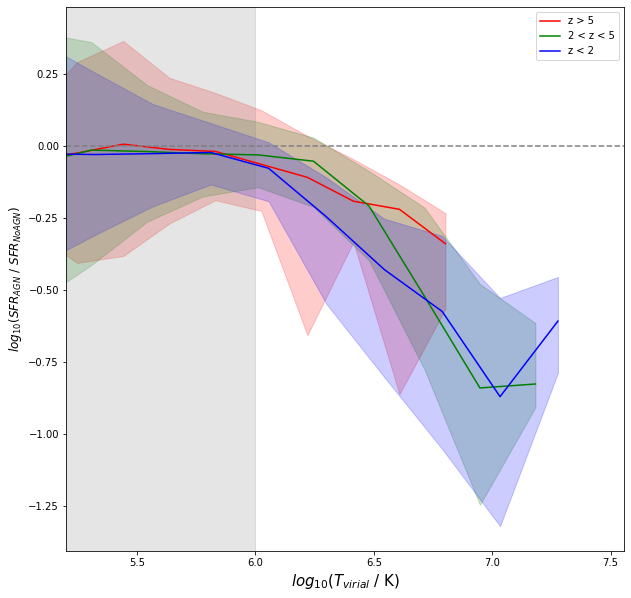

In [16]:
# Plotting the Data on Graph
regions = [earlyTitle, midTitle, lateTitle]
labels = ['z > 5', '2 < z < 5', 'z < 2']
fig, axes = plt.subplots(1,1, figsize=(10,10))
numberOfBins = 10
colours = ['red', 'green', 'blue']
binningRanges = [[cutOffTemp, 6.9],[cutOffTemp, 7.3],[cutOffTemp, 7.4]]

for i, title in enumerate(regions):
    print(title)
    # Creating Appropriate Title and Ranges
    binningTitle = '{}:Vtemp vs SFRratio'.format(title)
    
    # Calculating X and Y values
    print(binningTitle)
    x = np.log10( eagle.dataStorage[title]['Vtemp'] )
    y = np.log10( eagle.dataStorage[title]['SFRratio'] )
    print("SFR: Minimum {} : Maximum {}".format(min(x), max(x)))
    # Calculating the Binning for the Chosen Region
    eagle.binning( title, numberOfBins, 'Vtemp', 'SFRratio', binningRanges[i], loggedBins= True , loggedValues = True)
    
    # Assigning Values for the Plotting
    x2 = eagle.binningStorage[binningTitle]['binCenters']
    y2 = eagle.binningStorage[binningTitle]['Median']
    ymean = eagle.binningStorage[binningTitle]['Mean']
    yUp = eagle.binningStorage[binningTitle]['Percentile75'] 
    yDown = eagle.binningStorage[binningTitle]['Percentile25']
    numdensity = eagle.binningStorage[binningTitle]['NumberDensity']
    y2Error = np.sqrt(numdensity) / (np.log(10) * 10**y2)
        
    # Plotting the Values on the Created Figure
    axes.plot(x2, y2, label = labels[i], color = colours[i])
    axes.fill_between(x2, yUp, yDown, alpha = 0.2,  color = colours[i])

# Define Two Regions as a coloured Region
axes.axvspan(1.7,6, color = 'gray', alpha = 0.2)
axes.axhline(0, linestyle = '--', color = 'gray')

# Defining Limits
axes.set_xlim(left = 5.2)
    
# Set Labels and Legend
axes.legend()
axes.set_xlabel(r'$log_{10}(T_{virial}$ / K)', fontsize=15)
axes.set_ylabel(r'$log_{10}$($SFR_{AGN}$ / $SFR_{NoAGN})$', fontsize=12)
plt.show()


#### Data Fiting
Here we will fit a linear model to the 75th Percentile of the data

ChiSquared: 0.003 
 Reduced ChiSquare: 0.002 
 Fitted Parameters: -0.28, 1.65 
 Parameter Errors: 0.04, 0.23 
 Critical Value: 5.8 
 Critical Value Error: 0.2
---------------------------------
ChiSquared: 0.3 
 Reduced ChiSquare: 0.1 
 Fitted Parameters: -0.89, 5.45 
 Parameter Errors: 0.16, 1.04 
 Critical Value: 6.1 
 Critical Value Error: 1.0
---------------------------------
ChiSquared: 0.02 
 Reduced ChiSquare: 0.007 
 Fitted Parameters: -0.78, 4.7 
 Parameter Errors: 0.06, 0.38 
 Critical Value: 6.0 
 Critical Value Error: 0.4
---------------------------------


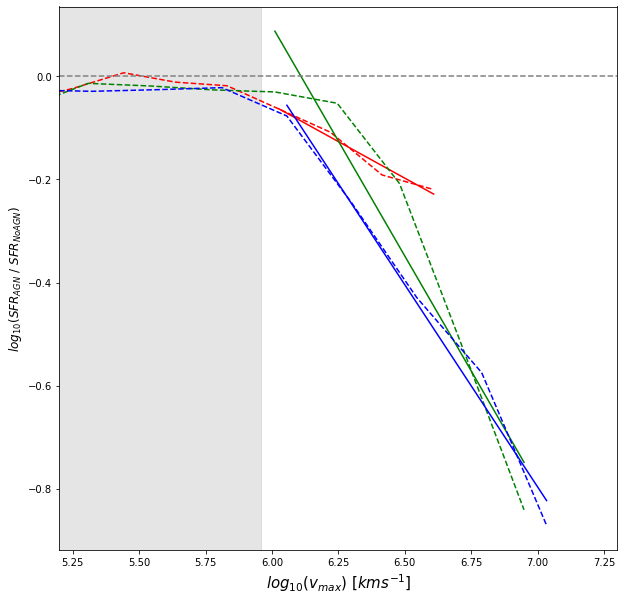

In [17]:
## Minimisation Function Requires 
# X and Y Observed Data
colours = ['red','green', 'blue']
fig, axes = plt.subplots(1,1, figsize=(10,10))
limits = [5.9, 5.9, 5.9]

for i, title in enumerate([earlyTitle, midTitle, lateTitle]):
    binningTitle = '{}:Vtemp vs SFRratio'.format(title)
    mask = eagle.binningStorage[binningTitle]['binCenters'] > limits[i]
    xObs = eagle.binningStorage[binningTitle]['binCenters'][mask][:-1]
    yObs = eagle.binningStorage[binningTitle]['Median'][mask][:-1]
    x = eagle.binningStorage[binningTitle]['binCenters'][:-1]
    y = eagle.binningStorage[binningTitle]['Median'][:-1]

    # Fitting Model
    def testModel(xObs,a,b):
        return a*(xObs) +  b
    # Chi Squared Fitting Function
    def ChiSq(xObs, yObs, params ):
        model = testModel(xObs, *params)
        return np.sum( ((yObs - model)**2) / abs(model) )
    # Residual Function
    def residuals(params):
        return testModel(params, xObs) - yObs
    #Initial Guess Values
    initGuess = [12,1,10]
    # Fitting the Model to the Data
    pOpt , pCov = curve_fit(testModel, xObs, yObs)

    params = pOpt
    errors = np.sqrt(np.diag(pCov))    
    DoF = len(xObs) - len(params)
    chiSq = round(ChiSq(xObs,yObs,params), 1 - int(math.floor(math.log10(abs(ChiSq(xObs,yObs,params))))) - 1)
    rChiSq = round(chiSq/DoF, 1 - int(math.floor(math.log10(abs(chiSq/DoF)))) - 1)
    # Critical Value 
    critValue = (-1) * params[1] / params[0]
    critError = np.sqrt(np.sum(errors**2))

    critError =  round(critError, 1 - int(math.floor(math.log10(abs(critError)))) - 1)
    critValue = round(critValue, 1)

    print('ChiSquared: {} \n Reduced ChiSquare: {} \n Fitted Parameters: {}, {} \n Parameter Errors: {}, {} \n Critical Value: {} \n Critical Value Error: {}'.format(chiSq, rChiSq, *np.round(params,2), *np.round(errors,2), critValue, critError ))
    print('---------------------------------')
    
    # Assigning Values for the Plotting
    x2 = eagle.binningStorage[binningTitle]['binCenters']
    y2 = eagle.binningStorage[binningTitle]['Median']
    ymean = eagle.binningStorage[binningTitle]['Mean']
    yUp = eagle.binningStorage[binningTitle]['Percentile75'] 
    yDown = eagle.binningStorage[binningTitle]['Percentile25']
    numdensity = eagle.binningStorage[binningTitle]['NumberDensity']
    y2Error = np.sqrt(numdensity) / (np.log(10) * 10**y2)
        
    # Plotting the Values on the Created Figure
#     axes.plot(x2, y2, label = labels[i], color = colours[i])
#     plt.fill_between(x2, yUp, yDown, alpha = 0.2,  color = colours[i])
    

    axes.plot(x,y, linestyle = '--', color = colours[i] )
    axes.plot(xObs, testModel(xObs, *pOpt), color = colours[i] )

# Define Two Regions as a coloured Region
axes.axvspan(1.7,5.96, color = 'gray', alpha = 0.2)
axes.axhline(0, linestyle = '--', color = 'gray')

# Defining Limits
axes.set_xlim(left = 5.2)

# Set Labels 
axes.set_xlabel(r'$log_{10}(v_{max})$ [$kms^{-1}$]', fontsize=15)
axes.set_ylabel(r'$log_{10}$($SFR_{AGN}$ / $SFR_{NoAGN})$', fontsize=12)
plt.show()
        

In [18]:
logv = 2.2 
logve = 0.1

def func1(x):
    return 10**x

v = func1(logv)
veplus = func1(logv+logve) - func1(logv)
veminus = func1(logv-logve) - func1(logv)

def func2(x):
    return np.log10( ( 3.6 *(1e5) ) * (x/100)**2 )
    
# logt = func2(v)
logteplus = func2(v+veplus) - func2(v)
logteminus = func2(v+veminus) - func2(v)



print(v , veplus, veminus)
print(logt, logteplus, logteminus)

158.48931924611142 41.03691225077665 -32.59677806669467


NameError: name 'logt' is not defined

### Results
After the analyis of the critical virial velocity and its dependance on redshift we find the following results:

Z < 2:  Fit = y = (0.93 $\pm$ 0.66) $log_{10}(v_{max})$ + (-2.17 $\pm$ 1.45)  : Critical value of $log_{10}(v_{max})$ = 2.34

Z > 4:  Fit = y = (0.82 $\pm$ 0.61) $log_{10}(v_{max})$ + (-1.81 $\pm$ 1.38)  : Critical value of $log_{10}(v_{max})$ = 2.21



## Plotting a Total Graph

Total Universe
Total Universe:Vtemp vs SFRratio
SFR: Minimum 4.956305214396731 : Maximum 7.445260616736135


C:\Users\samue\Dropbox\Samuel Hayes - L4 Project - A Model for the Evolution of Quasars\Jupyter Notebook FIles\Epiphany\eagleAnalysisTools.py:404: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  binDataStorage['rawBinnedData'] = np.array(binnedDataTemp)


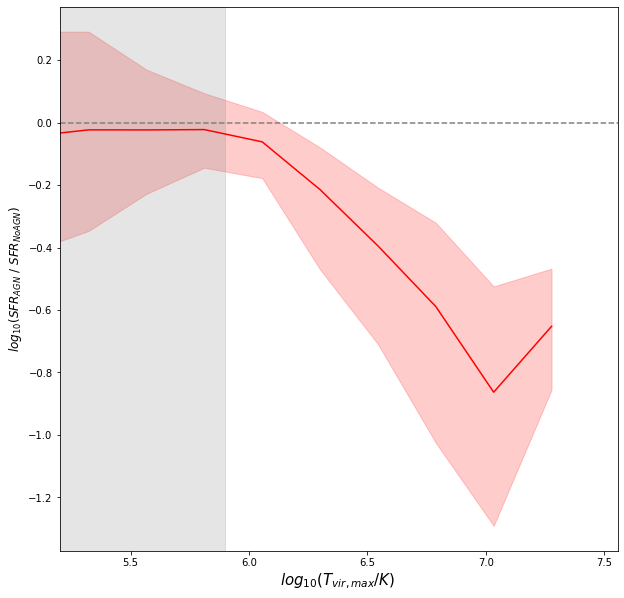

KeyError: 'Early Universe:Vmax vs SFRratio'

In [20]:
# Plotting the Data on Graph
regions = [totalTitle]
fig, axes = plt.subplots(1,1, figsize=(10,10))
numberOfBins = 10
colours = ['red']
binningRanges = [[cutOffTemp, 7.4]]

for i, title in enumerate(regions):
    print(title)
    # Creating Appropriate Title and Ranges
    binningTitle = '{}:Vtemp vs SFRratio'.format(title)
    
    # Calculating X and Y values
    print(binningTitle)
    x = np.log10( eagle.dataStorage[title]['Vtemp'] )
    y = np.log10( eagle.dataStorage[title]['SFRratio'] )
    print("SFR: Minimum {} : Maximum {}".format(min(x), max(x)))

    # Calculating the Binning for the Chosen Region
    eagle.binning( title, numberOfBins, 'Vtemp', 'SFRratio', binningRanges[i], loggedBins= True , loggedValues = True)
    
    # Assigning Values for the Plotting
    x2 = eagle.binningStorage[binningTitle]['binCenters']
    y2 = eagle.binningStorage[binningTitle]['Median']
    ymean = eagle.binningStorage[binningTitle]['Mean']
    yUp = eagle.binningStorage[binningTitle]['Percentile75'] 
    yDown = eagle.binningStorage[binningTitle]['Percentile25']
    numdensity = eagle.binningStorage[binningTitle]['NumberDensity']
    y2Error = np.sqrt(numdensity) / (np.log(10) * 10**y2)
        
    # Plotting the Values on the Created Figure
    axes.plot(x2, y2, label = labels[i], color = colours[i])
    axes.fill_between(x2, yUp, yDown, alpha = 0.2,  color = colours[i])

# Define Two Regions as a coloured Region
axes.axvspan(1.7,5.9, color = 'gray', alpha = 0.2)
axes.axhline(0, linestyle = '--', color = 'gray')


# Defining Limits
axes.set_xlim(left = 5.2)
    
# Set Labels and Legend
axes.set_xlabel(r'$log_{10}(T_{vir, max} / K )$ ', fontsize=15)
axes.set_ylabel(r'$log_{10}$($SFR_{AGN}$ / $SFR_{NoAGN})$', fontsize=12)
plt.show()




print(eagle.binningStorage['Early Universe:Vmax vs SFRratio']['binCenters'])
print(eagle.binningStorage['Early Universe:Vmax vs SFRratio']['Median'])

dict_keys(['rawBinnedData', 'canBeAveraged', 'binCenters', 'binEdges', 'Median', 'Mean', 'Standard Error', 'NumberDensity', 'Percentile25', 'Percentile40', 'Percentile60', 'Percentile75'])
ChiSquared: 0.04 
 Reduced ChiSquare: 0.01 
 Fitted Parameters: -0.81, 4.87 
 Parameter Errors: 0.05, 0.35 
 Critical Value: 6.0 
 Critical Value Error: 0.4
---------------------------------


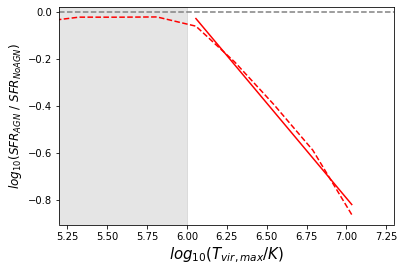

In [23]:
## Minimisation Function Requires 
# X and Y Observed Data
colours = ['red']

for i, title in enumerate([totalTitle]):
    binningTitle = '{}:Vtemp vs SFRratio'.format(title)
    print(eagle.binningStorage[binningTitle].keys())
    mask = eagle.binningStorage[binningTitle]['binCenters'] > 5.9
    xObs = eagle.binningStorage[binningTitle]['binCenters'][mask][:-1]
    yObs = eagle.binningStorage[binningTitle]['Median'][mask][:-1]
    x = eagle.binningStorage[binningTitle]['binCenters'][:-1]
    y = eagle.binningStorage[binningTitle]['Median'][:-1]

    # Fitting Model
    def testModel(xObs,a,b):
        return a*(xObs) +  b
    # Chi Squared Fitting Function
    def ChiSq(xObs, yObs, params ):
        model = testModel(xObs, *params)
        return np.sum( ((yObs - model)**2) / abs(model) )
    # Residual Function
    def residuals(params):
        return testModel(params, xObs) - yObs
    #Initial Guess Values
    initGuess = [12,1,10]
    # Fitting the Model to the Data
    pOpt , pCov = curve_fit(testModel, xObs, yObs)

    params = pOpt
    errors = np.sqrt(np.diag(pCov))    
    DoF = len(xObs) - len(params)
    chiSq = round(ChiSq(xObs,yObs,params), 1 - int(math.floor(math.log10(abs(ChiSq(xObs,yObs,params))))) - 1)
    rChiSq = round(chiSq/DoF, 1 - int(math.floor(math.log10(abs(chiSq/DoF)))) - 1)
    # Critical Value 
    critValue = (-1) * params[1] / params[0]
    critError = np.sqrt(np.sum(errors**2))

    critError =  round(critError, 1 - int(math.floor(math.log10(abs(critError)))) - 1)
    critValue = round(critValue, 1)

    print('ChiSquared: {} \n Reduced ChiSquare: {} \n Fitted Parameters: {}, {} \n Parameter Errors: {}, {} \n Critical Value: {} \n Critical Value Error: {}'.format(chiSq, rChiSq, *np.round(params,2), *np.round(errors,2), critValue, critError ))
    print('---------------------------------')
    plt.plot(x,y, linestyle = '--', color = colours[i] )
    plt.plot(xObs, testModel(xObs, *pOpt), color = colours[i] )
    
# Define Two Regions as a coloured Region
plt.axvspan(1.7,6, color = 'gray', alpha = 0.2)
plt.axhline(0, linestyle = '--', color = 'gray')

# Defining Limits
plt.xlim(left =5.2)

# Set Labels 
plt.xlabel(r'$log_{10}(T_{vir, max} / K )$ ', fontsize=15)
plt.ylabel(r'$log_{10}$($SFR_{AGN}$ / $SFR_{NoAGN})$', fontsize=12)
      
        
plt.show()


# Quasar Formation Rate

The goal of this Notebook is to determine the rate at which galaxies enter the quasar phase. This will be done by determining the number of galaxies at each redshift (SnapShot) that had a virial velocity below a given threshold at the previous redshift and has exceeded this threshold at the following redshift (snapshot). The end goal for this is to be able to create a quasar distribution fucntion to determine the number of quasars at a given redshift. Therefore, the first step is to determine the rate of creation for quasars and once that is calaculated we need to determine the duty cycle of quasars to determine the rate of galaxies exiting the quasar phase.

## Grabbing Galaxies 

Firstly in this notebook, we will grab all the galaxies at a redshift which have a virial velocity in an intermediate zone between an average galaxy and the quasar phase galaxy. These galaxies need to have projenitor information so that we can track their descendants in the following snapshot and test whether they have exceeded the quasar phase threshold virial velocity. The threshold velocity was determined from the analysis of the the simulation containing AGN simulations compared to the simulation without AGN and is the turning point for when AGN feedback starts to quench the star formation rate.

### Virial Velocity threshold
$log_{10} (V_{threshold}) = 2.3$ 

### Intermediate Virial Velocity
$log_{10} (V_{inermediate}) = 2.1$



## Installed Modules

In [11]:
import numpy as np
import matplotlib.pyplot as plt
import eagleAnalysisTools as EAT
import matplotlib.ticker as tick
import matplotlib.transforms as Transform
import lmfit as lm

simulation = "RefL0100N1504"
randomNumber = 1
size = 100
StorageLocation = 'C:/Users/samue/Documents/University Work/Year 4/Quasars/DataStorage/quasarPhaseStarting/'

## Code

### Querying Galaxies

In [12]:
Vintermediate = 10**2.0
Vthreshold = 10**2.1

referenceGalaxyQuery = 'SELECT \
        SH.GalaxyID as ID, \
        SH.TopLeafID as TopLeafID, \
        SH.SnapNum as SnapShot, \
        SH.Redshift as Z, \
        SH.Vmax as Vmax, \
        SH.StarFormationRate as SFR \
    FROM \
        {}_SubHalo as SH \
    WHERE \
        SH.Vmax > {} AND \
        SH.Vmax < {}'.format(simulation, Vintermediate, Vthreshold)   # Querying Galaxies below the critical veloicty

quasarPhaseGalaxyQuery = 'SELECT \
    SH.GalaxyID as ID, \
    SH.TopLeafID as TopLeafID, \
    SH.SnapNum as SnapShot, \
    SH.Redshift as Z \
    FROM \
        {}_SubHalo as SH \
    WHERE \
        SH.Vmax > {}'.format(simulation, Vthreshold)  # Querying Galaxies above the critical veloicty


SMRange = [6.08e10 , 2]
DMRange = [1.37e12 , 2]
ApertureSize = 30

allGalaxiesQuery = "SELECT \
        SH.GalaxyID as GalaxyID, \
        SH.Redshift as Z, \
        SH.StarFormationRate as SFR, \
        SH.SnapNum as SnapShot \
    FROM \
        {}_SubHalo as SH \
    WHERE \
        SH.SubGroupNumber = 0 AND \
        SH.randomNumber < {}".format(simulation, randomNumber)

In [13]:
# Establishing the Analysis Tools
eagle = EAT.eagleData(simulation, randomNumber, StorageLocation)

# Querying Reference Galaxies
eagle.DatabaseQuery("Reference Galaxies", referenceGalaxyQuery)
# Querying Quasar Phase Galaxies
eagle.DatabaseQuery("Quasar Phase Galaxies", quasarPhaseGalaxyQuery)
# Querying Star Formation Rate
eagle.DatabaseQuery("StarFormationRate Galaxies",'StarFormationRate Galaxies', loadFromPickle = True)

04/03/2021 10:54:49 | Querying Database ... 
04/03/2021 10:54:52   |  Query Time: 2.65s
Sorting Data into Astropy Table ...
04/03/2021 10:54:52   |  Sort Time: 0.0s
04/03/2021 10:54:52 | Querying Database ... 
04/03/2021 10:54:54   |  Query Time: 2.33s
Sorting Data into Astropy Table ...
04/03/2021 10:54:54   |  Sort Time: 0.0s


In [70]:
eagle.saveData("Quasar Phase Galaxies")

### Testing the Galaxies

In order to tell whether a galaxy at one snapshot enters the quasar phase at a later snapshot. I will firstly grab a list of all topleaf IDs at a each redshift in turn and proceed to test whether the same topLeafID appears in the Quasar Phase Galaxies at the proceeding redshift (snapshot). This data will then be plotted as the density of galaxies per $cMpc^{-3}$ vs redshift in order to determine the evolution of Quasars activation over cosmic time.

In [14]:
quasarGalaxiesEntering = {}
test = []
for SN in range(28):
    # print("SnapShot {}".format(SN))
    # Grab Relevant TopLeafIDs
    referenceIDs = np.array(np.sort( eagle.dataStorage['Reference Galaxies']['TopLeafID'][eagle.dataStorage['Reference Galaxies']['SnapShot'] == SN] ))
    # Grab Test IDs
    testIDs = np.array(np.sort( eagle.dataStorage['Quasar Phase Galaxies']['TopLeafID'][eagle.dataStorage['Quasar Phase Galaxies']['SnapShot'] == (SN + 1)] ))

    # Testing if this galaxy exists in the Quasar Phase in the following redshift
    matchIDs = []
    testCount = 0
    for refID in referenceIDs:
            
            if refID in testIDs:
                matchIDs.append(refID)
                testCount += 1

    # print("Number of Galaxies SN = {}: Reference {}: TestID {}: Matched {}: Testing {}".format(SN, len(referenceIDs), len(testIDs), len(matchIDs), testCount))

    quasarGalaxiesEntering['SN = {}'.format(SN)] = matchIDs
    # test.append(testCount)
    # print(len(quasarGalaxiesEntering['SN = {}'.format(SN)]))

print(len(quasarGalaxiesEntering['SN = 15']))


578


In [15]:
# Calculating Number Density
numberDensity = np.array([ len(quasarGalaxiesEntering[key]) for key in quasarGalaxiesEntering.keys()])
redshifts = np.array( [  ((eagle.timeData['Z'][i] + eagle.timeData['Z'][i+1]) / 2) for i in range(len(eagle.timeData['Z']) - 1) ] )
LookBackTimes = np.array( [  ((eagle.timeData['LookBackTime'][i] + eagle.timeData['LookBackTime'][i+1]) / 2) for i in range(len(eagle.timeData['LookBackTime']) - 1) ] )
print(redshifts)
# Accounting for varying redshift 
timeDifferencesZ = np.array([eagle.timeData['Z'][i] - eagle.timeData['Z'][i+1] for i in range(len(eagle.timeData['Z']) - 1)])
timeDifferencest = np.array([eagle.timeData['LookBackTime'][i] - eagle.timeData['LookBackTime'][i+1] for i in range(len(eagle.timeData['LookBackTime']) - 1)])
formationRateZ = numberDensity / timeDifferencesZ
formationRatet = numberDensity / timeDifferencest
formationRateError = np.sqrt(numberDensity)

[17.56616599 12.56267226  9.49045424  8.53124541  7.56209106  6.51036423
  5.72928876  5.26232579  4.76122515  4.23443869  3.75582006  3.2722406
  2.74745899  2.35772512  2.12472357  1.87468803  1.61183657  1.37301941
  1.13172659  0.93458612  0.80034007  0.67540968  0.55914854  0.43438793
  0.31828482  0.22680549  0.14167421  0.05031927]


<ipython-input-42-5db015803742>:4: RuntimeWarning: divide by zero encountered in log10
  yQ = np.log10(formationRateZ / (size**3))[2:]
<ipython-input-42-5db015803742>:6: RuntimeWarning: divide by zero encountered in log10
  yQ2 = np.log10(formationRatet / (size**3))[2:]


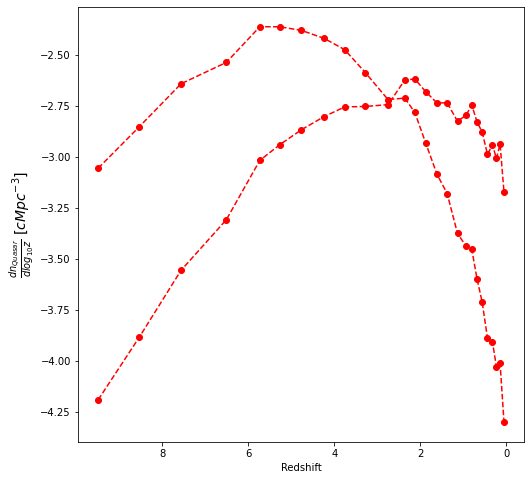

In [42]:
fig, ax = plt.subplots(1, figsize = (8,8))
lenNum = 0
xQ = redshifts[2:]
yQ = np.log10(formationRateZ / (size**3))[2:]

yQ2 = np.log10(formationRatet / (size**3))[2:]


ax.plot(xQ,yQ, color= 'red', linestyle='--', marker = 'o')
ax.plot(xQ,yQ2, color= 'red', linestyle='--', marker = 'o')



# ax.set_xscale('log')
# ax.set_xticks(ticks = [1,5,10,20])

ax.get_xaxis().set_major_formatter(tick.ScalarFormatter())
ax.set_xlabel('Redshift')
ax.set_ylabel(r'$\frac{dn_{Quasar}}{dlog_{10}z}$ [$cMpc^{-3}$]', fontsize = 14)


ax.invert_xaxis()
plt.show()


### Including Star Formation Rate (Mandau-Lily Plot)

The above graph shows the Quasar Formation Rate as a function of redshift. In order to show the affect that the AGN feedback has on the star formation rate. I ma going to overlay a plot of the starformtation rate as a function of redshift.

C:\Users\samue\Dropbox\Samuel Hayes - L4 Project - A Model for the Evolution of Quasars\Jupyter Notebook FIles\Epiphany\eagleAnalysisTools.py:454: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  binDataStorage['rawBinnedData'] = np.array(binnedDataTemp)


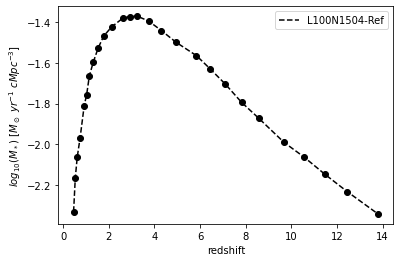

SnapNum     Z      LookBackTime        refZ          AgeOfUniverse   
------- ---------- ------------ ------------------ ------------------
    8.0 5.03723649  12.65093052               5.04 1.1480694800000002
    9.0 4.48521382  12.47098305               4.49 1.3280169500000003
   10.0 3.98366355  12.26360451               3.98  1.535395489999999
   11.0 3.52797657  12.02476958 3.5300000000000002 1.7742304200000003
   12.0 3.01650464  11.67502063               3.02  2.123979369999999
   13.0 2.47841334  11.16679464               2.48 2.6322053599999986
   14.0 2.23703689  10.87075514               2.24 2.9282448599999995
   15.0 2.01241024  10.54321672               2.01 3.2557832799999993
   16.0 1.73696582  10.05263745               1.74  3.746362549999999
   17.0 1.48670732   9.49425448               1.49  4.304745519999999
   18.0  1.2593315   8.86133793               1.26         4.93766207
   19.0 1.00412169   7.95592064                1.0  5.843079359999999
   20.0 0.86505054  

In [33]:
# Calculating the Median star formation rate at each snapShot
title = "StarFormationRate Galaxies"
binningTitle = 'StarFormationRate Galaxies:SnapShot vs SFR'
correction = 1

eagle.binningSnapShot(title, 'SFR',2,28)


# mask = eagle.binningStorage[binningTitle]['binCenters'] < 8   # A mask to remove zero values of SFR at some redshifts
xSFR = eagle.binningStorage[binningTitle]['binCenters']
xSFR = eagle.timeData['AgeOfUniverse'][2:]

ySFR = np.log10( np.array( [np.sum(eagle.binningStorage[binningTitle]['rawBinnedData'][i]) for i in range(len(eagle.binningStorage[binningTitle]['rawBinnedData']))]) / size**3)
# yErrorSFR = np.sqrt( eagle.binningStorage[binningTitle]['NumberDensity'][mask] ) / (size**3) 
xML = np.linspace(0,8,1000)
yML = np.log10( 0.015 * ( ((1 + xML)**2.7) / (1+ ((1+xML)/2.9 )**5.6))  )
fig, ax = plt.subplots(1)

ax.scatter(xSFR,ySFR, color= 'black', marker = 'o')
ax.plot(xSFR, ySFR, color = 'black', linestyle = '--', label = 'L100N1504-Ref')


# ax.plot(xML,yML,color = 'red', label = 'Madau et al, 2014')
# ax.errorbar(xSFR,ySFR,yerr=yErrorSFR, linestyle = '', color = 'black')

# ax.set_xscale('log')
# ax.set_yscale('log')
# ax.set_xticks(ticks = [1,2,3,4,5,6,7,8])
ax.get_xaxis().set_major_formatter(tick.ScalarFormatter())
# ax.set_xlim(0 ,8)
# ax.set_ylim(-2.4,-0.4)
# plt.gca().invert_xaxis()







ax.set_xlabel('redshift')
ax.set_ylabel(r'$log_{10}(M_*)$ [$M_\odot$ $yr^{-1}$ $cMpc^{-3}$]')
ax.legend()
plt.show()

print(eagle.timeData[8:])

<ipython-input-220-968d4929316f>:7: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  ax.plot(xQ,yQ,color = 'blue', lineStyle = '--')


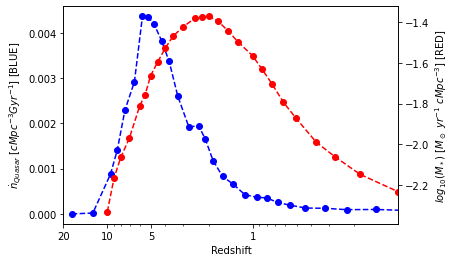

In [220]:
# Now to combine both of the above

#Plotting Quasar Formation Rate
fig, ax = plt.subplots(1)

ax.scatter(xQ,yQ, color= 'blue', marker = 'o')
ax.plot(xQ,yQ,color = 'blue', lineStyle = '--')
# ax.errorbar(xQ,yQ,yerr=yErrorQ, linestyle = '', color = 'blue')
# ax.set_xscale('log')
# ax.set_yscale('log')
ax.set_xticks(ticks = [1,5,10,20])

ax.get_xaxis().set_major_formatter(tick.ScalarFormatter())
ax.set_xlabel('Redshift')
# ax.set_ylabel(r'$n_{Quasar} / n_{Halo}$')
# ax.set_ylabel(r'$n_{Quasar}$ [$cMpc^{-3}$] [BLUE]')
ax.set_ylabel(r'$\dot{n}_{Quasar}$ [$cMpc^{-3} Gyr^{-1}$] [BLUE]')

ax.invert_xaxis()

# Plotting the Star Formation Rate 

ax2 = ax.twinx()
ax2.scatter(xSFR,ySFR, color= 'red', marker = 'o')
ax2.plot(xSFR, ySFR, color= 'red', linestyle = '--')
# ax.errorbar(xSFR,ySFR,yerr=yErrorSFR, linestyle = '', color = 'black')
ax2.set_xscale('log')
# ax.set_yscale('log')
ax2.set_xticks(ticks = [1,5,10,20])

ax2.get_xaxis().set_major_formatter(tick.ScalarFormatter())
ax2.set_xlabel('Redshift')
# ax.set_ylabel(r'$n_{Quasar} / n_{Halo}$')
ax2.set_ylabel(r'$log_{10}(M_*)$ [$M_\odot$ $yr^{-1}$ $cMpc^{-3}$] [RED]')
# ax2.invert_xaxis()
ax2.set_xlim(20 , 0.1)


plt.show()


# print(y)

In [188]:
eagle.timeData

SnapNum,Z,LookBackTime,refZ,AgeOfUniverse
float64,float64,float64,float64,float64
0.0,20.00002119,13.63873564,20.0,0.16026435999999933
1.0,15.1323108,13.55123493,15.13,0.2477650699999998
2.0,9.99303373,13.34299545,9.99,0.4560045499999994
3.0,8.98787474,13.26939663,8.99,0.5296033700000002
4.0,8.07461608,13.18443969,8.07,0.6145603099999999
5.0,7.04956604,13.05959447,7.05,0.7394055299999991
6.0,5.97116243,12.87707213,5.97,0.9219278699999993
7.0,5.4874151,12.77004409,5.49,1.0289559099999988
8.0,5.03723649,12.65093052,5.04,1.1480694800000002


# Star Forming Sequence

This section is importing the notebook I made one the colour dsitribution in the EAGLE simulation so that I can compare the distribution between simulations

## Importing Modules


In [1]:
import eagleSqlTools as sql
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
import csv
from astroquery.sdss import SDSS
from pylab import *
import scipy.optimize as opt
import scipy.misc as scipyMisc
import lmfit as lm
import eagleAnalysisTools as EAT


## Querying Data

In [30]:
simulationAGN = "RefL0050N0752"
simulationNoAGN = "NoAGNL0050N0752"
simulationStandard = "RefL0100N1504"
StorageLocation = 'C:/Users/samue/Documents/University Work/Year 4/Quasars/DataStorage/quasarPhaseStarting/'
def query(sim):
    eagleQuery = "SELECT \
            Mag.g_nodust AS g, \
            Mag.r_nodust AS r, \
            Mag.i_nodust AS i, \
            Sub.MassType_Star as SM, \
            Sub.MassType_BH as BHM, \
            Sub.redshift as Z, \
            Sub.StarFormationRate as SFR\
        FROM \
            {}_Subhalo AS Sub, \
            {}_Magnitudes AS Mag \
        WHERE \
            Sub.MassType_Star > 10e9 AND \
            Sub.GalaxyID = Mag.GalaxyID AND \
            Sub.SnapNum = 27".format(sim,sim)
    return eagleQuery

def midPoints(x):
    xm = [(x[i+1] + x[i])/2 for i in range(len(x) - 1)]
    return xm


In [4]:
eagle = EAT.eagleData(simulationStandard, 1, StorageLocation)
eagle.DatabaseQuery("AGN", query(simulationAGN))

# eagle.DatabaseQuery("NoAGN", query(simulationNoAGN))

eagle.DatabaseQuery("Large", query(simulationStandard))

06/03/2021 17:01:13 | Querying Database ... 
06/03/2021 17:01:14   |  Query Time: 0.61s
Sorting Data into Astropy Table ...
06/03/2021 17:01:14   |  Sort Time: 0.0s
06/03/2021 17:01:14 | Querying Database ... 
06/03/2021 17:01:14   |  Query Time: 0.7s
Sorting Data into Astropy Table ...
06/03/2021 17:01:14   |  Sort Time: 0.0s


## Data Reduction

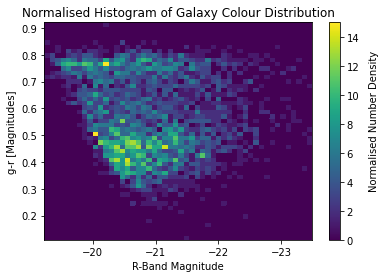

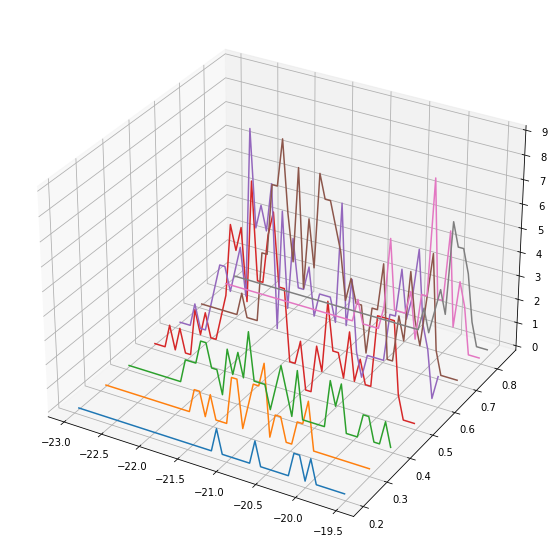

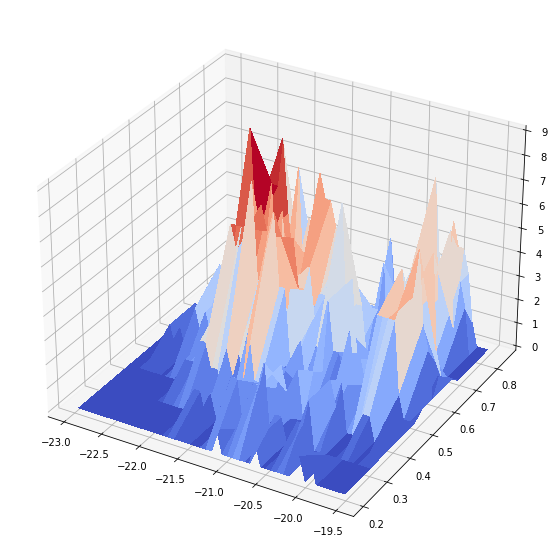

In [54]:
nbins = 50
title = 'Large'
eagle.dataStorage[title]['GR'] = eagle.dataStorage[title]['g']  -eagle.dataStorage[title]['r']

x = eagle.dataStorage[title]['r']
y = eagle.dataStorage[title]['GR']
H, xEdges, yEdges = np.histogram2d(x,y, range =[[-23, -19.5],[0.2, 0.85]], bins = 50, normed = False, )

plt.hist2d(x, y, bins = nbins, density = False)
plt.xlabel('R-Band Magnitude')
plt.ylabel('g-r [Magnitudes]')
plt.colorbar()
plt.title('Normalised Histogram of Galaxy Colour Distribution')
plt.gca().invert_xaxis()
plt.text(-24.4,0.3, "Normalised Number Density",rotation = 90)
plt.show()

# eagle.dataStorage

# plt.hist(eagle.dataStorage[title]['GR'],nbins)
# plt.show()
fig = plt.figure(figsize=(10,10))
ax = fig.gca(projection='3d')

n = [0, 8, 15, 23, 31, 38, 46, 49]
xEdges, yEdges = midPoints(xEdges), midPoints(yEdges)
xEdges,yEdges = np.meshgrid(xEdges, yEdges)
x,y,z =[],[],[]
for i in n:
#     print(x[i], y[i], H[i])
    ax.plot(xEdges[i], yEdges[i], H[i])
    x.append(xEdges[i].tolist())
    y.append(yEdges[i].tolist())
    z.append(H[i].tolist())
x,y,z = np.array(x), np.array(y), np.array(z)
    
    
plt.show()
fig = plt.figure(figsize=(10,10))
ax = fig.gca(projection='3d')
surf = ax.plot_surface(x, y, z, cmap=cm.coolwarm, linewidth=0, antialiased=False)

# Generating Mock GRI Images

In [61]:
import  eagleAnalysisTools as EAT
simulationAGN = "RefL0050N0752"
simulationNoAGN = "NoAGNL0050N0752"
dataLocation = "C:/Users/samue/Documents/University Work/Year 4/Quasars/DataStorage/LinkedGalaxiesStorage/" # Path to the Data
dataToImport = "snapShot28Galaxies" # Name of the file that will be imported "dataToImport".p

In [98]:
def query(sim,ID):
    eagleQuery = "SELECT \
            SH.GalaxyID, \
            SH.Image_Face as Face \
        FROM \
            {}_SubHalo as SH \
        WHERE \
            SH.GalaxyID = {}".format(sim,ID)
    return eagleQuery

In [69]:
eagle = EAT.eagleData(simulation, 1, dataLocation)

In [70]:
eagle.DatabaseQuery("Reference", dataToImport, defaultQuery= False, loadFromPickle= True, convertToAstropyOnLoad= False)


In [94]:
value = float(max(np.log10(eagle.dataStorage["Reference"]['Vmax-2'])))
mask = (eagle.dataStorage["Reference"]['Vmax-2'] > 10**2.7 )

print(eagle.dataStorage["Reference"]['Vmax-2'][mask])
print(eagle.dataStorage["Reference"]['GalaxyID-1'][mask],eagle.dataStorage["Reference"]['GalaxyID-2'][mask] )

[513.72217 627.33466]
[1949041 2026784] [2015905 2167259]


In [99]:
eagle.DatabaseQuery("Feedback", query(simulationAGN,2026784))

03/02/2021 17:39:55 | Querying Database ... 
03/02/2021 17:39:56   |  Query Time: 0.35s
Sorting Data into Astropy Table ...


TypeError: Empty table cannot have column set to scalar value

# Star Formation Rate Evolution (Galaxy Masses)

The goal of this section is to revisit how the star formation rate of galaixes evolve as a function of the halo mass and back hole mass. When undertaking the analysis before, I did not fully understand the process of binning or why we were calculating this property. The main reason for wanting to calculate this property is to find a variable which characterises the onset of exponential black hole growth. The first guess at this is the black hole grows exponentially once it exceeds a characteristic mass (either black hole mass or dark matter halo mass)

## Importing Modules

In [228]:
from colossus.lss import mass_function
from colossus.cosmology import cosmology
import numpy as np
import matplotlib.pyplot as plt
import eagleAnalysisTools as EAT
from scipy.stats import chisquare

## Querying Database

This query will need to return all galaxies (my first thought would be to get all star forming galaxies but in order to show that the star forming rate is quenched at some point we need to know the galaxies with zero star forming as well). For this initial query, though, only one redshift will be considered:

In [229]:
randomNumber = 1
simulation = "RefL0100N1504"
storageLocation = 'C:/Users/samue/Documents/University Work/Year 4/Quasars/DataStorage/starFormationRateDependence/'

queryBH = "SELECT \
        SH.StarFormationRate as SFR, \
        SH.MassType_DM as DMmass, \
        SH.MassType_Star as SM, \
        SH.BlackHoleMass as sgBHM, \
        SH.MassType_BH as pBHM \
    FROM \
        {}_SubHalo as SH \
    WHERE \
        SH.SnapNum = 28 AND \
        SH.SubGroupNumber = 0 AND \
        SH.MassType_BH > 0".format(simulation)

queryDM = "SELECT \
        SH.StarFormationRate as SFR, \
        SH.MassType_DM as DMmass, \
        SH.MassType_Star as SM, \
        SH.BlackHoleMass as sgBHM, \
        SH.MassType_BH as pBHM \
    FROM \
        {}_SubHalo as SH \
    WHERE \
        SH.SnapNum = 28 AND \
        SH.SubGroupNumber = 0 AND \
        SH.MassType_DM > 0".format(simulation)


### Establishing Class and Initiating Query

In [231]:
eagle = EAT.eagleData(simulation, randomNumber, storageLocation)
eagle.DatabaseQuery("DM", queryDM)
eagle.DatabaseQuery("BH", queryBH)

11/02/2021 09:07:48 | Querying Database ... 


KeyboardInterrupt: 

## Calculating Median

Firstly, we need to determine the range of valuesfor the binning

In [ ]:
maskDM = eagle.dataStorage['DM']['SM'] > 0
eagle.dataStorage['ReducedDM'] = {}
eagle.dataStorage['ReducedDM']['sSFR'] = eagle.dataStorage['DM']['SFR'][maskDM] / eagle.dataStorage['DM']['SM'][maskDM]
eagle.dataStorage['ReducedDM']['DMmass'] = eagle.dataStorage['DM']['DMmass'][maskDM]


maskBH = eagle.dataStorage['BH']['SM'] > 0
eagle.dataStorage['ReducedBH'] = {}
eagle.dataStorage['ReducedBH']['sSFR'] = eagle.dataStorage['BH']['SFR'][maskBH] / eagle.dataStorage['BH']['SM'][maskBH]
eagle.dataStorage['ReducedBH']['BHM'] = eagle.dataStorage['BH']['pBHM'][maskBH]

In [ ]:
variable = 'DMmass'
data = np.log10( eagle.dataStorage['ReducedDM'][variable] )
data2 = np.log10( eagle.dataStorage['DM'][variable] )
plt.hist(data,50)
print(min(data),max(data))
plt.show()

variable = 'BHM'
data = np.log10( eagle.dataStorage['ReducedBH'][variable] )
plt.hist(data,50)
print(min(data),max(data))

In [65]:
eagle.binning('ReducedDM', 20, 'DMmass', 'sSFR', [8.5, 14], loggedBins = True, loggedValues = True)
eagle.binning('ReducedBH', 10, 'BHM', 'sSFR', [6.5, 10], loggedBins = True, loggedValues = True)

C:\Users\samue\Dropbox\Samuel Hayes - L4 Project - A Model for the Evolution of Quasars\Jupyter Notebook FIles\Epiphany\eagleAnalysisTools.py:378: RuntimeWarning: divide by zero encountered in log10
  valuesToBeBinned = np.array( np.log10( self.dataStorage[dataStorageTitle][variableToBeBinned] ) )
C:\Users\samue\Dropbox\Samuel Hayes - L4 Project - A Model for the Evolution of Quasars\Jupyter Notebook FIles\Epiphany\eagleAnalysisTools.py:405: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  binDataStorage['rawBinnedData'] = np.array(binnedDataTemp)
c:\python38\lib\site-packages\numpy\core\_methods.py:202: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)
c:\python38\lib\site-packages\numpy\lib\function_base.py:3968: RuntimeWarning: inval

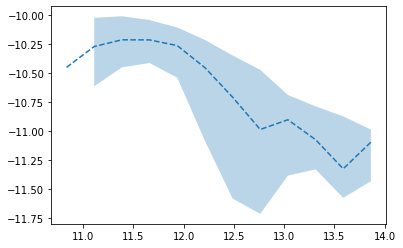

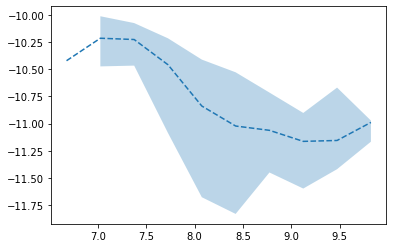

In [66]:
title = 'ReducedDM:DMmass vs sSFR'
x = eagle.binningStorage[title]['binCenters']
y = eagle.binningStorage[title]['Median']
yUp = eagle.binningStorage[title]['Percentile75']
yDown = eagle.binningStorage[title]['Percentile25']

plt.plot(x,y,linestyle = '--')
plt.fill_between(x,yDown,yUp, alpha = 0.3)
plt.show()

# eagle.binningStorage.keys()
title = 'ReducedBH:BHM vs sSFR'
x = eagle.binningStorage[title]['binCenters']
y = eagle.binningStorage[title]['Median']
yUp = eagle.binningStorage[title]['Percentile75']
yDown = eagle.binningStorage[title]['Percentile25']

plt.plot(x,y,linestyle = '--')
plt.fill_between(x,yDown,yUp, alpha = 0.3)
plt.show()


## Extending to multiple redshifts

This next section will involve the use extension if the above analysis into multiple redshifts 

### Querying Database

In [232]:
snapShots = [28, 19, 8, 5, 2]
redshifts = [0, 1, 5, 7, 10]
randomNumber = 1
simulation = "RefL0100N1504"
storageLocation = 'C:/Users/samue/Documents/University Work/Year 4/Quasars/DataStorage/starFormationRateDependence/'

def generateQueryBH(sim,SN):
    queryBH = "SELECT \
            SH.StarFormationRate as SFR, \
            SH.MassType_DM as DMmass, \
            SH.MassType_Star as SM, \
            SH.BlackHoleMass as sgBHM, \
            SH.MassType_BH as pBHM, \
            SH.Vmax as Vmax \
        FROM \
            {}_SubHalo as SH \
        WHERE \
            SH.SnapNum = {} AND \
            SH.SubGroupNumber = 0 AND \
            SH.MassType_BH > 0".format(sim,SN)
    return queryBH

def generateQueryDM(sim,SN):
    queryDM = "SELECT \
            SH.StarFormationRate as SFR, \
            SH.MassType_DM as DMmass, \
            SH.MassType_Star as SM, \
            SH.BlackHoleMass as sgBHM, \
            SH.MassType_BH as pBHM, \
            SH.Vmax as Vmax \
        FROM \
            {}_SubHalo as SH \
        WHERE \
            SH.SnapNum = {} AND \
            SH.SubGroupNumber = 0 AND \
            SH.MassType_DM > 0".format(sim,SN)
    return queryDM

def generateQueryVmax(sim,SN):
    queryVmax = "SELECT \
            SH.StarFormationRate as SFR, \
            SH.MassType_DM as DMmass, \
            SH.MassType_Star as SM, \
            SH.BlackHoleMass as sgBHM, \
            SH.MassType_BH as pBHM, \
            SH.Vmax as Vmax \
        FROM \
            {}_SubHalo as SH \
        WHERE \
            SH.SnapNum = {} AND \
            SH.SubGroupNumber = 0".format(sim,SN)
    return queryVmax

In [233]:
eagle = EAT.eagleData(simulation, randomNumber, storageLocation)


for SN in snapShots:
    eagle.DatabaseQuery("DM: {}".format(SN), generateQueryDM(simulation,SN))
    eagle.DatabaseQuery("BH: {}".format(SN), generateQueryBH(simulation,SN))
    eagle.DatabaseQuery("Vmax: {}".format(SN), generateQueryVmax(simulation,SN))

11/02/2021 09:08:08 | Querying Database ... 
11/02/2021 09:09:04   |  Query Time: 56.16s
Sorting Data into Astropy Table ...
11/02/2021 09:09:04   |  Sort Time: 0.07s
11/02/2021 09:09:04 | Querying Database ... 
11/02/2021 09:09:08   |  Query Time: 3.19s
Sorting Data into Astropy Table ...
11/02/2021 09:09:08   |  Sort Time: 0.0s
11/02/2021 09:09:08 | Querying Database ... 
11/02/2021 09:10:07   |  Query Time: 59.17s
Sorting Data into Astropy Table ...
11/02/2021 09:10:07   |  Sort Time: 0.07s
11/02/2021 09:10:07 | Querying Database ... 
11/02/2021 09:11:27   |  Query Time: 80.68s
Sorting Data into Astropy Table ...
11/02/2021 09:11:28   |  Sort Time: 0.09s
11/02/2021 09:11:28 | Querying Database ... 
11/02/2021 09:11:33   |  Query Time: 4.94s
Sorting Data into Astropy Table ...
11/02/2021 09:11:33   |  Sort Time: 0.0s
11/02/2021 09:11:33 | Querying Database ... 
11/02/2021 09:12:47   |  Query Time: 74.65s
Sorting Data into Astropy Table ...
11/02/2021 09:12:47   |  Sort Time: 0.08s
11

In [234]:
for SN in snapShots:
    title = 'DM: {}'.format(SN)
    title2 = 'ReducedDM: {}'.format(SN)
    maskDM = eagle.dataStorage[title]['SM'] > 0
    eagle.dataStorage[title2] = {}
    eagle.dataStorage[title2]['sSFR'] = eagle.dataStorage[title]['SFR'][maskDM] / eagle.dataStorage[title]['SM'][maskDM]
    eagle.dataStorage[title2]['DMmass'] = eagle.dataStorage[title]['DMmass'][maskDM]
    eagle.dataStorage[title2]['Vmax'] = eagle.dataStorage[title]['Vmax'][maskDM]

    title = 'BH: {}'.format(SN)
    title2 = 'ReducedBH: {}'.format(SN)
    maskBH = eagle.dataStorage[title]['SM'] > 0
    eagle.dataStorage[title2] = {}
    eagle.dataStorage[title2]['sSFR'] = eagle.dataStorage[title]['SFR'][maskBH] / eagle.dataStorage[title]['SM'][maskBH]
    eagle.dataStorage[title2]['BHM'] = eagle.dataStorage[title]['sgBHM'][maskBH]
    eagle.dataStorage[title2]['Vmax'] = eagle.dataStorage[title]['Vmax'][maskBH]
    
    title = 'DM: {}'.format(SN)
    title2 = 'PerDM: {}'.format(SN)
    maskDM = eagle.dataStorage[title]['DM'] > 0
    eagle.dataStorage[title2] = {}
    eagle.dataStorage[title2]['sSFR'] = eagle.dataStorage[title]['SFR'][maskDM] / eagle.dataStorage[title]['DM'][maskDM]
    eagle.dataStorage[title2]['DMmass'] = eagle.dataStorage[title]['DMmass'][maskDM]
    eagle.dataStorage[title2]['Vmax'] = eagle.dataStorage[title]['Vmax'][maskDM]
    


KeyError: 'DM'

In [ ]:
# for SN in snapShots:
#     title = 'ReducedDM: {}'.format(SN)
    
#     variable = 'DMmass'
#     data = np.log10( eagle.dataStorage[title][variable] )
# #     data2 = np.log10( eagle.dataStorage['DM'][variable] )
#     plt.hist(data,50)
#     print(min(data),max(data))
#     plt.show()
    
# for SN in snapShots:
#     title = 'ReducedBH: {}'.format(SN)
    
#     variable = 'BHM'
#     data = np.log10( eagle.dataStorage[title][variable] )
# #     data2 = np.log10( eagle.dataStorage['DM'][variable] )
#     plt.hist(data,50)
#     print(min(data),max(data))
#     plt.show()

for SN in snapShots:
    title = 'ReducedDM: {}'.format(SN)
    
    variable = 'Vmax'
    data = np.log10( eagle.dataStorage[title][variable] )
#     data2 = np.log10( eagle.dataStorage['DM'][variable] )
    plt.hist(data,50)
    print(min(data),max(data))
    plt.show()


In [ ]:
binningRanges = [[[8.5,14.5],[5.2,9.5]],[[8.5,13.5],[5.2,9]],[[8.5,12],[5.2,8]],[[8.5,11.5],[5.2,7.5]],[[8.5,10.5],[5.2,6.5]]]

for SN, binningRanges in zip(snapShots,binningRanges):
    print("DM",SN)
    eagle.binning('ReducedDM: {}'.format(SN), 20, 'DMmass', 'sSFR', binningRanges[0], loggedBins = True, loggedValues = True)
    print("BH",SN)
    if SN != 2:
        eagle.binning('ReducedBH: {}'.format(SN), 10, 'BHM', 'sSFR', binningRanges[1], loggedBins = True, loggedValues = True)

binningRangesVmax = [[0.8,3],[0.8,2.8],[1.2,2.6],[1.3,2.5],[1.5,2.3]]
for SN, binningRanges in zip(snapShots,binningRangesVmax):
    print("Vmax",SN)
    eagle.binning('ReducedDM: {}'.format(SN), 20, 'Vmax', 'sSFR', binningRanges, loggedBins = True, loggedValues = True)


In [132]:
eagle.binningStorage.keys()

dict_keys(['ReducedDM: 28:DMmass vs sSFR', 'ReducedBH: 28:BHM vs sSFR', 'ReducedDM: 19:DMmass vs sSFR', 'ReducedBH: 19:BHM vs sSFR', 'ReducedDM: 8:DMmass vs sSFR', 'ReducedBH: 8:BHM vs sSFR', 'ReducedDM: 5:DMmass vs sSFR', 'ReducedBH: 5:BHM vs sSFR', 'ReducedDM: 2:DMmass vs sSFR', 'ReducedDM: 28:Vmax vs sSFR', 'ReducedDM: 19:Vmax vs sSFR', 'ReducedDM: 8:Vmax vs sSFR', 'ReducedDM: 5:Vmax vs sSFR', 'ReducedDM: 2:Vmax vs sSFR'])

In [ ]:
for SN in snapShots:
    title = 'ReducedDM: {}:DMmass vs sSFR'.format(SN)
    x = eagle.binningStorage[title]['binCenters']
    y = eagle.binningStorage[title]['Median']
    yUp = eagle.binningStorage[title]['Percentile75']
    yDown = eagle.binningStorage[title]['Percentile25']

    plt.plot(x,y,linestyle = '--')
    plt.fill_between(x,yDown,yUp, alpha = 0.3)
    
plt.show()

for SN in snapShots:
    # eagle.binningStorage.keys()
    if SN != 2:
        title = 'ReducedBH: {}:BHM vs sSFR'.format(SN)
        x = eagle.binningStorage[title]['binCenters']
        y = eagle.binningStorage[title]['Median']
        yUp = eagle.binningStorage[title]['Percentile75']
        yDown = eagle.binningStorage[title]['Percentile25']

        plt.plot(x,y,linestyle = '--')
        plt.fill_between(x,yDown,yUp, alpha = 0.3)
plt.show()

for SN in snapShots:
    # eagle.binningStorage.keys()
    title = 'ReducedDM: {}:Vmax vs sSFR'.format(SN)
    x = eagle.binningStorage[title]['binCenters']
    y = eagle.binningStorage[title]['Median']
    yUp = eagle.binningStorage[title]['Percentile75']
    yDown = eagle.binningStorage[title]['Percentile25']

    plt.plot(x,y,linestyle = '--', label = '{}'.format(SN))
    plt.fill_between(x,yDown,yUp, alpha = 0.3)
plt.legend()
plt.show()


# Chi Squared Fitting

The purpose of this section is to create a chi squared fitting algorithm for my poisson error data. This is required as, when using the lmfit module, the reduced chi squared values are vastly different to accepatable values

## Import Modules

In [41]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import leastsq
from scipy.optimize import minimize
from scipy.optimize import curve_fit
from inspect import signature
from scipy.stats import chisquare
import random

## Defining Key Functions

In [4]:
## Minimisation Function Requires 
# X and Y Observed Data
xObs = np.linspace(0,10, 1000)
yObs = ( (1*xObs) + 3 ) * (np.random.randint(98,106,(1,1000)))

# Fitting Model
def testModel(params):
    return params[0]*xObs + params[1] 
# Chi Squared Fitting Function
def ChiSq( params ):
    model = testModel(params)
    return np.sum( ((yObs - model)**2) / (model) ) 
#Initial Guess Values
a1 = 1
a2 = 2
# Minimising the ChiSq function
results = minimize(ChiSq, (a1,a2), method = "Nelder-Mead")
results = minimize(ChiSq, (results.x[0],results.x[1]),  method = "Nelder-Mead")
results = minimize(ChiSq, (results.x[0],results.x[1]),  method = "Nelder-Mead")
# popt, pcov = curve_fit(ChiSq, )

parameters = results.x
chiSq = results.fun
DoF = len(xObs) - len(parameters)

print('ChiSquared: {} \n Reduced ChiSquare: {}'.format(chiSq, chiSq / DoF))

ChiSquared: 423.99473292407333 
 Reduced ChiSquare: 0.42484442176760856


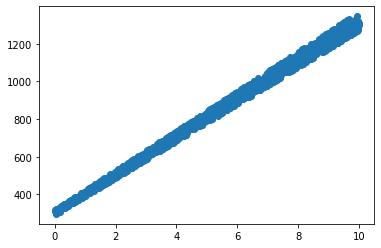

In [5]:
plt.scatter(xObs,yObs)
plt.plot(xObs, testModel(parameters))
plt.show()


<ErrorbarContainer object of 3 artists>

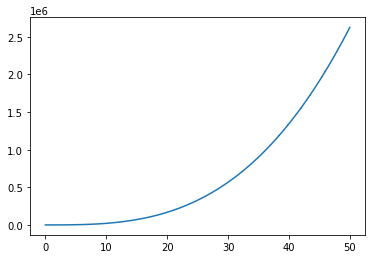

In [7]:
xObs = np.linspace(0,50, 100)
yObs = (3*xObs) + 7 + 21*xObs**3
Perror = np.sqrt(yObs)
# Fitting Model
def testModel(xObs, a, b, c):
    return a*xObs + b + c*xObs**3


popt, pcov = curve_fit(testModel, xObs, yObs)
# print(Perror)
plt.errorbar(xObs, yObs, yerr = Perror)
# plt.plot(xObs, testModel(xObs, *popt))

## Trying Least Squares Fitting Instead

ChiSquared: 5.6904720656415944e-27 
 Reduced ChiSquare: 5.707594850192171e-30 
 Fitted Parameters: 12.0, 1.0, 10.0 
 Parameter Errors: 0.0, 0.0, 0.0


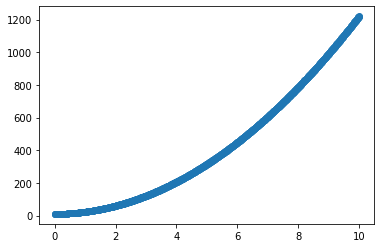

In [107]:
## Minimisation Function Requires 
# X and Y Observed Data
xObs = np.linspace(0,10, 1000)
yObs = ( (12*xObs**2) + (1*xObs) + 10 ) 

# Fitting Model
def testModel(xObs,a,b,c):
    return a*(xObs**2) + b*(xObs) +  c
# Chi Squared Fitting Function
def ChiSq(xObs, yObs, params ):
    model = testModel(xObs, *params)
    return np.sum( ((yObs - model)**2) / (model) )
# Residual Function
def residuals(params):
    return testModel(params, xObs) - yObs
#Initial Guess Values
initGuess = [12,1,10]
# Fitting the Model to the Data
pOpt , pCov = curve_fit(testModel, xObs, yObs)

params = pOpt
errors = np.sqrt(np.diag(pCov))
chiSq = ChiSq(xObs,yObs,params)
DoF = len(xObs) - len(params)

print('ChiSquared: {} \n Reduced ChiSquare: {} \n Fitted Parameters: {}, {}, {} \n Parameter Errors: {}, {}, {}'.format(chiSq, chiSq / DoF, *np.round(params,2), *np.round(errors,2)))

plt.scatter(xObs,yObs)
plt.plot(xObs, testModel(xObs, *pOpt))
plt.show()


In [93]:
a = np.array([1.73564,6.33748,8.885756])
np.round(a,2)

array([1.74, 6.34, 8.89])

# Energy Accretion Rate dependancy on Virial Temperature

We have used the critical virial temperature to be able to determine the rate of onset of the quasar phase. However, to prove that the critical virial velocity does indeed correspond to the onset of the exponential growth phase of the supermassive black hole at the center of the galaxy. We are going to be considering the equation:

$\dot{E} = \epsilon_f \epsilon_r \dot{m}_{accr} c^2$

This gives the energy injection rate onto the black hole, with the two constants being the energy coupling constant to the ISM, $\epsilon_f = 0.15$, and the amount of accreted mass radiated out, $\epsilon_r = 0.1$. This equation is given in (Schaye.J, et al, 2015).

I'm going to be plotting the ___

## Importing Relevant Modules

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import eagleAnalysisTools as EAT
import eagleAnalysis as EA
from colossus.cosmology import cosmology
from scipy.optimize import curve_fit
import math
from scipy import stats
import uncertainties.unumpy as unp
import uncertainties as unc

storageLocation = 'C:/Users/samue/Documents/University Work/Year 4/Quasars/DataStorage/haloDistributionFunction/'
simulation = "RefL0100N1504"
randomNumber = 1
size = 100

## Querying DataBase


I will be using the default progenitor query I wrote in my analysis class

### Querying all the Galaxies in the two categories

In [3]:
critVmax = 10**2.2

queryQPGalTree = 'SELECT \
        SH.SnapNum as SnapShot, \
        SH.GroupID as GroupID, \
        SH.Vmax as Vmax, \
        SH.TopLeafID as TopLeafID, \
        SH.Redshift as Z, \
        SH.MassType_DM as DMmass, \
        SH.BlackHoleMass as sgBHM, \
        SH.MassType_BH as pBHM, \
        SH.BlackHoleMassAccretionRate as iBMAR, \
        SH.VmaxRadius as VmaxR, \
        SH.SubGroupNumber as SubNum, \
        SH.StarFormationRate as SFR, \
        SH.StellarInitialMass as SM \
    FROM \
        {}_SubHalo as SH, \
        {}_SubHalo as Ref \
    WHERE \
        SH.BlackHoleMass > 0 AND \
        SH.StarFormationRate > 0 AND \
        SH.SubGroupNumber = 0 AND \
        SH.TopLeafID = Ref.TopLeafID AND \
        Ref.Vmax > {} AND \
        Ref.SnapNum = 28 AND \
        Ref.SubGroupNumber = 0 AND \
        Ref.BlackHoleMass > 0 \
    ORDER BY \
        SH.Redshift DESC'.format(simulation,simulation,critVmax)   # DO I need StarFOrmation  0

# A Quick Test to see what happens if I don't limit Virial Velocity for reference galaxies
queryAllGal = 'SELECT \
        SH.SnapNum as SnapShot, \
        SH.GroupID as GroupID, \
        SH.Vmax as Vmax, \
        SH.TopLeafID as TopLeafID, \
        SH.Redshift as Z, \
        SH.MassType_DM as DMmass, \
        SH.BlackHoleMass as sgBHM, \
        SH.MassType_BH as pBHM, \
        SH.BlackHoleMassAccretionRate as iBMAR, \
        SH.VmaxRadius as VmaxR, \
        SH.SubGroupNumber as SubNum, \
        SH.StarFormationRate as SFR, \
        SH.StellarInitialMass as SM \
    FROM \
        {}_SubHalo as SH, \
        {}_SubHalo as Ref \
    WHERE \
        SH.BlackHoleMass > 0 AND \
        SH.StarFormationRate > 0 AND \
        SH.SubGroupNumber = 0 AND \
        SH.TopLeafID = Ref.TopLeafID AND \
        Ref.SnapNum = 28 AND \
        Ref.SubGroupNumber = 0 AND \
        Ref.BlackHoleMass > 0  \
    ORDER BY \
        SH.Redshift DESC'.format(simulation,simulation)  


# A Quick Test to see what happens if I don't limit Virial Velocity for reference galaxies
queryAllGal = 'SELECT \
        SH.SnapNum as SnapShot, \
        SH.GroupID as GroupID, \
        SH.Vmax as Vmax, \
        SH.TopLeafID as TopLeafID, \
        SH.Redshift as Z, \
        SH.MassType_DM as DMmass, \
        SH.BlackHoleMass as sgBHM, \
        SH.MassType_BH as pBHM, \
        SH.BlackHoleMassAccretionRate as iBMAR, \
        SH.VmaxRadius as VmaxR, \
        SH.SubGroupNumber as SubNum, \
        SH.StarFormationRate as SFR, \
        SH.StellarInitialMass as SM \
    FROM \
        {}_SubHalo as SH \
    WHERE \
        SH.BlackHoleMass > 0 AND \
        SH.MassType_Star > 0 AND \
        SH.SubGroupNumber = 0 \
    ORDER BY \
        SH.Redshift DESC'.format(simulation)  



eagle = EAT.eagleData(randomNumber, simulation, storageLocation)


eagle.DatabaseQuery('GalaxiesAll', queryAllGal)
eagle.linkTimes('GalaxiesAll')




## Conducting Analysis

The first step in this analysis is to create the black hole accretion rate for for a selection of galaxies in the queried data

### Only considering Central Galaxies
The data reduction for only those galaxies that remain as central until the current epoch

In [4]:
eagle.dataStorage

{'GalaxiesAll': <Table length=1470511>
 SnapShot    GroupID        Vmax   ... LookBackTime   AgeOfUniverse     RedShift 
  int32       int64       float32  ...   float64         float64        float64  
 -------- -------------- --------- ... ------------ ------------------ ----------
        2  2000100000016  94.54678 ...  13.34299545 0.4560045499999994 9.99303373
        2  2000100000102  74.03795 ...  13.34299545 0.4560045499999994 9.99303373
        2  2000200000049      98.4 ...  13.34299545 0.4560045499999994 9.99303373
        2  2002300000093  61.63556 ...  13.34299545 0.4560045499999994 9.99303373
        2  2000000000077 147.72244 ...  13.34299545 0.4560045499999994 9.99303373
        2  2001700000012 61.819214 ...  13.34299545 0.4560045499999994 9.99303373
        2  2000300000139  98.79201 ...  13.34299545 0.4560045499999994 9.99303373
        2  2000000000206  74.58681 ...  13.34299545 0.4560045499999994 9.99303373
        2  2000300000123  86.96544 ...  13.34299545 0.45600

<ipython-input-18-b30cfa49dd6b>:47: RuntimeWarning: divide by zero encountered in true_divide
  ER.Storage['BHARvsDMAR'] = (ER.Storage['BHAR'] * ER.Vagn**2) / (ER.Storage['DMAR'] * ER.Storage['avVh']**2 )
<ipython-input-18-b30cfa49dd6b>:47: RuntimeWarning: invalid value encountered in true_divide
  ER.Storage['BHARvsDMAR'] = (ER.Storage['BHAR'] * ER.Vagn**2) / (ER.Storage['DMAR'] * ER.Storage['avVh']**2 )
<ipython-input-18-b30cfa49dd6b>:48: RuntimeWarning: divide by zero encountered in true_divide
  ER.Storage['SMARvsDMAR'] = (ER.Storage['avSFR'] *  ER.Vstar**2) /  (ER.Storage['DMAR'] * ER.Storage['avVh']**2 )
<ipython-input-18-b30cfa49dd6b>:48: RuntimeWarning: invalid value encountered in true_divide
  ER.Storage['SMARvsDMAR'] = (ER.Storage['avSFR'] *  ER.Vstar**2) /  (ER.Storage['DMAR'] * ER.Storage['avVh']**2 )
<ipython-input-18-b30cfa49dd6b>:49: RuntimeWarning: invalid value encountered in add
  ER.Storage['EnergyEq'] = ER.Storage['BHARvsDMAR'] + ER.Storage['SMARvsDMAR']


2.28853859303124 6.357448183657029


C:\Users\samue\Dropbox\Samuel Hayes - L4 Project - A Model for the Evolution of Quasars\Jupyter Notebook FIles\Epiphany\eagleAnalysis.py:113: RuntimeWarning: invalid value encountered in log10
  valuesToBeBinned = np.array( np.log10( self.Storage[variableToBeBinned] ) )


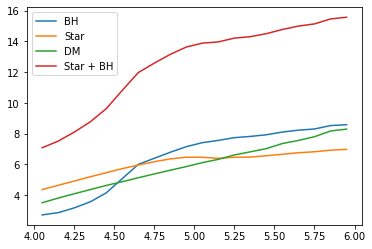

In [18]:
import pickle
dataSet = ['GalaxiesAll','QPgalaxiesAll']
dataChoice = 0
xPlotting = 'avTh'
# binningRange = [4,6]
binningRange = [4,6]
loadData = True
loadName = "EnergyBalance.p"
numBins = 20

# Establishing Analysis Tool
ER = EA.eagleReduction(storageLocation)
cosmo = cosmology.setCosmology('planck18')

if not loadData:
    # Variables I Want For The Analysis
    properties = ['TopLeafID', 'sgBHM', 'DMmass' ,'Z', 'SnapShot', 'AgeOfUniverse', 'Vmax', 'SFR', 'SM','SnapShot']
    ER.LoadInData(eagle.dataStorage[dataSet[dataChoice]], properties)
    # Calculating Composite Values
    ER.Storage['Hz'] = cosmo.Hz(ER.Storage['Z'])
    ER.Storage['Vh'] = (ER.G * ER.Storage['DMmass'] * 10 * ER.Storage['Hz'])**(1./3) 
    ER.Storage['Tmax'] = ( 3.6 *(1e5) ) * (ER.Storage['Vmax']/100)**2 
    ER.Storage['Th'] = ( 3.6 *(1e5) ) * (ER.Storage['Vh']/100)**2 
    ER.Storage['sSFR'] = ER.Storage['SFR'] / ER.Storage['SM']


    # Variables I want for Plotting
    namesRate = ['BHAR', 'DMAR']
    propertiesRate = ['sgBHM', 'DMmass']
    ER.RateValues(namesRate, propertiesRate, 'AgeOfUniverse', perGal = True)

    namesAv = ['avTh', 'avVh', 'avBHM', 'avsSFR', 'avSFR', 'avSN']
    propertiesAv = ['Th', 'Vh',  'sgBHM', 'sSFR', 'SFR', 'SN']
    ER.AverageValues(namesAv, propertiesAv, perGal = True)

    namesDiff = ['diffTimes']
    propertiesDiff = ['AgeOfUniverse']
    ER.DifferenceValues(namesDiff, propertiesDiff, perGal = True)

    # ER.Storage['SMAR'] = ER.Storage['avSFR'] * ER.Storage['diffTimes'] *10**9
    pickle.dump(ER.Storage, open("EnergyBalance.p","wb") )

else:
    ER.Storage = pickle.load(open(loadName, "rb"))
    
# Creating Plotting Variables
ER.Storage['BHARvsDMAR'] = (ER.Storage['BHAR'] * ER.Vagn**2) / (ER.Storage['DMAR'] * ER.Storage['avVh']**2 )
ER.Storage['SMARvsDMAR'] = (ER.Storage['avSFR'] *  ER.Vstar**2) /  (ER.Storage['DMAR'] * ER.Storage['avVh']**2 )
ER.Storage['EnergyEq'] = ER.Storage['BHARvsDMAR'] + ER.Storage['SMARvsDMAR']

ER.Storage['BHenergy'] = (ER.Storage['BHAR'] * ER.Vagn**2)
ER.Storage['SMenergy'] = (ER.Storage['avSFR'] * ER.Vstar**2)
ER.Storage['DMenergy'] = (ER.Storage['DMAR'] * ER.Storage['avVh']**2 )
    
#Conduct Binning
print(np.log10(min(ER.Storage['avTh'])),np.log10(max(ER.Storage['avTh'])))
ER.Binning(numBins, xPlotting, 'BHARvsDMAR', binningRange, loggedBins = True, loggedValues = True)
ER.Binning(numBins, xPlotting, 'SMARvsDMAR', binningRange, loggedBins = True, loggedValues = True)
ER.Binning(numBins, xPlotting, 'EnergyEq', binningRange, loggedBins = True, loggedValues = True)

# Binning Conditions
ER.Binning(numBins, xPlotting, 'avsSFR', binningRange, loggedBins = True, loggedValues = True)
ER.Binning(numBins, xPlotting, 'avSFR', binningRange, loggedBins = True, loggedValues = True)
ER.Binning(numBins, xPlotting, 'avBHM', binningRange, loggedBins = True, loggedValues = True)

# Testing Binning
ER.Binning(numBins, xPlotting, 'BHenergy', binningRange, loggedBins = True, loggedValues = True)
ER.Binning(numBins, xPlotting, 'SMenergy', binningRange, loggedBins = True, loggedValues = True)
ER.Binning(numBins, xPlotting, 'DMenergy', binningRange, loggedBins = True, loggedValues = True)



plt.plot(ER.binStorage['{} vs BHenergy'.format(xPlotting)]['binCenters'], ER.binStorage['{} vs BHenergy'.format(xPlotting)]['Median'], label='BH')
plt.plot(ER.binStorage['{} vs SMenergy'.format(xPlotting)]['binCenters'], ER.binStorage['{} vs SMenergy'.format(xPlotting)]['Median'], label='Star')
plt.plot(ER.binStorage['{} vs DMenergy'.format(xPlotting)]['binCenters'], ER.binStorage['{} vs DMenergy'.format(xPlotting)]['Median'], label='DM')
plt.plot(ER.binStorage['{} vs DMenergy'.format(xPlotting)]['binCenters'], (ER.binStorage['{} vs BHenergy'.format(xPlotting)]['Median']+ER.binStorage['{} vs SMenergy'.format(xPlotting)]['Median']), label='Star + BH')
plt.legend()
plt.show()


# print(ER.Vagn, ER.Storage['avVh'][:10])

In [40]:
# import pickle
# pickle.dump(ER.Storage, open("EnergyBalance2.p","wb") )

# IDs = np.unique(ER.Storage['TopLeafID'])
# mask = ER.Storage['TopLeafID'] == IDs[10]

# print(ER.Storage['SnapShot'][mask])
# ER.LoadInData(eagle.dataStorage[dataSet[dataChoice]], ['SnapShot'])

# namesAv = ['avSN']
# propertiesAv = ['SnapShot']
# ER.AverageValues(namesAv, propertiesAv, perGal = True)
# pickle.dump(ER.Storage, open("EnergyBalance.p","wb") )
ER.Storage.keys()

dict_keys(['TopLeafID', 'sgBHM', 'DMmass', 'Z', 'SnapShot', 'AgeOfUniverse', 'Vmax', 'SFR', 'SM', 'Hz', 'Vh', 'Tmax', 'Th', 'sSFR', 'BHAR', 'DMAR', 'avTh', 'avVh', 'avBHM', 'avsSFR', 'avSFR', 'diffTimes', 'BHARvsDMAR', 'SMARvsDMAR', 'EnergyEq', 'BHenergy', 'SMenergy', 'DMenergy', 'avSN'])

### Plotting


[ 0.83337482  0.82187422  0.81731552  0.83102007  0.84105592  0.85865002
  0.82415769  0.77120438  0.68622638  0.5447391   0.3054398   0.05737898
 -0.13165815 -0.32769662 -0.47978535 -0.69982249 -0.79132272 -1.06380697
 -1.31554383 -1.36805845]
Kappa Value: 5.285478424280328 +\- [0.00017733]
MIN: 4.35, MAX: 4.85
MIN: 4.35, MAX: 4.85
[-0.76389974 -0.91724541 -0.88348713 -0.73218781 -0.35361183  0.42147387
  0.82453338  0.96623051  1.22581113  1.36259771  1.317676    1.22247805
  1.13115457  0.96672026  0.87439622  0.77061333  0.67339633  0.45637043
  0.51390496  0.23870359]
MIN: 4.35, MAX: 4.85
[0.95815019 0.94213967 0.97188879 1.05073401 1.11327376 1.16702073
 1.18148186 1.23245381 1.37017353 1.42969438 1.36712538 1.25678668
 1.15986716 0.991222   0.89943053 0.78607398 0.6972261  0.46356929
 0.51679471 0.25282791]


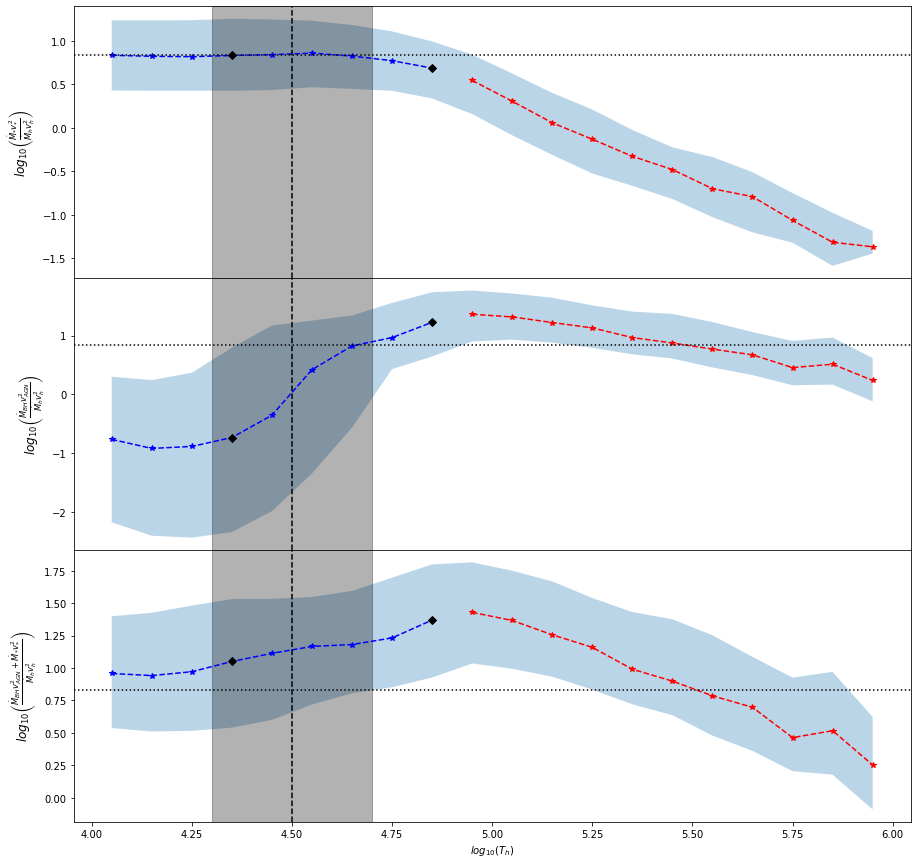

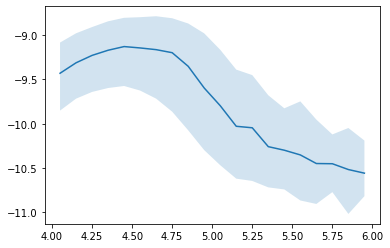

In [13]:
def Plotting(subNum, xValue, yValue, upperPerc, lowerPerc, xLabel, yLabel, criticalSpan):
    # Plotting Blue and Red Sequences
    axes[subNum].plot(xValue[maskLowSFR], yValue[maskLowSFR], linestyle = '--', color= 'red', marker = '*')
    axes[subNum].plot(xValue[maskHighSFR], yValue[maskHighSFR], linestyle = '--', color= 'blue', marker = '*')

    # Plotting Critical Region
    axes[subNum].axvspan(criticalRange[0],criticalRange[1],  alpha = 0.3, color= 'black')
    axes[subNum].axvline(np.mean(criticalRange),color='black',linestyle='--')

    # Plotting Percentiles
    axes[subNum].fill_between(xValue , upperPerc, lowerPerc, alpha = 0.3)

    # Plotting Exponential Growth Onset
    axes[subNum].plot(xValue[maskPreExponential][-1],yValue[maskPreExponential][-1], marker = 'D', color = 'black')
    axes[subNum].plot(xValue[maskPostExponential][0],yValue[maskPostExponential][0], marker = 'D', color = 'black')
    print("MIN: {}, MAX: {}".format(xValue[maskPreExponential][-1], xValue[maskPostExponential][0]))
    
    axes[subNum].axhline(Kappa*ER.OmegaB, color = 'black', linestyle = ':')
    axes[subNum].set_ylabel(yLab, fontsize = 12)

def LinearModel(x, a, b):
    return (a*x) + b
# Fitting Model
def testModel(xObs,b):
    return b
# Chi Squared Fitting Function
def ChiSq(xObs, yObs, params ):
    model = testModel(xObs, *params)
    return np.sum( ((yObs - model)**2) / abs(model) )
# Residual Function
def residuals(params):
    return testModel(params, xObs) - yObs


# Values used for Plotting
BHMpreCrit, BHMpostCrit = 5.5, 6.5
minBinning, maxBinning = 5, 7.5
SFRcritical = -9.5
critEquilibrium = (ER.kappa * ER.OmegaB) 
criticalRange = [4.3,4.7]

# Defining Figure
fig, axes = plt.subplots(3,1, figsize = (15,15), sharex = True)

#Defining Masks
# Mask Labels
BHMlab,SFRlab = '{} vs avBHM'.format(xPlotting), '{} vs avsSFR'.format(xPlotting)
# Exponetial Growth Phase Masks
maskPreExponential = (ER.binStorage[BHMlab]['Median'] < BHMpreCrit) 
maskPostExponential = (ER.binStorage[BHMlab]['Median'] > BHMpostCrit) 
# Star Formation Rate Mask
maskLowSFR = (ER.binStorage[SFRlab]['Median'] < SFRcritical)
maskHighSFR = (ER.binStorage[SFRlab]['Median'] > SFRcritical) 

##########################################
######## Plotting SFR vs DMAR ############
##########################################+
# Defining Dictionary lable
SMARlab = '{} vs SMARvsDMAR'.format(xPlotting)
xLab = r'$log_{10}(T_{h})$'
yLab = r'$log_{10}\left(\frac{\dot{M}_{*}v^2_{*}}{\dot{M}_{h}v^2_h} \right)$'

# Grabbing Plotting Data
x = ER.binStorage[SMARlab]['binCenters']
y =  ER.binStorage[SMARlab]['Median']
yUp = ER.binStorage[SMARlab]['Percentile75']
yDown =  ER.binStorage[SMARlab]['Percentile25']
print(y)
pOpt , pCov = curve_fit(testModel, x[:7], y[:7])
Kappa = pOpt[0]/ER.OmegaB
Error = pCov[0]/ER.OmegaB
print("Kappa Value: {} +\- {}".format(Kappa,Error))

Plotting(0, x, y, yUp, yDown, xLab, yLab, criticalRange)

##########################################
####### Plotting BHAR vs DMAR ############
##########################################
# Defining Dictionary lable
BHARlab = '{} vs BHARvsDMAR'.format(xPlotting)
xLab = r'$log_{10}(T_{h})$'
yLab = r'$log_{10}\left(\frac{\dot{M}_{BH}v^2_{AGN}}{\dot{M}_{h}v^2_h} \right)$'

# Grabbing Plotting Data
x = ER.binStorage[BHARlab]['binCenters']
y = ER.binStorage[BHARlab]['Median']
yUp = ER.binStorage[BHARlab]['Percentile75']
yDown = ER.binStorage[BHARlab]['Percentile25']
Plotting(1, x, y, yUp, yDown, xLab, yLab, criticalRange)
print(y)



##########################################
######## Plotting Ein vs Eout ############
##########################################

# Defining Dictionary lable
EinVsEout = '{} vs EnergyEq'.format(xPlotting)
xLab = r'$log_{10}(T_{h})$'
yLab = r'$log_{10}\left(\frac{\dot{M}_{BH}v^2_{AGN} + \dot{M}_{*}v^2_{*}}{\dot{M}_{h}v^2_h} \right)$'

# Grabbing Plotting Data
x = ER.binStorage[EinVsEout]['binCenters']
y = ER.binStorage[EinVsEout]['Median']
yUp = ER.binStorage[EinVsEout]['Percentile75']
yDown = ER.binStorage[EinVsEout]['Percentile25']
Plotting(2, x, y, yUp, yDown, xLab, yLab, criticalRange)
print(y)

# Fitting Data
# fit, CI95, CI = ER.FitModel(LinearModel, x, y)
# axes[2].plot(CI[0], CI[1], color = 'black', linestyle = '--')
# axes[2].plot(CI[0], CI[2], color = 'black', linestyle = '--')
# axes[2].plot(x, fit[1], color = 'black')
axes[2].set_xlabel(xLab)

# Setting Axes Range
# axes[0].set_ylim(-1.9,1.9)
# axes[1].set_ylim(-1.9,1.9)
# axes[2].set_ylim(-1.9,1.9)



plt.subplots_adjust(hspace = 0)
plt.show()

# print(ER.binStorage[SFRlab]['Median'])
lab = "avTh vs avsSFR"
plt.plot(ER.binStorage[lab]['binCenters'],ER.binStorage[lab]['Median'])
plt.fill_between(ER.binStorage[lab]['binCenters'],ER.binStorage[lab]['Percentile75'],ER.binStorage[lab]['Percentile25'], alpha = 0.2)

## Redshfit Analysis

27.5| Minimum: 2.304176146852221,   Maximum: 6.357448183657029,   Length: 67575
26.5| Minimum: 2.327033303535436,   Maximum: 6.315904304596231,   Length: 69726
19.5| Minimum: 2.4482501749250067,   Maximum: 6.080123140576854,   Length: 71922
16.5| Minimum: 2.5713588380005845,   Maximum: 6.007101908863759,   Length: 64938
12.5| Minimum: 2.6668050092743325,   Maximum: 5.828446804780586,   Length: 46545
8.5| Minimum: 3.104810995570611,   Maximum: 5.474753562273633,   Length: 21286
4.5| Minimum: 3.1397322345627945,   Maximum: 5.137220945828269,   Length: 2814


C:\Users\samue\Dropbox\Samuel Hayes - L4 Project - A Model for the Evolution of Quasars\Jupyter Notebook FIles\Epiphany\eagleAnalysis.py:113: RuntimeWarning: divide by zero encountered in log10
  valuesToBeBinned = np.array( np.log10( self.Storage[variableToBeBinned] ) )
C:\Users\samue\Dropbox\Samuel Hayes - L4 Project - A Model for the Evolution of Quasars\Jupyter Notebook FIles\Epiphany\eagleAnalysis.py:113: RuntimeWarning: invalid value encountered in log10
  valuesToBeBinned = np.array( np.log10( self.Storage[variableToBeBinned] ) )
C:\Users\samue\Dropbox\Samuel Hayes - L4 Project - A Model for the Evolution of Quasars\Jupyter Notebook FIles\Epiphany\eagleAnalysis.py:139: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  binDataStorage['rawBinnedData'] = np.array(binne

27.5| Minimum: 2.304176146852221,   Maximum: 6.357448183657029,   Length: 67575
26.5| Minimum: 2.327033303535436,   Maximum: 6.315904304596231,   Length: 69726
19.5| Minimum: 2.4482501749250067,   Maximum: 6.080123140576854,   Length: 71922
16.5| Minimum: 2.5713588380005845,   Maximum: 6.007101908863759,   Length: 64938
12.5| Minimum: 2.6668050092743325,   Maximum: 5.828446804780586,   Length: 46545
8.5| Minimum: 3.104810995570611,   Maximum: 5.474753562273633,   Length: 21286
4.5| Minimum: 3.1397322345627945,   Maximum: 5.137220945828269,   Length: 2814


C:\Users\samue\Dropbox\Samuel Hayes - L4 Project - A Model for the Evolution of Quasars\Jupyter Notebook FIles\Epiphany\eagleAnalysis.py:113: RuntimeWarning: divide by zero encountered in log10
  valuesToBeBinned = np.array( np.log10( self.Storage[variableToBeBinned] ) )
C:\Users\samue\Dropbox\Samuel Hayes - L4 Project - A Model for the Evolution of Quasars\Jupyter Notebook FIles\Epiphany\eagleAnalysis.py:113: RuntimeWarning: invalid value encountered in log10
  valuesToBeBinned = np.array( np.log10( self.Storage[variableToBeBinned] ) )
C:\Users\samue\Dropbox\Samuel Hayes - L4 Project - A Model for the Evolution of Quasars\Jupyter Notebook FIles\Epiphany\eagleAnalysis.py:139: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  binDataStorage['rawBinnedData'] = np.array(binne

27.5| Minimum: 2.304176146852221,   Maximum: 6.357448183657029,   Length: 67575
26.5| Minimum: 2.327033303535436,   Maximum: 6.315904304596231,   Length: 69726
19.5| Minimum: 2.4482501749250067,   Maximum: 6.080123140576854,   Length: 71922
16.5| Minimum: 2.5713588380005845,   Maximum: 6.007101908863759,   Length: 64938
12.5| Minimum: 2.6668050092743325,   Maximum: 5.828446804780586,   Length: 46545
8.5| Minimum: 3.104810995570611,   Maximum: 5.474753562273633,   Length: 21286
4.5| Minimum: 3.1397322345627945,   Maximum: 5.137220945828269,   Length: 2814


C:\Users\samue\Dropbox\Samuel Hayes - L4 Project - A Model for the Evolution of Quasars\Jupyter Notebook FIles\Epiphany\eagleAnalysis.py:113: RuntimeWarning: divide by zero encountered in log10
  valuesToBeBinned = np.array( np.log10( self.Storage[variableToBeBinned] ) )
C:\Users\samue\Dropbox\Samuel Hayes - L4 Project - A Model for the Evolution of Quasars\Jupyter Notebook FIles\Epiphany\eagleAnalysis.py:113: RuntimeWarning: invalid value encountered in log10
  valuesToBeBinned = np.array( np.log10( self.Storage[variableToBeBinned] ) )
C:\Users\samue\Dropbox\Samuel Hayes - L4 Project - A Model for the Evolution of Quasars\Jupyter Notebook FIles\Epiphany\eagleAnalysis.py:139: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  binDataStorage['rawBinnedData'] = np.array(binne

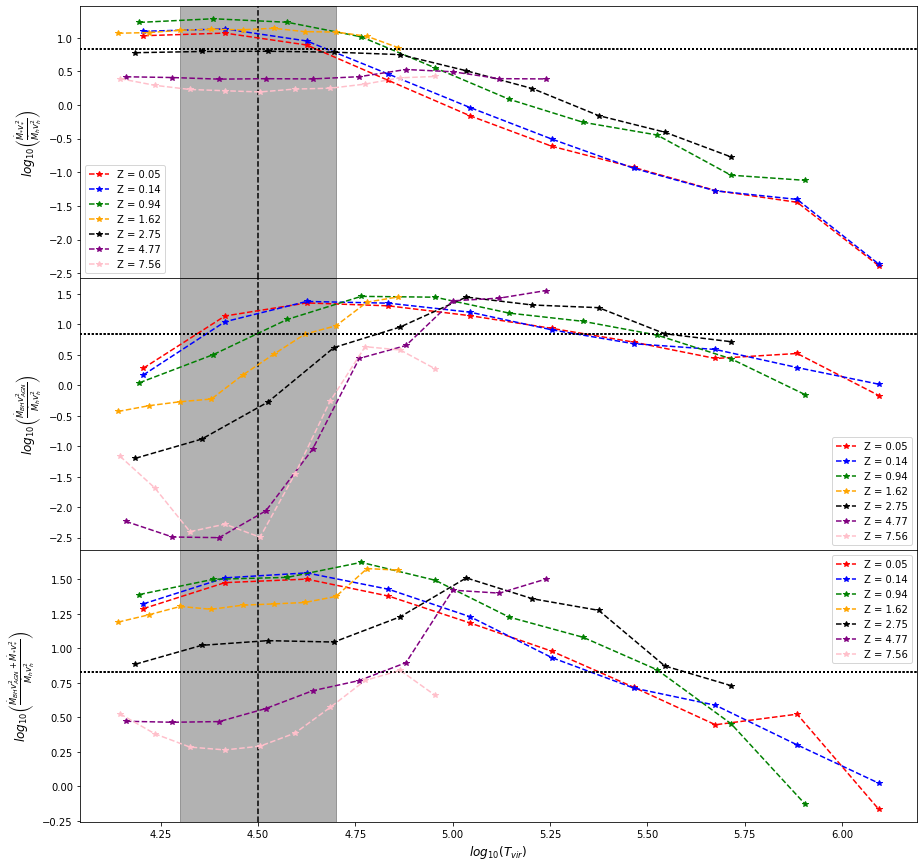

SnapNum     Z      LookBackTime        refZ          AgeOfUniverse   
------- ---------- ------------ ------------------ ------------------
    3.0 8.98787474  13.26939663               8.99 0.5296033700000002
    4.0 8.07461608  13.18443969               8.07 0.6145603099999999
    5.0 7.04956604  13.05959447               7.05 0.7394055299999991
    6.0 5.97116243  12.87707213               5.97 0.9219278699999993
    7.0  5.4874151  12.77004409               5.49 1.0289559099999988
    8.0 5.03723649  12.65093052               5.04 1.1480694800000002
    9.0 4.48521382  12.47098305               4.49 1.3280169500000003
   10.0 3.98366355  12.26360451               3.98  1.535395489999999
   11.0 3.52797657  12.02476958 3.5300000000000002 1.7742304200000003
   12.0 3.01650464  11.67502063               3.02  2.123979369999999
   13.0 2.47841334  11.16679464               2.48 2.6322053599999986
   14.0 2.23703689  10.87075514               2.24 2.9282448599999995
   15.0 2.01241024  

In [9]:
SNrange = [27.5, 26.5, 19.5, 16.5, 12.5, 8.5, 4.5]
Redshifts = [0.05, 0.14, 0.94, 1.62, 2.75, 4.77, 7.56]

numBins = 10
binRange = [[4.1,6.2], [4.1,6.2], [4.1,6.0], [4.1,4.9], [4.1,5.8], [4.1,5.3], [4.1,5.]]
# binRange = [[6,7], [5.8,7.4], [5.5,7], [5.5,6.8], [5.5,7]]
criticalRange = [4.3,4.7]
colour = ['red', 'blue', 'green', 'orange', 'black', 'purple', 'pink']
fig, axes = plt.subplots(3,1, figsize = (15,15), sharex = True)

def PlottingZ(subNum, xValue, yValue, xLabel, yLabel, colour, lab):
    # Plotting Blue and Red Sequences
    axes[subNum].plot(xValue, yValue, linestyle = '--', color= colour, marker = '*', label = lab)
    # Plotting Critical Region

    axes[subNum].axhline(Kappa*ER.OmegaB, color = 'black', linestyle = ':')

#     axes[subNum].axhline(critEquilibrium, color = 'black', linestyle = ':')
    axes[subNum].set_ylabel(yLab, fontsize = 12)
    axes[subNum].set_xlabel(xLab, fontsize = 12)
    axes[subNum].legend()


ylab = 'SMARvsDMAR'
ER.RedshiftBinning( xPlotting, ylab, SNrange, numBins, binRange, AverageSnapshot = True, loggedBins = True, loggedValues = True)

axes[0].axvspan(criticalRange[0],criticalRange[1],  alpha = 0.3, color= 'black')
axes[0].axvline(np.mean(criticalRange),color='black',linestyle='--')

for SN, col, Z in zip(SNrange,colour, Redshifts):
    x = ER.binStorage['{}| avTh vs {}| SMARvsDMAR'.format(SN,SN)]['binCenters']
    y = ER.binStorage['{}| avTh vs {}| SMARvsDMAR'.format(SN,SN)]['Median']
    xLab = r'$log_{10}(T_{vir})$'
    yLab = r'$log_{10}\left(\frac{\dot{M}_{*}v^2_{*}}{\dot{M}_{h}v^2_h} \right)$'
    
    PlottingZ(0, x, y, xLab, yLab, col, 'Z = {}'.format(Z))
    

ylab = 'BHARvsDMAR'
ER.RedshiftBinning( xPlotting, ylab, SNrange, numBins, binRange, AverageSnapshot = True, loggedBins = True, loggedValues = True)

axes[1].axvspan(criticalRange[0],criticalRange[1],  alpha = 0.3, color= 'black')
axes[1].axvline(np.mean(criticalRange),color='black',linestyle='--')

for SN, col, Z in zip(SNrange,colour, Redshifts):

    x = ER.binStorage['{}| avTh vs {}| BHARvsDMAR'.format(SN,SN)]['binCenters']
    y = ER.binStorage['{}| avTh vs {}| BHARvsDMAR'.format(SN,SN)]['Median']
    xLab = r'$log_{10}(T_{vir})$'
    yLab = r'$log_{10}\left(\frac{\dot{M}_{BH}v^2_{AGN}}{\dot{M}_{h}v^2_h} \right)$'
    
    PlottingZ(1, x, y, xLab, yLab, col, 'Z = {}'.format(Z))

    

ylab = 'EnergyEq'
ER.RedshiftBinning( xPlotting, ylab, SNrange, numBins, binRange, AverageSnapshot = True, loggedBins = True, loggedValues = True)

axes[2].axvspan(criticalRange[0],criticalRange[1],  alpha = 0.3, color= 'black')
axes[2].axvline(np.mean(criticalRange),color='black',linestyle='--')

for SN, col, Z in zip(SNrange,colour, Redshifts):

    x = ER.binStorage['{}| avTh vs {}| EnergyEq'.format(SN,SN)]['binCenters']
    y = ER.binStorage['{}| avTh vs {}| EnergyEq'.format(SN,SN)]['Median']
    xLab = r'$log_{10}(T_{vir})$'
    yLab = r'$log_{10}\left(\frac{\dot{M}_{BH}v^2_{AGN} + \dot{M}_{*}v^2_{*}}{\dot{M}_{h}v^2_h} \right)$'
    
    PlottingZ(2, x, y, xLab, yLab, col, 'Z = {}'.format(Z))
#     fit, CI95, CI = ER.FitModel(LinearModel, x, y)
#     plt.plot(x, fit[1], color = col)

    
plt.subplots_adjust(hspace = 0)
plt.show()

print(eagle.timeData[ 3:20])


27.5| Minimum: 2.304176146852221,   Maximum: 6.357448183657029,   Length: 67575
26.5| Minimum: 2.327033303535436,   Maximum: 6.315904304596231,   Length: 69726
19.5| Minimum: 2.4482501749250067,   Maximum: 6.080123140576854,   Length: 71922
16.5| Minimum: 2.5713588380005845,   Maximum: 6.007101908863759,   Length: 64938
12.5| Minimum: 2.6668050092743325,   Maximum: 5.828446804780586,   Length: 46545
8.5| Minimum: 3.104810995570611,   Maximum: 5.474753562273633,   Length: 21286
4.5| Minimum: 3.1397322345627945,   Maximum: 5.137220945828269,   Length: 2814
27.5| Minimum: 2.304176146852221,   Maximum: 6.357448183657029,   Length: 67575
26.5| Minimum: 2.327033303535436,   Maximum: 6.315904304596231,   Length: 69726


C:\Users\samue\Dropbox\Samuel Hayes - L4 Project - A Model for the Evolution of Quasars\Jupyter Notebook FIles\Epiphany\eagleAnalysis.py:113: RuntimeWarning: divide by zero encountered in log10
  valuesToBeBinned = np.array( np.log10( self.Storage[variableToBeBinned] ) )
C:\Users\samue\Dropbox\Samuel Hayes - L4 Project - A Model for the Evolution of Quasars\Jupyter Notebook FIles\Epiphany\eagleAnalysis.py:113: RuntimeWarning: invalid value encountered in log10
  valuesToBeBinned = np.array( np.log10( self.Storage[variableToBeBinned] ) )
C:\Users\samue\Dropbox\Samuel Hayes - L4 Project - A Model for the Evolution of Quasars\Jupyter Notebook FIles\Epiphany\eagleAnalysis.py:139: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  binDataStorage['rawBinnedData'] = np.array(binne

19.5| Minimum: 2.4482501749250067,   Maximum: 6.080123140576854,   Length: 71922
16.5| Minimum: 2.5713588380005845,   Maximum: 6.007101908863759,   Length: 64938
12.5| Minimum: 2.6668050092743325,   Maximum: 5.828446804780586,   Length: 46545
8.5| Minimum: 3.104810995570611,   Maximum: 5.474753562273633,   Length: 21286
4.5| Minimum: 3.1397322345627945,   Maximum: 5.137220945828269,   Length: 2814
27.5| Minimum: 2.304176146852221,   Maximum: 6.357448183657029,   Length: 67575
26.5| Minimum: 2.327033303535436,   Maximum: 6.315904304596231,   Length: 69726
19.5| Minimum: 2.4482501749250067,   Maximum: 6.080123140576854,   Length: 71922
16.5| Minimum: 2.5713588380005845,   Maximum: 6.007101908863759,   Length: 64938
12.5| Minimum: 2.6668050092743325,   Maximum: 5.828446804780586,   Length: 46545
8.5| Minimum: 3.104810995570611,   Maximum: 5.474753562273633,   Length: 21286
4.5| Minimum: 3.1397322345627945,   Maximum: 5.137220945828269,   Length: 2814


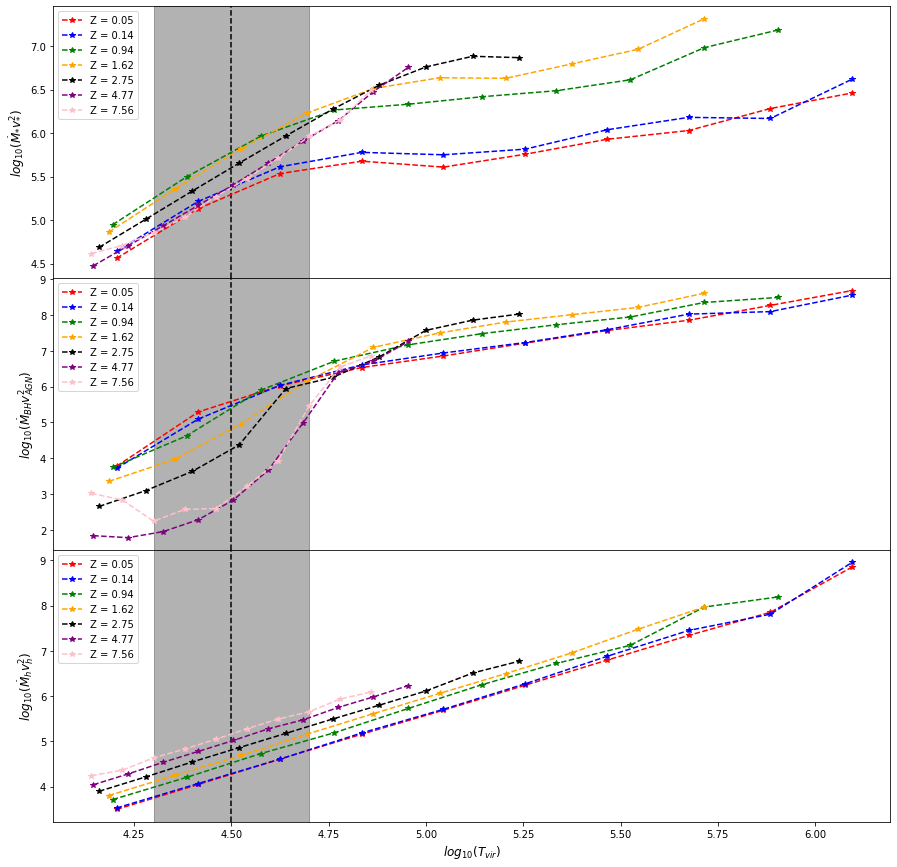

27.5| Minimum: 2.304176146852221,   Maximum: 6.357448183657029,   Length: 67575
Kappa Value: 6.214797759558524
27.5| Minimum: 2.304176146852221,   Maximum: 6.357448183657029,   Length: 67575
27.5| Minimum: 2.304176146852221,   Maximum: 6.357448183657029,   Length: 67575


C:\Users\samue\Dropbox\Samuel Hayes - L4 Project - A Model for the Evolution of Quasars\Jupyter Notebook FIles\Epiphany\eagleAnalysis.py:113: RuntimeWarning: divide by zero encountered in log10
  valuesToBeBinned = np.array( np.log10( self.Storage[variableToBeBinned] ) )
C:\Users\samue\Dropbox\Samuel Hayes - L4 Project - A Model for the Evolution of Quasars\Jupyter Notebook FIles\Epiphany\eagleAnalysis.py:113: RuntimeWarning: invalid value encountered in log10
  valuesToBeBinned = np.array( np.log10( self.Storage[variableToBeBinned] ) )
C:\Users\samue\Dropbox\Samuel Hayes - L4 Project - A Model for the Evolution of Quasars\Jupyter Notebook FIles\Epiphany\eagleAnalysis.py:139: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  binDataStorage['rawBinnedData'] = np.array(binne

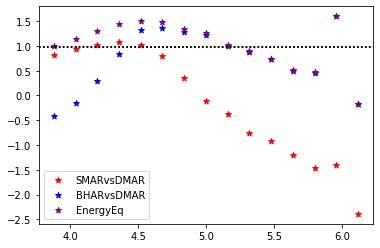

In [21]:

ylab = 'SMenergy'
SNrange = [27.5, 26.5, 19.5, 16.5, 12.5, 8.5, 4.5]
Redshifts = [0.05, 0.14, 0.94, 1.62, 2.75, 4.77, 7.56]

numBins = 10
binRange = [[4.1,6.2], [4.1,6.2], [4.1,6.0], [4.1,5.8], [4.1,5.3], [4.1,5.], [4.1,4.9]]
# binRange = [[6,7], [5.8,7.4], [5.5,7], [5.5,6.8], [5.5,7]]
criticalRange = [4.3,4.7]


colour = ['red', 'blue', 'green', 'orange', 'black', 'purple', 'pink']
fig, axes = plt.subplots(3,1, figsize = (15,15), sharex = True)

def PlottingZ(subNum, xValue, yValue, xLabel, yLabel, colour, lab):
    # Plotting Blue and Red Sequences
    axes[subNum].plot(xValue, yValue, linestyle = '--', color= colour, marker = '*', label = lab)

#     axes[subNum].axhline(critEquilibrium, color = 'black', linestyle = ':')
    axes[subNum].set_ylabel(yLab, fontsize = 12)
    axes[subNum].set_xlabel(xLab, fontsize = 12)
    axes[subNum].legend()

# Fitting Model
def testModel(xObs,b):
    return b


ER.RedshiftBinning( xPlotting, ylab, SNrange, numBins, binRange, AverageSnapshot = True, loggedBins = True, loggedValues = True)

axes[0].axvspan(criticalRange[0],criticalRange[1],  alpha = 0.3, color= 'black')
axes[0].axvline(np.mean(criticalRange),color='black',linestyle='--')

for SN, col, Z in zip(SNrange,colour, Redshifts):
    x = ER.binStorage['{}| avTh vs {}| {}'.format(SN,SN,ylab)]['binCenters']
    y = ER.binStorage['{}| avTh vs {}| {}'.format(SN,SN,ylab)]['Median']
    xLab = r'$log_{10}(T_{vir})$'
    yLab = r'$log_{10}(\dot{M}_{*}v^2_{*})$'
    
    PlottingZ(0, x, y, xLab, yLab, col, 'Z = {}'.format(Z))

    


ylab = 'BHenergy'
ER.RedshiftBinning( xPlotting, ylab, SNrange, numBins, binRange, AverageSnapshot = True, loggedBins = True, loggedValues = True)

axes[1].axvspan(criticalRange[0],criticalRange[1],  alpha = 0.3, color= 'black')
axes[1].axvline(np.mean(criticalRange),color='black',linestyle='--')

for SN, col, Z in zip(SNrange,colour, Redshifts):    
    x = ER.binStorage['{}| avTh vs {}| {}'.format(SN,SN,ylab)]['binCenters']
    y = ER.binStorage['{}| avTh vs {}| {}'.format(SN,SN,ylab)]['Median']
    xLab = r'$log_{10}(T_{vir})$'
    yLab = r'$log_{10}(\dot{M}_{BH}v^2_{AGN})$'
    
    PlottingZ(1, x, y, xLab, yLab, col, 'Z = {}'.format(Z))


ylab = 'DMenergy'
ER.RedshiftBinning( xPlotting, ylab, SNrange, numBins, binRange, AverageSnapshot = True, loggedBins = True, loggedValues = True)

axes[2].axvspan(criticalRange[0],criticalRange[1],  alpha = 0.3, color= 'black')
axes[2].axvline(np.mean(criticalRange),color='black',linestyle='--')

for SN, col, Z in zip(SNrange,colour, Redshifts):
    x = ER.binStorage['{}| avTh vs {}| {}'.format(SN,SN,ylab)]['binCenters']
    y = ER.binStorage['{}| avTh vs {}| {}'.format(SN,SN,ylab)]['Median']
    xLab = r'$log_{10}(T_{vir})$'
    yLab = r'$log_{10}(\dot{M}_{h}v^2_{h})$'    
    
    PlottingZ(2, x, y, xLab, yLab, col, 'Z = {}'.format(Z))

    
plt.subplots_adjust(hspace = 0)
plt.show()

SN = 27.5
ylabs = ['SMARvsDMAR','BHARvsDMAR','EnergyEq']
colours = ['red', 'blue', 'purple']
xlab = 'avTh'
for ylab,col in zip(ylabs,colours):
    title = '{}| {} vs {}| {}'.format(SN,xlab,SN,ylab)
    ER.RedshiftBinning( xlab, ylab, [SN], 15, [[3.8,6.2]], AverageSnapshot = True, loggedBins = True, loggedValues = True)
    
    x = ER.binStorage[title]['binCenters']
    y = ER.binStorage[title]['Median']
    
    if ylab == "SMARvsDMAR":
        pOpt , pCov = curve_fit(testModel, x[:5], y[:5])
        Kappa = pOpt[0]/ER.OmegaB
        print("Kappa Value: {}".format(Kappa))
       
    plt.axhline(Kappa*ER.OmegaB, color = 'black', linestyle = ':')
    plt.scatter(x,y, marker='*',color = col,label=ylab)

plt.legend()
plt.show()


2.5| Minimum: 3.56220893372552,   Maximum: 4.915564956432051,   Length: 534
3.5| Minimum: 3.406004008508886,   Maximum: 5.0233415992042545,   Length: 1312
4.5| Minimum: 3.1397322345627945,   Maximum: 5.137220945828269,   Length: 2814
5.5| Minimum: 3.0070007151023566,   Maximum: 5.2818609494835345,   Length: 6073
6.5| Minimum: 2.961409100464921,   Maximum: 5.384115354003043,   Length: 12808
7.5| Minimum: 2.8479711013973352,   Maximum: 5.423173092784539,   Length: 17022
8.5| Minimum: 3.104810995570611,   Maximum: 5.474753562273633,   Length: 21286
9.5| Minimum: 2.919313719250655,   Maximum: 5.532864291893497,   Length: 27620
10.5| Minimum: 2.8037071119032553,   Maximum: 5.563235464545158,   Length: 34501
11.5| Minimum: 2.8136763389854966,   Maximum: 5.598402394652225,   Length: 40411
12.5| Minimum: 2.6668050092743325,   Maximum: 5.828446804780586,   Length: 46545
13.5| Minimum: 2.636775309803268,   Maximum: 5.852045291058192,   Length: 57759
14.5| Minimum: 2.612769762402057,   Maximum: 5

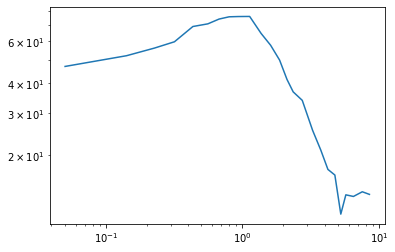

In [35]:
SNrange = np.arange(2,28) +0.5
numBins = 5
binRange = [[3.6,4.6],[3.6,4.6],[3.6,4.6],[3.6,4.6],[3.6,4.6],
            [3.6,4.6],[3.6,4.6],[3.6,4.6],[3.6,4.6],[3.6,4.6],
            [3.6,4.6],[3.6,4.6],[3.6,4.6],[3.6,4.6],[3.6,4.6],
            [3.6,4.6],[3.6,4.6],[3.6,4.6],[3.6,4.6],[3.6,4.6],
            [3.6,4.6],[3.6,4.6],[3.6,4.6],[3.6,4.6],[3.6,4.6],
            [3.6,4.6],[3.6,4.6],]
# binRange = [[6,7], [5.8,7.4], [5.5,7], [5.5,6.8], [5.5,7]]
Kappas = []


ylab = 'SMARvsDMAR'
ER.RedshiftBinning( xPlotting, ylab, SNrange, numBins, binRange, AverageSnapshot = True, loggedBins = True, loggedValues = False)

axes[0].axvspan(criticalRange[0],criticalRange[1],  alpha = 0.3, color= 'black')
axes[0].axvline(np.mean(criticalRange),color='black',linestyle='--')

for SN in SNrange:
    x = ER.binStorage['{}| avTh vs {}| SMARvsDMAR'.format(SN,SN)]['binCenters']
    y = ER.binStorage['{}| avTh vs {}| SMARvsDMAR'.format(SN,SN)]['Median']

    
    
    pOpt , pCov = curve_fit(testModel, x, y)
    K = pOpt[0]/ER.OmegaB
    print("Kappa Value: {}".format(K))
    Kappas.append(K)

x = np.flip(np.unique(ER.Storage['Z']))
x = [(x[i+1] + x[i])/2 for i in range(len(x)-1)]
plt.plot(x[1:],Kappas[1:])
print('Average Kappa: {}'.format(np.mean(Kappas)))

plt.xscale('log')
plt.yscale('log')

### Calculating Medians

In [71]:
[(temp['BHM'][i+1] - temp['BHM'][i] + 1) / abs(temp['AoU'][i+1] - temp['AoU'][i]) for i in range(len(temp['BHM'])-1)] )

6.5243771010171745


### Considering All Galaxies

In [12]:
# Firstly define the mask to only select central galaxies 
AllIDs = np.unique( eagle.dataStorage['QPgalaxiesAll']['TopLeafID'] )
# AllIDs = [1385495]

# Defining Critical Values
eF = 0.15
eR = 0.1
Vagn = np.sqrt( ( 2 * eR * eF * (3e8)**2 ) / (1 - eR) )
Vcrit = 10**2
Tcrit = np.log10(( 3.6 *(1e5) ) * (Vcrit / 100)**2 )

# Calculating Values for all galaxies
eagle.dataStorage['SatelliteGalaxies'] = {}

for ID in AllIDs:
    mask = eagle.dataStorage['QPgalaxiesAll']['TopLeafID'] == ID
    temp = {}
    temp['BHM'] = np.array( eagle.dataStorage['QPgalaxiesAll']['sgBHM'][mask] )
    temp['Redshift'] = np.array( eagle.dataStorage['QPgalaxiesAll']['Z'][mask] )
    temp['HM'] = np.array( eagle.dataStorage['QPgalaxiesAll']['DMmass'][mask] )
    temp['SFR'] = np.array( eagle.dataStorage['QPgalaxiesAll']['SFR'][mask] )
    temp['SubNum'] = np.array( eagle.dataStorage['QPgalaxiesAll']['SubNum'][mask] )
    temp['SM'] = np.array( eagle.dataStorage['QPgalaxiesAll']['SM'][mask] )
    temp['Vmax'] = np.array( eagle.dataStorage['QPgalaxiesAll']['Vmax'][mask] )
    temp['AgeOfUniverse'] = np.array( eagle.dataStorage['QPgalaxiesAll']['AgeOfUniverse'][mask] )
    

    temp['BHAR'] = np.array( [(temp['BHM'][i+1] - temp['BHM'][i]) / abs(temp['Redshift'][i+1] - temp['Redshift'][i]) for i in range(len(temp['BHM'])-1)] )
    temp['DMAR'] = np.array( [(temp['HM'][i+1] - temp['HM'][i] ) / abs(temp['Redshift'][i+1] - temp['Redshift'][i]) for i in range(len(temp['HM'])-1)] )
    temp['avVmax'] = np.array([(temp['Vmax'][i+1] + temp['Vmax'][i])/2 for i in range(len(temp['Vmax']) -1)])
    temp['Vtemp'] = np.array(  ( 3.6 *(1e5) ) * (eagle.dataStorage['QPgalaxiesAll']['Vmax'][mask]/100)**2 ) 
    temp['AvVtemp'] = np.array( [(temp['Vtemp'][i+1] + temp['Vtemp'][i])/2 for i in range(len(temp['Vtemp']) -1)] )
    temp['BHARvsDMAR'] = np.array( (temp['BHAR'] * Vagn**2) / (temp['DMAR'] * temp['avVmax']**2) )
    temp['sSFR'] = temp['SFR'] / temp['SM']
    
    temp['maskBHratio'] = temp['BHM'] > 0
    temp['ratioBH'] = np.array( [1] + [(temp['BHM'][temp['maskBHratio']][i+1] / (temp['BHM'][temp['maskBHratio']][i] + 1) / abs(temp['Redshift'][temp['maskBHratio']][i+1] - temp['Redshift'][temp['maskBHratio']][i]) ) for i in range(len(temp['BHM'][temp['maskBHratio']]) - 1)] )
    temp['ratioZ'] = temp['Redshift'][temp['maskBHratio']]
    temp['ratioTemp'] = temp['Vtemp'][temp['maskBHratio']]
    temp['ratioHM'] = np.array([1] + [(temp['HM'][i+1] / (temp['HM'][i] + 1) / abs(temp['Redshift'][i+1] - temp['Redshift'][i]) ) for i in range(len(temp['HM']) - 1)])[temp['maskBHratio']]
    temp['ratioVmax'] = temp['Vmax'][temp['maskBHratio']]
    temp['ratioBHARvsDMAR'] = np.array( (temp['ratioBH'] * Vagn**2) / (temp['ratioHM'] * temp['ratioVmax']**2) )
    
    eagle.dataStorage['SatelliteGalaxies'][ID] = temp
    
del temp, ID

def ValueAveraging(x):
    temp = []
    for i in range(len(x)):
        if i == 0:
            temp.append((x[i]+x[i+1])/2)
        elif i == (len(x)-1):
            temp.append((x[i-1]+x[i])/2)
        else:
            temp.append((x[i-1]+x[i]+x[i+1])/3)
    return np.array(temp)
        
# print(eagle.dataStorage['SatelliteGalaxies'][1385495]['BHM'] ) 
# print(eagle.dataStorage['SatelliteGalaxies'][1385495]['ratioBH'] ) 

<ipython-input-12-d7e184ec243d>:34: RuntimeWarning: invalid value encountered in true_divide
  temp['sSFR'] = temp['SFR'] / temp['SM']
<ipython-input-12-d7e184ec243d>:34: RuntimeWarning: divide by zero encountered in true_divide
  temp['sSFR'] = temp['SFR'] / temp['SM']
<ipython-input-12-d7e184ec243d>:42: RuntimeWarning: divide by zero encountered in true_divide
  temp['ratioBHARvsDMAR'] = np.array( (temp['ratioBH'] * Vagn**2) / (temp['ratioHM'] * temp['ratioVmax']**2) )
<ipython-input-12-d7e184ec243d>:33: RuntimeWarning: invalid value encountered in true_divide
  temp['BHARvsDMAR'] = np.array( (temp['BHAR'] * Vagn**2) / (temp['DMAR'] * temp['avVmax']**2) )


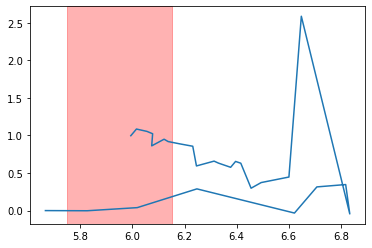

<ipython-input-231-29bd47535fa4>:10: RuntimeWarning: divide by zero encountered in log10
  y = np.log10( eagle.dataStorage['SatelliteGalaxies'][ID]['BHM'] )


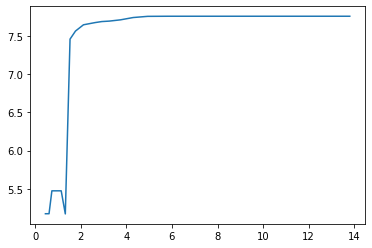

In [231]:
ID = AllIDs[13]

x = np.log10( eagle.dataStorage['SatelliteGalaxies'][ID]['ratioTemp'] )
y = np.log10( eagle.dataStorage['SatelliteGalaxies'][ID]['ratioBH'] )
plt.plot(x,y)
plt.axvspan(5.75,6.15,  alpha = 0.3, color= 'red')
plt.show()

x = ( eagle.dataStorage['SatelliteGalaxies'][ID]['AgeOfUniverse'] )
y = np.log10( eagle.dataStorage['SatelliteGalaxies'][ID]['AgeOfUniverse'] )
plt.plot(x,y)
plt.show()

<ipython-input-237-2a1ccb0d1a9d>:11: RuntimeWarning: divide by zero encountered in log10
  y = np.log10( eagle.dataStorage['SatelliteGalaxies'][ID]['BHARvsDMAR'] )
<ipython-input-237-2a1ccb0d1a9d>:11: RuntimeWarning: invalid value encountered in log10
  y = np.log10( eagle.dataStorage['SatelliteGalaxies'][ID]['BHARvsDMAR'] )


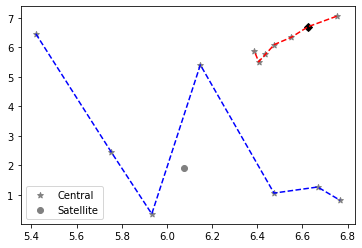

In [237]:
# Range of which Galaxies to Plot
n1, n2 = 13, 14
SFRcritical = 5e-10
BHMpreCrit, BHMpostCrit = 1e6, 1e7


for i, ID in enumerate(AllIDs[n1:n2]):
#     x = np.log10( eagle.dataStorage['SatelliteGalaxies'][ID]['ratioTemp'] )
#     y = np.log10( eagle.dataStorage['SatelliteGalaxies'][ID]['ratioBHARvsDMAR'] )
    x = np.log10( eagle.dataStorage['SatelliteGalaxies'][ID]['AvVtemp'] )
    y = np.log10( eagle.dataStorage['SatelliteGalaxies'][ID]['BHARvsDMAR'] )
    
#     y = ValueAveraging(y)
    
    # Selecting onset of Exponentital Growth
#     maskPreExponential = (eagle.dataStorage['SatelliteGalaxies'][ID]['BHM'][eagle.dataStorage['SatelliteGalaxies'][ID]['maskBHratio']] < BHMpreCrit)
#     maskPostExponential = (eagle.dataStorage['SatelliteGalaxies'][ID]['BHM'][eagle.dataStorage['SatelliteGalaxies'][ID]['maskBHratio']] > BHMpostCrit)
    maskPreExponential = (eagle.dataStorage['SatelliteGalaxies'][ID]['BHM'] < BHMpreCrit)[1:]
    maskPostExponential = (eagle.dataStorage['SatelliteGalaxies'][ID]['BHM'] > BHMpostCrit)[:-1]
    plt.plot(x[maskPreExponential][-1],y[maskPreExponential][-1], marker = 'D', color = 'black')
    plt.plot(x[maskPostExponential][0],y[maskPostExponential][0], marker = 'D', color = 'black')
    
    
    #Selecting on Star Formation Rate
    maskSFR = (eagle.dataStorage['SatelliteGalaxies'][ID]['sSFR'] < SFRcritical)[1:]
    plt.plot(x[maskSFR],y[maskSFR], linestyle = '--', color= 'red')
    plt.plot(x[~maskSFR],y[~maskSFR], linestyle = '--', color= 'blue')
    
    # Plotting the Data as symbols for Central and Satellite Galaxies
    maskSatellite = (eagle.dataStorage['SatelliteGalaxies'][ID]['SubNum'] == 0)[1:]
    if i == 0:
        plt.scatter(x[maskSatellite],y[maskSatellite], marker= '*', color= 'gray', label = 'Central') 
        plt.scatter(x[~maskSatellite], y[~maskSatellite], marker= 'o', color= 'gray', label = 'Satellite')
    else:
        plt.scatter(x[maskSatellite],y[maskSatellite], marker= '*', color= 'gray') 
        plt.scatter(x[~maskSatellite], y[~maskSatellite], marker= 'o', color= 'gray')
        
plt.legend()
plt.show()

del maskSatellite, x, y, maskPreExponential, maskPostExponential

In [107]:
# eagle.dataStorage['QPgalaxiesAll'][ eagle.dataStorage['QPgalaxiesAll']['TopLeafID'] == 1385495]

print(DMAR , '\n' , eagle.dataStorage['SatelliteGalaxies'][1385495]['DMAR'])

[2.96363034e+09 6.75170304e+09 1.34184755e+10 1.43385108e+10
 3.15914854e+10 4.36705812e+10 3.80325560e+10 2.46756987e+10
 7.70307031e+10 1.35419601e+11 9.69747251e+10 1.37869738e+11
 1.01659288e+11 5.80079084e+10 6.65247386e+09 7.91460905e+10
 6.35702608e+11 2.00123646e+11 5.67462461e+10 2.90879209e+11
 3.28427831e+11 1.04032594e+12 2.49996870e+11 5.34842900e+11
 2.20193964e+11 1.18483919e+11 4.10484834e+11] 
 [ 2.96363034e+09  6.75170304e+09  1.34184755e+10  1.43385108e+10
  3.15914854e+10  4.36705812e+10  3.80325560e+10  2.46756987e+10
  7.70307031e+10  1.35419601e+11  9.69747251e+10  1.37869738e+11
  1.01659288e+11  5.80079084e+10  6.65247386e+09  7.91460905e+10
 -6.35702608e+11 -2.00123646e+11 -5.67462461e+10  2.90879209e+11
 -3.28427831e+11 -1.04032594e+12  2.49996870e+11 -5.34842900e+11
 -2.20193964e+11 -1.18483919e+11 -4.10484834e+11]


In [86]:
print( eagle.dataStorage['SatelliteGalaxies'][1385495]

[ 46.558167  96.501595 119.50893  130.09329  130.32343  180.3908
 182.59285  175.66318  183.84471  202.44888  245.41446  263.15536
 234.04063  224.29501  213.74785  207.56853  207.88675  203.15704
 200.04056  196.61105  196.63103  195.73758  187.5807   183.01315
 175.02605  173.31822  168.70468  155.53726 ]


## Old Code

10578135


<ipython-input-14-ca3922bedbf6>:16: RuntimeWarning: invalid value encountered in true_divide
  BHAR = np.array( [abs(BHM[i+1] - BHM[i]) / (abs(Time[i+1] - Time[i]) * ((BHM[i+1] + BHM[i])/2)) for i in range(len(BHM)-1)] )


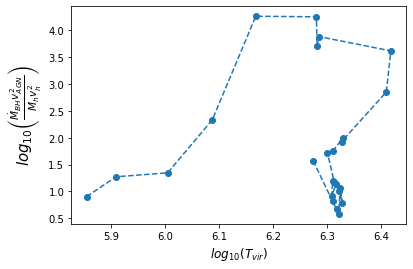

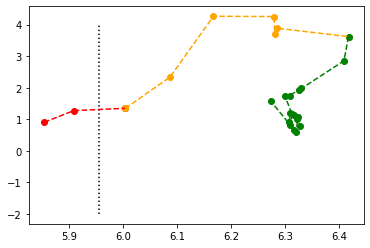

In [14]:
eF = 0.15
eR = 0.1
Vagn = np.sqrt( ( 2 * eR * eF * (3e8)**2 ) / (1 - eR) )
Vcrit = 10**2
Tcrit = np.log10(( 3.6 *(1e5) ) * (Vcrit / 100)**2 )

for TLID in ID[m1:m2]:
    print(TLID)
    mask = eagle.dataStorage['testGalaxies']['TopLeafID'] == TLID 
    
    BHM = eagle.dataStorage['testGalaxies']['sgBHM'][mask]
    Time = eagle.dataStorage['testGalaxies']['LookBackTime'][mask]
    HM = eagle.dataStorage['testGalaxies']['DMmass'][mask]
#     print(BHM)
    
    BHAR = np.array( [abs(BHM[i+1] - BHM[i]) / (abs(Time[i+1] - Time[i]) * ((BHM[i+1] + BHM[i])/2)) for i in range(len(BHM)-1)] )
    Times = [(Time[i+1] + Time[i])/2 for i in range(len(Time) -1)]
    
    HM = np.array( [(HM[i+1] + HM[i])/2 for i in range(len(HM) -1)] )
    
    Vmax = eagle.dataStorage['testGalaxies']['Vmax'][mask]
    Vmax = np.log10([(Vmax[i+1] + Vmax[i])/2 for i in range(len(Vmax) -1)])
    
    vTemp = np.log10( ( 3.6 *(1e5) ) * (eagle.dataStorage['testGalaxies']['Vmax'][mask]/100)**2 )
    Temp = [(vTemp[i+1] + vTemp[i])/2 for i in range(len(vTemp) -1)]
    Tcrit =  np.log10(( 3.6 *(1e5) ) * (10**2.2 / 100)**2 )

    # Defining Plotted Values
    y = np.log10(((BHAR * Vagn**2) / (HM * Vmax**2))[2:])
    x = Temp[2:]
#     print(x,y)
    
    
    # plt.scatter(Temp, np.log10(BHAR))
    plt.scatter(x,y)
    plt.plot(x, y, linestyle = '--')
    plt.xlabel(r'$log_{10}(T_{vir})$', fontsize= 12)
    plt.ylabel(r'$log_{10}\left(\frac{\dot{M}_{BH}v^2_{AGN}}{M_{h}v^2_h} \right)$', fontsize = 15)
    # plt.vlines(Tcrit, 5.5, 8.5)
    plt.show()

    
    # Neatened Up Version
    
    n1,n2 = 2,8
    colours = ['red', 'orange','green']
    
    x1 = x[0:n1+1]
    y1 = y[0:n1+1]
    
    x2 = x[n1:n2+1]
    y2 = y[n1:n2+1]
    
    x3 = x[n2:]
    y3 = y[n2:]
#     x3 = np.delete(x3, 14)
#     y3 = np.delete(y3,14)
    
    for col, data in zip(colours, [[x1,y1],[x2,y2],[x3,y3]]):   
        plt.scatter(data[0],data[1], color = col)
        plt.plot(data[0],data[1], color=col, linestyle = '--')
    plt.vlines(Tcrit,-2,4, linestyle = ':', color = 'black')    

## Specific Galaxies

### Quasar Phase Transition
In this section, we will analyse the evolution of the galaxies that have gone through the quasar phase transition

In [87]:
# Grabbing the largest mass galaxy and its progenitors
GalChoice = 20
# print(eagle.dataStorage['probeGalaxies']['TopLeafID'][GalChoice])
# ID = eagle.dataStorage['probeGalaxies']['TopLeafID'][GalChoice]

# Galaxies which have undergone the quasar phase
# TLIDs = [1385495,9501268,9539964]
TLIDs = [1385495]
# TLIDs = QPIDs[18:19]

MassiveIDs = [21379548]
# perfectValues = [1385495,]
# GoodValues = [17304626,]
# Perculiar = [13658, 14593779 ]

QPquery = 'SELECT \
        SH.SnapNum as SnapShot, \
        SH.Vmax as Vmax, \
        SH.TopLeafID as TopLeafID, \
        SH.Redshift as Z, \
        SH.MassType_DM as DMmass, \
        SH.BlackHoleMass as sgBHM, \
        SH.MassType_BH as pBHM, \
        SH.BlackHoleMassAccretionRate as iBMAR, \
        SH.VmaxRadius as VmaxR, \
        SH.SubGroupNumber as SubNum, \
        SH.StarFormationRate  as SFR, \
        SH.MassType_Star as SM \
    FROM \
        {}_SubHalo as SH \
    WHERE \
        SH.TopLeafID IN ({}) \
    ORDER BY \
        SH.SnapNum'.format(simulation,*TLIDs)

eagle.DatabaseQuery('QPexampleGalaxies', QPquery)
eagle.linkTimes('QPexampleGalaxies')

# eagle.dataStorage['QPexampleGalaxies']

18/02/2021 20:16:15 | Querying Database ... 
18/02/2021 20:16:19   |  Query Time: 3.17s
Sorting Data into Astropy Table ...
18/02/2021 20:16:19   |  Sort Time: 0.0s
Adding Time Data to QPexampleGalaxies ...


1385495


<ipython-input-112-d87bf2588263>:30: RuntimeWarning: invalid value encountered in log10
  y = np.log10(((BHAR * Vagn**2) / (DMAR * Vmax**2))[2:])


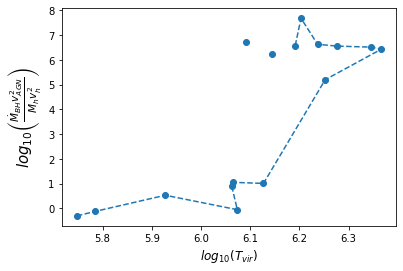

1385495
[          nan 6.2664798e-09 5.1054556e-09 4.9753566e-09 4.7968429e-09
 1.1378772e-08 5.5654970e-09 3.4549898e-09 2.6745293e-09 2.4984381e-09
 2.8874136e-09 1.2599713e-09 4.0591716e-10 3.0979261e-10 2.1085154e-10
 2.0949510e-10 1.7107112e-10 1.5402374e-10 1.0597217e-10 8.1034429e-11
 6.7515382e-11 5.4537732e-11 2.4498356e-11 6.2123123e-12 0.0000000e+00
 0.0000000e+00 1.9560779e-12 0.0000000e+00]
  sgBHM   
----------
       0.0
       0.0
 149334.38
  149334.4
 149334.47
 149335.39
  149335.6
 149337.06
  149338.7
 149343.56
       ...
13870284.0
14932114.0
16096238.0
16927942.0
18337380.0
18986868.0
21004490.0
21135646.0
21135670.0
21303526.0
21634088.0
Length = 28 rows


<ipython-input-112-d87bf2588263>:70: RuntimeWarning: invalid value encountered in true_divide
  sSFR = np.array( SFR / SM )
<ipython-input-112-d87bf2588263>:74: RuntimeWarning: divide by zero encountered in log10
  yt = np.log10(((BHAR * Vagn**2) / (DMAR * Vmax**2)))


TypeError: only integer scalar arrays can be converted to a scalar index

In [112]:
eF = 0.15
eR = 0.1
Vagn = np.sqrt( ( 2 * eR * eF * (3e8)**2 ) / (1 - eR) )
Vcrit = 10**2
Tcrit = np.log10(( 3.6 *(1e5) ) * (Vcrit / 100)**2 )

for TLID in TLIDs:
    print(TLID)
    mask = eagle.dataStorage['QPexampleGalaxies']['TopLeafID'] == TLID 
    
    BHM = eagle.dataStorage['QPexampleGalaxies']['sgBHM'][mask]
    Time = eagle.dataStorage['QPexampleGalaxies']['Z'][mask]
    HM = eagle.dataStorage['QPexampleGalaxies']['DMmass'][mask]
#     print(BHM)
    
    BHAR = np.array( [abs(BHM[i+1] - BHM[i]) / abs(Time[i+1] - Time[i]) for i in range(len(BHM)-1)] )
    Times = [(Time[i+1] + Time[i])/2 for i in range(len(Time) -1)]
    
    DMmass = np.array( [(HM[i+1] + HM[i])/2 for i in range(len(HM) -1)] )
    DMAR = np.array( [(HM[i+1] - HM[i]) / abs(Time[i+1] - Time[i]) for i in range(len(HM)-1)] )
    
    Vmax = eagle.dataStorage['QPexampleGalaxies']['Vmax'][mask]
    Vmax = np.array([(Vmax[i+1] + Vmax[i])/2 for i in range(len(Vmax) -1)])
   
    vTemp = np.log10( ( 3.6 *(1e5) ) * (eagle.dataStorage['QPexampleGalaxies']['Vmax'][mask]/100)**2 )
    Temp = [(vTemp[i+1] + vTemp[i])/2 for i in range(len(vTemp) -1)]
    Tcrit =  np.log10(( 3.6 *(1e5) ) * (10**2.2 / 100)**2 )

    # Defining Plotted Values
    y = np.log10(((BHAR * Vagn**2) / (DMAR * Vmax**2))[2:])
    x = Temp[2:]
#     print(x,y)
    
    
    # plt.scatter(Temp, np.log10(BHAR))
    plt.scatter(x,y)
    plt.plot(x, y, linestyle = '--')
    plt.xlabel(r'$log_{10}(T_{vir})$', fontsize= 12)
    plt.ylabel(r'$log_{10}\left(\frac{\dot{M}_{BH}v^2_{AGN}}{M_{h}v^2_h} \right)$', fontsize = 15)
    # plt.vlines(Tcrit, 5.5, 8.5)
plt.show()

for TLID in TLIDs:
    print(TLID)
    mask = eagle.dataStorage['QPexampleGalaxies']['TopLeafID'] == TLID 
    
    
    BHM = eagle.dataStorage['QPexampleGalaxies']['sgBHM'][mask]
    Time = eagle.dataStorage['QPexampleGalaxies']['Z'][mask]
    HM = eagle.dataStorage['QPexampleGalaxies']['DMmass'][mask]
    SubNum = eagle.dataStorage['QPexampleGalaxies']['SubNum'][mask]
    SFR = eagle.dataStorage['QPexampleGalaxies']['SFR'][mask]
    SM = eagle.dataStorage['QPexampleGalaxies']['SM'][mask]
#     print(BHM)
    
    BHAR = np.array( [(BHM[i+1] - BHM[i]) / abs(Time[i+1] - Time[i]) for i in range(len(BHM)-1)] )
    Times = [(Time[i+1] + Time[i])/2 for i in range(len(Time) -1)]
    
    DMmass = np.array( [(HM[i+1] + HM[i])/2 for i in range(len(HM) -1)] )
    DMAR = np.array( [abs(HM[i+1] - HM[i]) / abs(Time[i+1] - Time[i]) for i in range(len(HM)-1)] )
    
    Vmax = eagle.dataStorage['QPexampleGalaxies']['Vmax'][mask]
    Vmax = np.array([(Vmax[i+1] + Vmax[i])/2 for i in range(len(Vmax) -1)])
   
    vTemp = np.log10( ( 3.6 *(1e5) ) * (eagle.dataStorage['QPexampleGalaxies']['Vmax'][mask]/100)**2 )
    Temp = np.array([(vTemp[i+1] + vTemp[i])/2 for i in range(len(vTemp) -1)])
    Tcrit =  np.log10(( 3.6 *(1e5) ) * (10**2.2 / 100)**2 )
    
    
    sSFR = np.array( SFR / SM )
    print(sSFR)
    
    # Defining Plotted Values
    yt = np.log10(((BHAR * Vagn**2) / (DMAR * Vmax**2)))
    xt = Temp
    
    # Neatened Up Version
    n1,n2 = 6,17
    
    colours = ['red', 'orange','green']
    
    
    
#     x1 = x[0:n1+1]
#     y1 = y[0:n1+1]
    
#     x2 = x[n1:n2+1]
#     y2 = y[n1:n2+1]
    
#     x3 = x[n2:]
#     y3 = y[n2:]
    
    
    
#     x2 = np.delete(x2,5)
#     y2 = np.delete(y2,5)
    
#     for col, data in zip(colours, [[x1,y1],[x2,y2],[x3,y3]]):   
#         plt.scatter(data[0],data[1], color = col)
#         plt.plot(data[0],data[1], color=col, linestyle = '--')
# #     plt.vlines(Tcrit,0,11, linestyle = ':', color = 'black')
#     plt.xlabel(r'$log_{10}(T_{vir})$', fontsize= 12)
#     plt.ylabel(r'$log_{10}\left(\frac{\dot{M}_{BH}v^2_{AGN}}{\dot{M}_{h}v^2_h} \right)$', fontsize = 15)
    
    
    #Selecting Satllite from Central Galaxies
    mask = (SubNum == 0)[1:]
    print(BHM)
    
    
    plt.scatter(x[mask],y[mask], marker= '*', color= 'red', label = 'Central')
#     plt.plot(x[mask],y[mask], linestyle = '--', marker = '*', color= 'red', label = 'Central')
    
    plt.scatter(x[~mask], y[~mask], marker= 'o', color= 'blue', label = 'Satellite')
#     plt.plot(x[~mask],y[~mask], linestyle = '--', marker = 'o', color= 'blue', label = 'Satellite')
    
    
    # Selecting on Black Hole Mass
    #Selecting onset of Exponentital Growth
    mask2 = (BHM < 1e6)[1:]
    plt.plot(x[mask2][-1],y[mask2][-1], marker = 'D', color = 'black')
    mask2 = (BHM > 1e7)[:-1]
    plt.plot(x[mask2][0],y[mask2][0], marker = 'D', color = 'black')
    
    
    #Selecting on Star Formation Rate
    SFRmin = 5e-10
    mask3 = (sSFR < SFRmin)[1:]
    
    plt.plot(x[mask3],y[mask3], linestyle = '--', color= 'red')
    plt.plot(x[~mask3],y[~mask3], linestyle = '--', color= 'blue')

plt.legend()
plt.show()
    
#Black Hole Mass for Comparison

for TLID in TLIDs:
    print(TLID)
    mask = eagle.dataStorage['QPexampleGalaxies']['TopLeafID'] == TLID    
    
    BHM = eagle.dataStorage['QPexampleGalaxies']['sgBHM'][mask]
    HM = eagle.dataStorage['QPexampleGalaxies']['DMmass'][mask]
    Time = eagle.dataStorage['QPexampleGalaxies']['Z'][mask]
    vTemp = ( ( 3.6 *(1e5) ) * (eagle.dataStorage['QPexampleGalaxies']['Vmax'][mask]/100)**2 ) 
    SubNum = eagle.dataStorage['QPexampleGalaxies']['SubNum'][mask]
    
    
#     x = np.log10(HM)
    x = np.log10(vTemp)
    y = SubNum
    
    x1 = x[0:n1+1]
    y1 = y[0:n1+1]
    
    x2 = x[n1:n2+1]
    y2 = y[n1:n2+1]
    
    x3 = x[n2:]
    y3 = y[n2:]
    
  
    
#     print(x,y)
    for col, data in zip(colours, [[x1,y1],[x2,y2],[x3,y3]]):   
        plt.scatter(data[0],data[1], color = col)
        plt.plot(data[0],data[1], color=col, linestyle = '--')
    plt.xlabel(r'$log_{10}(M_{DM})$', fontsize= 12)
    plt.ylabel(r'$log_{10}(M_{BH})$', fontsize = 12)
    
    
plt.show()

print(BHM)

### Non Quasar Phase Galaxies
In this section we look to compare their evolution to those galaxies which have not undergone a quasar phase transition

In [ ]:
# Grabbing the largest mass galaxy and its progenitors
GalChoice = 20
# print(eagle.dataStorage['probeGalaxies']['TopLeafID'][GalChoice])
# ID = eagle.dataStorage['probeGalaxies']['TopLeafID'][GalChoice]

# Galaxies which have undergone the quasar phase
TLIDs = [9145701,9156729]
# TLIDs = []

MassiveIDs = [21379548]
# perfectValues = [1385495,]
# GoodValues = [17304626,]
# Perculiar = [13658, 14593779 ]

query = 'SELECT \
        SH.SnapNum as SnapShot, \
        SH.Vmax as Vmax, \
        SH.TopLeafID as TopLeafID, \
        SH.Redshift as Z, \
        SH.MassType_DM as DMmass, \
        SH.BlackHoleMass as sgBHM, \
        SH.MassType_BH as pBHM, \
        SH.BlackHoleMassAccretionRate as iBMAR, \
        SH.VmaxRadius as VmaxR \
    FROM \
        {}_SubHalo as SH \
    WHERE \
        SH.TopLeafID IN ({},{}) \
    ORDER BY \
        SH.SnapNum'.format(simulation,*TLIDs)

eagle.DatabaseQuery('exampleGalaxies', query)
eagle.linkTimes('exampleGalaxies')

eagle.dataStorage['exampleGalaxies']

In [ ]:
eF = 0.15
eR = 0.1
Vagn = np.sqrt( ( 2 * eR * eF * (3e8)**2 ) / (1 - eR) )
Vcrit = 10**2
Tcrit = np.log10(( 3.6 *(1e5) ) * (Vcrit / 100)**2 )

for TLID in TLIDs:
    print(TLID)
    mask = eagle.dataStorage['exampleGalaxies']['TopLeafID'] == TLID 
    
    BHM = eagle.dataStorage['exampleGalaxies']['sgBHM'][mask]
    Time = eagle.dataStorage['exampleGalaxies']['Z'][mask]
    HM = eagle.dataStorage['exampleGalaxies']['DMmass'][mask]
#     print(BHM)
    
    BHAR = np.array( [abs(BHM[i+1] - BHM[i]) / abs(Time[i+1] - Time[i]) for i in range(len(BHM)-1)] )
    Times = [(Time[i+1] + Time[i])/2 for i in range(len(Time) -1)]
    
    DMmass = np.array( [(HM[i+1] + HM[i])/2 for i in range(len(HM) -1)] )
    DMAR = np.array( [abs(HM[i+1] - HM[i]) / abs(Time[i+1] - Time[i]) for i in range(len(HM)-1)] )
    
    Vmax = eagle.dataStorage['exampleGalaxies']['Vmax'][mask]
    Vmax = np.array([(Vmax[i+1] + Vmax[i])/2 for i in range(len(Vmax) -1)])
   
    vTemp = np.log10( ( 3.6 *(1e5) ) * (eagle.dataStorage['exampleGalaxies']['Vmax'][mask]/100)**2 )
    Temp = [(vTemp[i+1] + vTemp[i])/2 for i in range(len(vTemp) -1)]
    Tcrit =  np.log10(( 3.6 *(1e5) ) * (10**2.2 / 100)**2 )

    # Defining Plotted Values
    y = np.log10(((BHAR * Vagn**2) / (DMAR * Vmax**2))[2:])
    x = Temp[2:]
#     print(x,y)
    
    
    # plt.scatter(Temp, np.log10(BHAR))
    plt.scatter(x,y)
    plt.plot(x, y, linestyle = '--')
    plt.xlabel(r'$log_{10}(T_{vir})$', fontsize= 12)
    plt.ylabel(r'$log_{10}\left(\frac{\dot{M}_{BH}v^2_{AGN}}{M_{h}v^2_h} \right)$', fontsize = 15)
    # plt.vlines(Tcrit, 5.5, 8.5)
plt.show()

for TLID in TLIDs:
    print(TLID)
    mask = eagle.dataStorage['exampleGalaxies']['TopLeafID'] == TLID 
    
    
    BHM = eagle.dataStorage['exampleGalaxies']['sgBHM'][mask]
    Time = eagle.dataStorage['exampleGalaxies']['Z'][mask]
    HM = eagle.dataStorage['exampleGalaxies']['DMmass'][mask]
#     print(BHM)
    
    BHAR = np.array( [abs(BHM[i+1] - BHM[i]) / abs(Time[i+1] - Time[i]) for i in range(len(BHM)-1)] )
    Times = [(Time[i+1] + Time[i])/2 for i in range(len(Time) -1)]
    
    DMmass = np.array( [(HM[i+1] + HM[i])/2 for i in range(len(HM) -1)] )
    DMAR = np.array( [abs(HM[i+1] - HM[i]) / abs(Time[i+1] - Time[i]) for i in range(len(HM)-1)] )
    
    Vmax = eagle.dataStorage['exampleGalaxies']['Vmax'][mask]
    Vmax = np.array([(Vmax[i+1] + Vmax[i])/2 for i in range(len(Vmax) -1)])
   
    vTemp = np.log10( ( 3.6 *(1e5) ) * (eagle.dataStorage['exampleGalaxies']['Vmax'][mask]/100)**2 )
    Temp = [(vTemp[i+1] + vTemp[i])/2 for i in range(len(vTemp) -1)]
    Tcrit =  np.log10(( 3.6 *(1e5) ) * (10**2.2 / 100)**2 )

    # Defining Plotted Values
    y = np.log10(((BHAR * Vagn**2) / (DMAR * Vmax**2))[2:])
    x = Temp[2:]
    
    
    # Neatened Up Version
    
    n1,n2 = 6,12
    colours = ['red', 'orange','green']
    
    x1 = x[0:n1+1]
    y1 = y[0:n1+1]
    
    x2 = x[n1:n2+1]
    y2 = y[n1:n2+1]
    
    x3 = x[n2:]
    y3 = y[n2:]
    
#     x2 = np.delete(x2,5)
#     y2 = np.delete(y2,5)
    
    for col, data in zip(colours, [[x1,y1],[x2,y2],[x3,y3]]):   
        plt.scatter(data[0],data[1], color = col)
        plt.plot(data[0],data[1], color=col, linestyle = '--')
#     plt.vlines(Tcrit,0,11, linestyle = ':', color = 'black')
    plt.xlabel(r'$log_{10}(T_{vir})$', fontsize= 12)
    plt.ylabel(r'$log_{10}\left(\frac{\dot{M}_{BH}v^2_{AGN}}{\dot{M}_{h}v^2_h} \right)$', fontsize = 15)
    print(y2)
plt.show()
    
#Black Hole Mass for Comparison

for TLID in TLIDs:
    print(TLID)
    mask = eagle.dataStorage['exampleGalaxies']['TopLeafID'] == TLID    
    
    BHM = eagle.dataStorage['exampleGalaxies']['sgBHM'][mask]
    HM = eagle.dataStorage['exampleGalaxies']['DMmass'][mask]
    Time = eagle.dataStorage['exampleGalaxies']['Z'][mask]
    
    
#     x = np.log10(HM)
    x = np.log10(BHM)
    y = np.log10(HM)
    
    x1 = x[0:n1+1]
    y1 = y[0:n1+1]
    
    x2 = x[n1:n2+1]
    y2 = y[n1:n2+1]
    
    x3 = x[n2:]
    y3 = y[n2:]
    
  
    
#     print(x,y)
    for col, data in zip(colours, [[x1,y1],[x2,y2],[x3,y3]]):   
        plt.scatter(data[0],data[1], color = col)
        plt.plot(data[0],data[1], color=col, linestyle = '--')
    plt.xlabel(r'$log_{10}(M_{DM})$', fontsize= 12)
    plt.ylabel(r'$log_{10}(M_{BH})$', fontsize = 12)
    
    
plt.show()

In [ ]:
for TLID in TLIDs:
    print(TLID)
    mask = eagle.dataStorage['exampleGalaxies']['TopLeafID'] == TLID 
    
    BHM = eagle.dataStorage['exampleGalaxies']['sgBHM'][mask]
    Time = eagle.dataStorage['exampleGalaxies']['LookBackTime'][mask]
    HM = eagle.dataStorage['exampleGalaxies']['DMmass'][mask]
    Vmax = eagle.dataStorage['exampleGalaxies']['Vmax'][mask]
    vTemp = np.log10( ( 3.6 *(1e5) ) * (eagle.dataStorage['exampleGalaxies']['Vmax'][mask]/100)**2 )
    
    x = vTemp
    y = np.log10( BHM )
    
    
    plt.scatter(x,y)
    plt.plot(x,y,linestyle= '--')
    

In [ ]:
# Temporary Storage Of Code

# Query for Galaxies that do not enter the quasar phase
queryNonQPGal = 'SELECT TOP 1000\
        SH.SnapNum as SnapShot, \
        SH.TopLeafID, \
        SH.MassType_BH as pBHM, \
        SH.BlackHoleMass as sgBHM, \
        SH.Vmax as Vmax, \
        SH.Redshift as Z \
    FROM \
        {}_SubHalo as SH, \
        {}_SubHalo as Ref \
    WHERE \
        Ref.TopLeafID = SH.TopLeafID AND \
        Ref.Vmax < 200 AND \
        SH.SubGroupNumber = 0 AND \
        SH.SnapNum > 1 AND \
        SH.SnapNum < 8 AND \
        SH.BlackHoleMass > 0 \
    ORDER BY \
        Ref.BlackHoleMass '.format(simulation, simulation)


nonQPIDs = np.unique(eagle.dataStorage['nonQPgalaxies']['TopLeafID'])

# Star Formation Rate after Quasar Phase

I wish to use this section just to confirm the effect of quasar phase of a galaxy has on the star formation rate. 

## Importing Modules

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import eagleAnalysisTools as EAT

storageLocation = 'C:/Users/samue/Documents/University Work/Year 4/Quasars/DataStorage/haloDistributionFunction/'
simulation = "RefL0100N1504"
randomNumber = 1
size = 100

## Querying Galaxies

In [31]:
queryRefGal = 'SELECT TOP 1000\
        SH.SnapNum as SnapShot, \
        SH.TopLeafID, \
        SH.MassType_BH as pBHM, \
        SH.BlackHoleMass as sgBHM, \
        SH.Vmax as Vmax, \
        SH.Redshift as Z, \
        SH.StarFormationRate as SFR \
    FROM \
        {}_SubHalo as SH, \
        {}_SubHalo as Ref \
    WHERE \
        Ref.TopLeafID = SH.TopLeafID AND \
        Ref.Vmax > 200 AND \
        SH.SubGroupNumber = 0 AND \
        SH.SnapNum > 1 AND \
        SH.SnapNum < 8 AND \
        SH.BlackHoleMass > 0 \
    ORDER BY \
        Ref.BlackHoleMass '.format(simulation, simulation)

eagle = EAT.eagleData(randomNumber, simulation, storageLocation)
eagle.DatabaseQuery('galaxies', queryRefGal)
eagle.linkTimes('galaxies')
# eagle.dataStorage['galaxies']

IDs = np.unique( eagle.dataStorage['galaxies']['TopLeafID'] )


ID = IDs[0:10] 

query = 'SELECT \
        SH.SnapNum as SnapShot, \
        SH.Vmax as Vmax, \
        SH.TopLeafID as TopLeafID, \
        SH.Redshift as Z, \
        SH.MassType_DM as DMmass, \
        SH.BlackHoleMass as sgBHM, \
        SH.MassType_BH as pBHM, \
        SH.BlackHoleMassAccretionRate as iBMAR, \
        SH.VmaxRadius as VmaxR, \
        SH.StarFormationRate as SFR, \
        SH.Image_face \
    FROM \
        {}_SubHalo as SH \
    WHERE \
        SH.TopLeafID IN ({},{},{},{},{},{},{},{},{},{}) \
    ORDER BY \
        SH.SnapNum'.format(simulation,*ID)

eagle.DatabaseQuery('testGalaxies', query)
eagle.linkTimes('testGalaxies')

eagle.dataStorage['testGalaxies']

16/02/2021 11:47:49 | Querying Database ... 
16/02/2021 11:47:50   |  Query Time: 1.15s
Sorting Data into Astropy Table ...
16/02/2021 11:47:50   |  Sort Time: 0.0s
Adding Time Data to galaxies ...
16/02/2021 11:47:50 | Querying Database ... 
16/02/2021 11:47:51   |  Query Time: 0.86s
Sorting Data into Astropy Table ...
16/02/2021 11:47:51   |  Sort Time: 0.0s
Adding Time Data to testGalaxies ...


SnapShot,Vmax,TopLeafID,Z,DMmass,sgBHM,pBHM,iBMAR,VmaxR,SFR,Image_face,LookBackTime,AgeOfUniverse,RedShift
int32,float32,int64,float32,float32,float32,float32,float32,float32,float32,bytes256,float64,float64,float64
1,23.67659,28,15.132311,339326600.0,0.0,0.0,0.0,2.4898877,0.0,,13.55123493,0.2477650699999998,15.1323108
1,29.575523,28877,15.132311,174510830.0,0.0,0.0,0.0,0.31267446,0.0,,13.55123493,0.2477650699999998,15.1323108
1,53.296146,13658,15.132311,775603650.0,0.0,0.0,0.0,0.8133375,0.002237632,,13.55123493,0.2477650699999998,15.1323108
1,61.70529,68793,15.132311,1376696600.0,0.0,0.0,0.0,0.78013647,0.12394449,,13.55123493,0.2477650699999998,15.1323108
1,27.668749,17833,15.132311,620482940.0,0.0,0.0,0.0,0.35725495,0.0,,13.55123493,0.2477650699999998,15.1323108
1,46.558167,1385495,15.132311,950114500.0,0.0,0.0,0.0,0.93342763,0.0,,13.55123493,0.2477650699999998,15.1323108
2,64.69166,3274741,9.993033,3509606700.0,0.0,0.0,0.0,1.7753165,0.1763394,,13.34299545,0.4560045499999994,9.99303373
2,79.41568,28877,9.993033,7988718000.0,0.0,0.0,0.0,3.0532558,0.049176138,,13.34299545,0.4560045499999994,9.99303373
2,104.010345,17833,9.993033,25168340000.0,0.0,0.0,0.0,4.953835,0.17306848,,13.34299545,0.4560045499999994,9.99303373


## Data Reduction

23327


<ipython-input-39-a89a14e9f205>:21: RuntimeWarning: divide by zero encountered in log10
  y = np.log10( SFR )


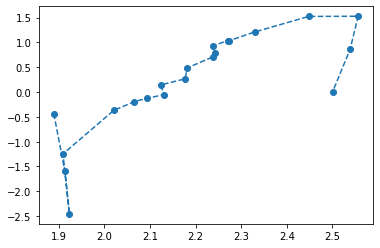

In [39]:
Tcrit =  np.log10(( 3.6 *(1e5) ) * (10**2.2 / 100)**2 )
Vcrit = 2.2

# Testing these plots
# x = ( 3.6 *(1e5) ) * (eagle.dataStorage['testGalaxies']['Vmax'] / 100)**2
m1 = 3
m2 = 4


for TLID in ID[m1:m2]:
    print(TLID)
    mask = eagle.dataStorage['testGalaxies']['TopLeafID'] == TLID
    
    # Assigning Variables
    Time = np.array( eagle.dataStorage['testGalaxies']['Z'][mask] )
    SFR =  np.array( eagle.dataStorage['testGalaxies']['SFR'][mask] )
    vMax = np.array( eagle.dataStorage['testGalaxies']['Vmax'][mask] ) 
    vTemp = ( 3.6 *(1e5) ) * (vMax / 100)**2
    
    x = np.log10(vMax)
    y = np.log10( SFR )
    
    # Plotting Variables
    plt.scatter(x,y)
    plt.plot(x,y, linestyle = '--')
    
plt.show()
    

# Test


In [3]:
import numpy as np
import matplotlib.pyplot as plt
import eagleAnalysisTools as EAT

storageLocation = 'C:/Users/samue/Documents/University Work/Year 4/Quasars/DataStorage/haloDistributionFunction/'
simulation = "RefL0100N1504"
randomNumber = 1
size = 100

In [2]:
query = 'SELECT TOP 10 \
        SH.SnapNum as SnapShot, \
        SH.GalaxyID, \
        SH.GroupID, \
        SH.TopLeafID, \
        SH.MassType_DM, \
        SH.BlackholeMass as BHM \
    FROM \
        {}_SubHalo as SH \
    WHERE \
        SH.Vmax > 200 AND \
        SH.SnapNum = 28'.format(simulation)


In [4]:
eagle = EAT.eagleData(randomNumber, simulation, storageLocation)
# eagle.DatabaseQuery('test', query)

In [4]:
eagle.dataStorage['test']

SnapShot,GalaxyID,GroupID,TopLeafID,MassType_DM,BHM
int32,int64,int64,int64,float32,float32
28,1,28000000000000,28,28144718000.0,0.0
28,13631,28000000000000,13658,39584874000.0,0.0
28,23301,28000000000000,23327,67099420000.0,30809586.0
28,26263,28000000000000,26289,54844875000.0,73755380.0
28,28850,28000000000000,28877,73207290000.0,23895220.0
28,122970,28000000000001,122995,53662080000.0,69344984.0
28,124303,28000000000001,124330,45237084000.0,154904320.0
28,130677,28000000000001,130703,50133086000.0,42524030.0
28,132808,28000000000001,132834,46400490000.0,461671.38


In [ ]:
queryFoF = 'SELECT \
        SH.GroupID, \
        SUM(SH.BlackHoleMass) as BHM, \
        SUM(SH.MassType_DM) as HM, \
        MAX(SH.Vmax) as Vmax, \
        SUM(SH.StarFormationRate) as SFR, \
        SUM(SH.MassType_Star) as SM \
    FROM \
        {}_SubHalo as SH \
    WHERE \
        SH.SubGroupNumber < 5 \
    GROUP BY \
        SH.GroupID'.format(simulation)

query = 'SELECT \
        SH.TopLeafID, \
        SH.GroupID, \
        SH.SubGroupNumber, \
        SH.SnapNum as SnapShot, \
        SH.Redshift as Z \
    FROM \
        {}_SubHalo as SH \
    WHERE \
        SH.TopLeafID = SH.TopLeafID AND \
        SH.Vmax > 200 AND \
        SH.SubGroupNumber = 0 AND \
        SH.SnapNum = 28 AND \
        SH.BlackHoleMass > 0'.format(simulation, simulation)



eagle.DatabaseQuery('FoF', queryFoF)
eagle.saveData('FoF')
eagle.DatabaseQuery('Galaxies', query)


25/02/2021 18:32:20 | Querying Database ... 


In [9]:
eagle.dataStorage['FoF']

GroupID,BHM,HM,Vmax,SFR,SM
int64,float64,float64,float32,float64,float64
28003600000202,0.0,1240965888.0,20.171919,0.0,0.0
28011200004235,0.0,882249280.0,17.668001,0.0,0.0
28010500006306,0.0,736823424.0,19.372133,0.0,0.0
28014000004857,0.0,688348288.0,13.897589,0.0,0.0
28017500002510,0.0,542922624.0,14.9614935,0.0,0.0
28024800005733,0.0,349021664.0,16.635298,0.0,0.0
28002100006093,0.0,5390445568.0,31.892918,0.0,3101187.25
28001600006629,0.0,7368235008.0,28.162876,0.0,0.0
28006900000784,0.0,1367001472.0,18.116768,0.0,0.0


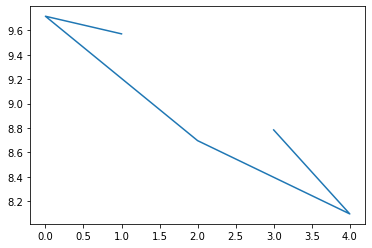

In [158]:
# np.log10(np.sum(eagle.dataStorage['test2']['BHM']))
mask = eagle.dataStorage['test2']['SubNum'] == 0
primaryBH = eagle.dataStorage['test2']['BHM'][mask]
totalBH = np.sum(eagle.dataStorage['test2']['BHM'])


x = eagle.dataStorage['test2']['SubNum']
y = np.log10( eagle.dataStorage['test2']['BHM'])

plt.plot(x,y)


# Detecting Black Hole Mergers

This section will attempt to automatically detect whether the black hole 

## $ M_{BH} = \frac{3}{5} \frac{\kappa \omega_b}{\alpha^{3/2}}\frac{v_h^5}{10H(z)Gv^2_{agn}} $


where $\kappa \approx \frac{5}{3}$ , $\alpha \approx 1$ , the value of H(z) will have to be obtained through the cosmological models in Colossus which after establishing the colossus.cosmology class and using the function Hz(self, redshift)

## Importing Relevant Modules

In [56]:
import numpy as np
import matplotlib.pyplot as plt
import eagleAnalysisTools as EAT
from colossus.cosmology import cosmology


storageLocation = 'C:/Users/samue/Documents/University Work/Year 4/Quasars/DataStorage/haloDistributionFunction/'
simulation = "RefL0100N1504"
randomNumber = 1
size = 100

## Importing Data from Accretion Rate Dependancy on Virial Temperature Section

In [57]:
# Querying all the galaxies that enter the quasar phase
queryQPGal = 'SELECT TOP 1000\
        SH.SnapNum as SnapShot, \
        SH.TopLeafID, \
        SH.MassType_BH as pBHM, \
        SH.BlackHoleMass as sgBHM, \
        SH.Vmax as Vmax, \
        SH.Redshift as Z, \
        SH.SubGroupNumber as  SubNum \
    FROM \
        {}_SubHalo as SH, \
        {}_SubHalo as Ref \
    WHERE \
        Ref.TopLeafID = SH.TopLeafID AND \
        Ref.Vmax > 200 AND \
        SH.SubGroupNumber = 0 AND \
        SH.SnapNum > 1 AND \
        SH.SnapNum < 8 AND \
        SH.BlackHoleMass > 0 \
    ORDER BY \
        Ref.BlackHoleMass '.format(simulation, simulation)

eagle = EAT.eagleData(randomNumber, simulation, storageLocation)

eagle.DatabaseQuery('QPgalaxies', queryQPGal)
eagle.linkTimes('QPgalaxies')

# Storing all te unique IDs that were queried
QPIDs = np.array( np.unique(eagle.dataStorage['QPgalaxies']['TopLeafID']) )

# Reformatting the recieved IDs
strQPIDs = ','.join([str(element) for element in QPIDs])

# Querying all the trees for the Quasar Phase IDs
queryQPGalTree = 'SELECT \
        SH.SnapNum as SnapShot, \
        SH.Vmax as Vmax, \
        SH.TopLeafID as TopLeafID, \
        SH.Redshift as Z, \
        SH.MassType_DM as DMmass, \
        SH.BlackHoleMass as sgBHM, \
        SH.MassType_BH as pBHM, \
        SH.BlackHoleMassAccretionRate as iBMAR, \
        SH.VmaxRadius as VmaxR, \
        SH.SubGroupNumber as SubNum, \
        SH.StarFormationRate  as SFR, \
        SH.MassType_Star as SM \
    FROM \
        {}_SubHalo as SH \
    WHERE \
        SH.TopLeafID IN ({}) \
    ORDER BY \
        SH.SnapNum'.format(simulation,strQPIDs)



eagle.DatabaseQuery('QPgalaxiesAll', queryQPGalTree)
eagle.linkTimes('QPgalaxiesAll')
       

09/03/2021 12:18:40 | Querying Database ... 
09/03/2021 12:18:48   |  Query Time: 7.94s
Sorting Data into Astropy Table ...
09/03/2021 12:18:48   |  Sort Time: 0.0s
Adding Time Data to QPgalaxies ...
09/03/2021 12:18:48 | Querying Database ... 
09/03/2021 12:19:09   |  Query Time: 21.51s
Sorting Data into Astropy Table ...
09/03/2021 12:19:09   |  Sort Time: 0.0s
Adding Time Data to QPgalaxiesAll ...


## Gathering Correct Values

In [58]:
# Defining a Function to Calculate Black Hole Mass
def BlackHoleMass(kappa, omega, alpha, H, virialH):
    G = 6.67e-11
    vAGNSq = (2 * 0.1 * 0.15 * (3e8)**2) / (1 - 0.1)
    const = (3./5.) * ((kappa * omega) / (alpha**(3./2)))
    temp = ( (virialH)**5 ) / ( 10 * H * G * vAGNSq )
    return const * temp

In [61]:
# Getting Relevant Redshift Values
Redshifts = np.array( eagle.timeData['Z'] )

# Getting Relevant Hubble Constants
cosmo = cosmology.setCosmology('planck18')
Hz = cosmo.Hz(Redshifts)

# Gathering Relevant Density Parameters
OmegaMass = cosmo.Om(Redshifts)
OmegaBaryon = cosmo.Ob(Redshifts)
OmegaRatio = OmegaBaryon / OmegaMass

print(OmegaMass, OmegaBaryon, OmegaRatio)

[0.99363291 0.99476132 0.99512796 0.9948703  0.99440293 0.99343378
 0.99148969 0.99008431 0.98830299 0.98519533 0.9810158  0.97543848
 0.96585644 0.94909962 0.93788641 0.92431733 0.90187939 0.87357768
 0.83847256 0.78391532 0.74524513 0.70225484 0.65534225 0.60517558
 0.53484886 0.48100499 0.42759173 0.37580974 0.3111    ] [0.15650277 0.1566805  0.15673825 0.15669767 0.15662406 0.15647141
 0.1561652  0.15594385 0.15566328 0.15517381 0.15451551 0.15363705
 0.15212782 0.14948853 0.14772239 0.14558518 0.14205108 0.1375934
 0.13206414 0.12347107 0.1173803  0.11060909 0.10322009 0.09531856
 0.0842417  0.07576099 0.0673481  0.05919215 0.049     ] [0.15750563 0.15750563 0.15750563 0.15750563 0.15750563 0.15750563
 0.15750563 0.15750563 0.15750563 0.15750563 0.15750563 0.15750563
 0.15750563 0.15750563 0.15750563 0.15750563 0.15750563 0.15750563
 0.15750563 0.15750563 0.15750563 0.15750563 0.15750563 0.15750563
 0.15750563 0.15750563 0.15750563 0.15750563 0.15750563]


## Testing Individual Galaxies
Calculating Values

In [31]:
# Firstly define the mask to only select central galaxies 
mask = (eagle.dataStorage['QPgalaxiesAll']['SubNum'] == 0) & (eagle.dataStorage['QPgalaxiesAll']['SnapShot'] == 28)
onlyCentralIDs = np.unique( eagle.dataStorage['QPgalaxiesAll']['TopLeafID'][mask] )
del mask

# Defining Critical Values
eF = 0.15
eR = 0.1
Vagn = np.sqrt( ( 2 * eR * eF * (3e8)**2 ) / (1 - eR) )
Vcrit = 10**2
Tcrit = np.log10(( 3.6 *(1e5) ) * (Vcrit / 100)**2 )

# Calculating Values for all galaxies
eagle.dataStorage['CentralGalaxies'] = {}

for ID in onlyCentralIDs:
    mask = (eagle.dataStorage['QPgalaxiesAll']['TopLeafID'] == ID) & (eagle.dataStorage['QPgalaxiesAll']['SnapShot'] > 1) 
    temp = {}
    temp['BHM'] = np.array( eagle.dataStorage['QPgalaxiesAll']['sgBHM'][mask] )
    temp['Redshift'] = np.array( eagle.dataStorage['QPgalaxiesAll']['Z'][mask] )
    temp['AoU'] = np.array( eagle.dataStorage['QPgalaxiesAll']['AgeOfUniverse'][mask] )
    temp['HM'] = np.array( eagle.dataStorage['QPgalaxiesAll']['DMmass'][mask] )
    temp['SFR'] = np.array( eagle.dataStorage['QPgalaxiesAll']['SFR'][mask] )
    temp['SubNum'] = np.array( eagle.dataStorage['QPgalaxiesAll']['SubNum'][mask] )
    temp['SM'] = np.array( eagle.dataStorage['QPgalaxiesAll']['SM'][mask] )
    temp['Vmax'] = np.array( eagle.dataStorage['QPgalaxiesAll']['Vmax'][mask] )
    temp['VmaxR'] =  np.array( eagle.dataStorage['QPgalaxiesAll']['VmaxR'][mask] )
    
    
    temp['BHAR'] = np.array( [(temp['BHM'][i+1] - temp['BHM'][i] + 1) / abs(temp['Redshift'][i+1] - temp['Redshift'][i]) for i in range(len(temp['BHM'])-1)] )
    temp['DMAR'] = np.array( [(temp['HM'][i+1] - temp['HM'][i] + 1) / abs(temp['Redshift'][i+1] - temp['Redshift'][i]) for i in range(len(temp['HM'])-1)] )
    temp['avVmax'] = np.array([(temp['Vmax'][i+1] + temp['Vmax'][i])/2 for i in range(len(temp['Vmax']) -1)])
    temp['avRedshift'] = np.array([(temp['Redshift'][i+1] + temp['Redshift'][i])/2 for i in range(len(temp['Redshift']) -1)])
    temp['avAoU'] = np.array([(temp['AoU'][i+1] + temp['AoU'][i])/2 for i in range(len(temp['AoU']) -1)])
    temp['Vtemp'] = np.array(  ( 3.6 *(1e5) ) * (eagle.dataStorage['QPgalaxiesAll']['Vmax'][mask]/100)**2 ) 
    temp['avVtemp'] = np.array( [(temp['Vtemp'][i+1] + temp['Vtemp'][i])/2 for i in range(len(temp['Vtemp']) -1)] )
    temp['BHARvsDMAR'] = np.array( abs((temp['BHAR'] * Vagn**2) / (temp['DMAR'] * temp['avVmax']**2) ))
    temp['sSFR'] = temp['SFR'] / temp['SM']
    temp['Hz'] = cosmo.Hz(temp['Redshift'])
    
    
    eagle.dataStorage['CentralGalaxies'][ID] = temp
    
del temp, ID

def ValueAveraging(x):
    temp = []
    for i in range(len(x)):
        if i == 0:
            temp.append((x[i]+x[i+1])/2)
        elif i == (len(x)-1):
            temp.append((x[i-1]+x[i])/2)
        else:
            temp.append((x[i-1]+x[i]+x[i+1])/3)
    return np.array(temp)
        
    
constantGrowthIDs = []
for ID in onlyCentralIDs:
    if len(np.unique(eagle.dataStorage['CentralGalaxies'][ID]['DMAR'] < 0)) == 1:
        constantGrowthIDs.append(ID)

<ipython-input-31-521574a63969>:38: RuntimeWarning: divide by zero encountered in true_divide
  temp['sSFR'] = temp['SFR'] / temp['SM']
<ipython-input-31-521574a63969>:38: RuntimeWarning: invalid value encountered in true_divide
  temp['sSFR'] = temp['SFR'] / temp['SM']


[0.0000000e+00 0.0000000e+00 0.0000000e+00 1.5550806e+05 1.5551225e+05
 1.5551895e+05 1.5553722e+05 1.5608395e+05 3.0627762e+05 9.2939262e+05
 1.1428629e+06 7.4939895e+06 1.2296629e+07 1.9097692e+07 3.6265728e+07
 8.5632056e+07 1.3324557e+08 1.4249730e+08 1.3684939e+08 1.3685296e+08
 1.3685381e+08 1.3685469e+08 1.3685587e+08 1.3685669e+08 1.3685694e+08
 1.3685706e+08 1.3685715e+08] [4.0425143e+00 4.4519000e+00 3.2734299e+01 5.7334702e+01 2.1744615e+02
 2.4981526e+02 2.2763132e+02 3.6032596e+02 4.0094304e+03 5.7120869e+03
 2.4345199e+04 6.4392434e+04 5.8259289e+04 1.1091717e+05 5.2475806e+05
 6.6919512e+05 3.9904841e+05 4.5202897e+05 3.7379231e+05 3.6383259e+05
 3.4966528e+05 2.7989072e+05 2.1729133e+05 1.7878944e+05 1.1533728e+05
 9.0779883e+04 6.3398258e+04]


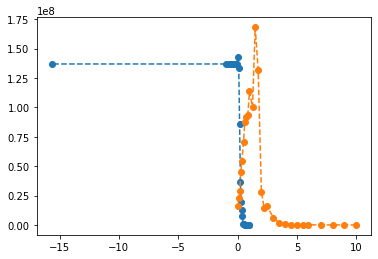

In [99]:
ID = onlyCentralIDs[0]

# x = np.log10( eagle.dataStorage['CentralGalaxies'][ID]['Vmax'] )
x = np.log10( eagle.dataStorage['CentralGalaxies'][ID]['Redshift'] )
y = ( eagle.dataStorage['CentralGalaxies'][ID]['BHM'] )

plt.plot(x,y, marker='o', linestyle = '--')

# Expected Value 
kgToSolarMass = 1. / 0.016
xTest = eagle.dataStorage['CentralGalaxies'][ID]['Redshift']
yTest = (kgToSolarMass * BlackHoleMass((5./3), OmegaRatio, 1, eagle.dataStorage['CentralGalaxies'][ID]['Hz'], eagle.dataStorage['CentralGalaxies'][ID]['Vmax'] ) )
const = 10**2.4
plt.plot( xTest , const * yTest, marker = 'o', linestyle = '--')

print(y, yTest)

## Trying an Averaging Approach

In [237]:
# Querying all the galaxies 
queryavQPGal = 'SELECT \
        SH.SnapNum as SnapShot, \
        SH.TopLeafID, \
        SH.MassType_BH as pBHM, \
        SH.BlackHoleMass as sgBHM, \
        SH.Vmax as Vmax, \
        SH.Redshift as Z \
    FROM \
        {}_SubHalo as SH \
    WHERE \
        SH.SubGroupNumber = 0 AND \
        SH.BlackHoleMass > 0'.format(simulation)
# Submitting Query to the Database
eagle.DatabaseQuery('avQPgalaxies', queryavQPGal)
eagle.linkTimes('avQPgalaxies')

24/02/2021 17:07:14 | Querying Database ... 
24/02/2021 17:08:09   |  Query Time: 55.63s
Sorting Data into Astropy Table ...
24/02/2021 17:08:10   |  Sort Time: 0.09s
Adding Time Data to avQPgalaxies ...


In [240]:
# Choosing which snapshots we want to consider
Redshifts = [0, 0.5, 1, 6]
SnapShots = [28, 25, 19, 6] 

#looping over each snapshot to organise the data for the analysis module
for SN in SnapShots:
    # Establishing a Title for the Dictionary
    title = 'avQPgalaxies{}'.format(SN)
    # Organising Relevant Properties into a dictionary
    mask = eagle.dataStorage['avQPgalaxies']['SnapShot'] == SN
    temp = {}
    temp['Vmax'] = eagle.dataStorage['avQPgalaxies']['Vmax'][mask]
    temp['BHM'] = eagle.dataStorage['avQPgalaxies']['sgBHM'][mask]
    eagle.dataStorage[title] = temp

# print(np.log10( eagle.dataStorage['avQPgalaxies28']['Vmax']))

# Conducting the Binning Analysis 
for SN in SnapShots:
    title = 'avQPgalaxies{}'.format(SN)
    # Setting the binning ranges 
    minimum = np.log10( min( eagle.dataStorage[title]['Vmax'] ) * (1 + 0.5) )
    maximum = np.log10( max( eagle.dataStorage[title]['Vmax'] ) * (1 - 0.5) )
    # Conducting the Binning
    eagle.binning(title,  8, 'Vmax', 'BHM', [minimum, maximum], loggedBins = True, loggedValues = True)

77912
0.5356613 3.0173755
80200
1.122117 2.9888577
82987
0.9752629 2.9627137
16271
1.2303507 2.7834334


dict_keys(['avQPgalaxies:Vmax vs sgBHM', 'avQPgalaxies28:Vmax vs BHM', 'avQPgalaxies25:Vmax vs BHM', 'avQPgalaxies19:Vmax vs BHM', 'avQPgalaxies6:Vmax vs BHM'])


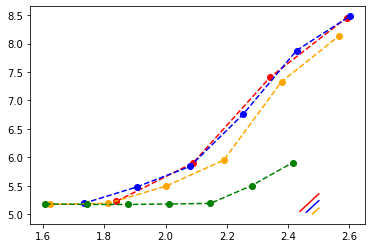

In [241]:
# eagle.binningStorage.keys()
colours = ['red', 'blue', 'orange', 'green']
print(eagle.binningStorage.keys())
for SN, Z, col in zip(SnapShots, Redshifts, colours):
    title = 'avQPgalaxies{}:Vmax vs BHM'.format(SN)
    x = eagle.binningStorage[title]['binCenters']
    y = eagle.binningStorage[title]['Median']
    mask = x > 1.6

    plt.plot(x[mask],y[mask], marker = 'o', linestyle = '--', color = col)
    
    kgToSolarMass = 1. / 0.016
    const = 0
    xTest = np.logspace(1.5,2.5, 50)
    yTest =  const + np.log10( kgToSolarMass * BlackHoleMass((5./3), OmegaRatio, 1, cosmo.Hz(Z), xTest) ) 
    maskTest = yTest > 5
    plt.plot(np.log10(xTest)[maskTest], yTest[maskTest], linestyle ='-', color = col)

plt.show()

# Duty Cycle

In this section to we are going to be considering two methods for which we can determine the duty cycle (the length of the exponetial growth phase of the black hole). This first of these methods will be by considering the duty cycle to be a constant value and the second that the duty cycle is a fraction of the Hubble Time.

# Star Formation Rate Variation

This Section is just to create some graphs for the project seminar of how the star foramtion rate varies with and without AGN feedback

## Importing Modules

In [40]:
import numpy as np
import matplotlib.pyplot as plt
import eagleAnalysisTools as EAT
from colossus.cosmology import cosmology

storageLocation = 'C:/Users/samue/Documents/University Work/Year 4/Quasars/DataStorage/haloDistributionFunction/'
simulationAGN = "RefL0050N0752"
simulationNoAGN = "NoAGNL0050N0752"
randomNumber = 1
size = 50

## Querying Database

In [93]:
def query(sim):
    q = 'SELECT \
        SH.TopLeafID, \
        SH.SnapNum as SnapShot, \
        SH.Redshift as Z, \
        SH.SubGroupNumber as SubNum, \
        SH.StarFormationRate as SFR, \
        SH.MassType_Star as SM, \
        SH.MassType_DM as HM, \
        SH.Vmax \
    FROM \
        {}_SubHalo as SH, \
        {}_SubHalo as Ref \
    WHERE \
        Ref.SnapNum = 28 AND \
        Ref.Vmax > 200 AND \
        Ref.SubGroupNumber = 0 AND \
        SH.TopLeafID = Ref.TopLeafID \
    ORDER BY \
        SH.Redshift'.format(sim,sim)
    return q

eagle = EAT.eagleData(randomNumber, 'sim', storageLocation)
# Querying Database
eagle.DatabaseQuery('AGNgalaxies', query(simulationAGN))
eagle.DatabaseQuery('NoAGNgalaxies', query(simulationNoAGN))
# Linking Times to Queried Data
eagle.linkTimes('AGNgalaxies')
eagle.linkTimes('NoAGNgalaxies')


26/02/2021 18:32:09 | Querying Database ... 
26/02/2021 18:32:10   |  Query Time: 0.63s
Sorting Data into Astropy Table ...
26/02/2021 18:32:10   |  Sort Time: 0.0s
26/02/2021 18:32:10 | Querying Database ... 
26/02/2021 18:32:11   |  Query Time: 0.7s
Sorting Data into Astropy Table ...
26/02/2021 18:32:11   |  Sort Time: 0.0s
Adding Time Data to AGNgalaxies ...
Adding Time Data to NoAGNgalaxies ...


In [107]:
# Firstly define the mask to only select central galaxies 
titles = ['AGNgalaxies', 'NoAGNgalaxies']
titles2 = ['AGN', 'NoAGN']
cosmo = cosmology.setCosmology('planck18')
AGNIDs = np.array( np.unique( eagle.dataStorage['AGNgalaxies']['TopLeafID'] ))
NoAGNIDs = np.array( np.unique( eagle.dataStorage['NoAGNgalaxies']['TopLeafID'] ))
AllIDs = [AGNIDs, NoAGNIDs]
G = 6.67e-11

for IDs, title, title2 in zip(AllIDs,titles,titles2):
    # Calculating Values for all galaxies
    eagle.dataStorage[title2] = {}

    for ID in IDs:
        mask = (eagle.dataStorage[title]['TopLeafID'] == ID)
        temp = {}
        temp['Redshift'] = np.array( eagle.dataStorage[title]['Z'][mask] )
        temp['AoU'] = np.array( eagle.dataStorage[title]['AgeOfUniverse'][mask] )
        temp['HM'] = np.array( eagle.dataStorage[title]['HM'][mask] )
        temp['SFR'] = np.array( eagle.dataStorage[title]['SFR'][mask] )
        temp['SM'] = np.array( eagle.dataStorage[title]['SM'][mask] )
        temp['Vmax'] = np.array( eagle.dataStorage[title]['Vmax'][mask] )
        temp['Hz'] = cosmo.Hz(temp['Redshift'])
        temp['Vh'] = (G * temp['HM'] * 10 * temp['Hz'])**(1./3)
        temp['avVh'] = np.array([(temp['Vh'][i+1] + temp['Vh'][i])/2 for i in range(len(temp['Vh']) -1)])
        temp['Vtemp'] = np.array(  ( 3.6 *(1e5) ) * (eagle.dataStorage[title]['Vmax'][mask]/100)**2 ) 
        temp['SubNum'] =  np.array( eagle.dataStorage[title]['SubNum'][mask] )



        temp['DMAR'] = np.array( [(temp['HM'][i+1] - temp['HM'][i] + 1) / abs(temp['Redshift'][i+1] - temp['Redshift'][i]) for i in range(len(temp['HM'])-1)] )
        temp['avVmax'] = np.array([(temp['Vmax'][i+1] + temp['Vmax'][i])/2 for i in range(len(temp['Vmax']) -1)])
        temp['avRedshift'] = np.array([(temp['Redshift'][i+1] + temp['Redshift'][i])/2 for i in range(len(temp['Redshift']) -1)])
        temp['avAoU'] = np.array([(temp['AoU'][i+1] + temp['AoU'][i])/2 for i in range(len(temp['AoU']) -1)])
        temp['avVtemp'] = np.array( [(temp['Vtemp'][i+1] + temp['Vtemp'][i])/2 for i in range(len(temp['Vtemp']) -1)] )
        temp['sSFR'] = temp['SFR'] / temp['HM']
        eagle.dataStorage[title2][ID] = temp
        del temp, ID

    
    


<ipython-input-107-709603fab287>:36: RuntimeWarning: divide by zero encountered in true_divide
  temp['sSFR'] = temp['SFR'] / temp['HM']
<ipython-input-107-709603fab287>:36: RuntimeWarning: invalid value encountered in true_divide
  temp['sSFR'] = temp['SFR'] / temp['HM']


## Creating Graphs

<ipython-input-272-70b44ab9e4e4>:11: RuntimeWarning: divide by zero encountered in log10
  y1 = np.log10(eagle.dataStorage[title][GalID]['sSFR'])[:-4]


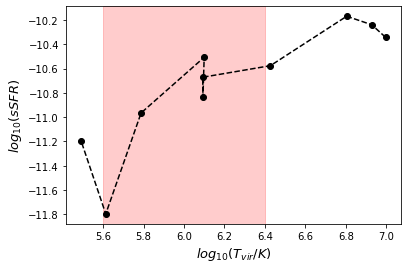

[0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 5 0 0 0]


In [272]:
# Central Galaxies AGN: ID = 1363589,
critT = 6
errorT = 0.4
ID = 20
AGNorNon = 1
title = ['AGN', 'NoAGN'][AGNorNon]
GalID = AllIDs[AGNorNon][ID]
mask1 = eagle.dataStorage[title][GalID]['Vtemp'][:-4] < 10**7

x1 =  np.log10(eagle.dataStorage[title][GalID]['Vtemp'])[:-4]
y1 = np.log10(eagle.dataStorage[title][GalID]['sSFR'])[:-4]

plt.plot(x1[mask1], y1[mask1], marker='o', linestyle= '--', color= 'black')
plt.axvspan(critT - errorT, critT + errorT, color = 'red', alpha = 0.2 )
plt.xlabel(r'$log_{10}(T_{vir} / K)$', fontsize = 13)
plt.ylabel(r'$log_{10}(sSFR)$', fontsize = 13)

plt.show()

print(eagle.dataStorage[title][GalID]['SubNum'])




# Quasar Phase Transition using Colossus

## Installing Modules

In [1]:
from colossus.lss import mass_function
from colossus.cosmology import cosmology
import numpy as np
import matplotlib.pyplot as plt
import eagleAnalysisTools as EAT
from scipy.stats import chisquare

## Calculating Colossus Theory

<ipython-input-2-94917e6b03dd>:16: RuntimeWarning: divide by zero encountered in log10
  y = np.log10(HMD)
<ipython-input-2-94917e6b03dd>:16: RuntimeWarning: divide by zero encountered in log10
  y = np.log10(HMD)
<ipython-input-2-94917e6b03dd>:16: RuntimeWarning: divide by zero encountered in log10
  y = np.log10(HMD)


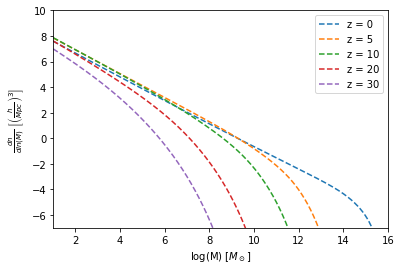

In [2]:
# Setting Up Cosmolgy in the Colossus Module
cosmology.setCosmology('planck18')
low = 1
high = 16
massRange = np.logspace(low,high,1000,base=10)

# Calculating the Halo Mass Function
redshifts = [0,5,10,20,30]
models = ['reed07']
# redshifts = [7]
for model in models:
    for z in redshifts:
        HMD = mass_function.massFunction(massRange, z, q_out = 'dndlnM', model = model)
        x = np.log10(massRange)
        y = HMD
        y = np.log10(HMD)


        plt.plot(x,y, label = "z = {}".format(z), linestyle= '--')

    plt.legend()
    plt.xlim(low,high)
    plt.ylim(-7,10)
    plt.xlabel(r'log(M) [$M_\odot$]')
    plt.ylabel(r'$\frac{dn}{dln(M)}$ $\left[\left(\frac{h}{Mpc}\right)^3\right]$')

    plt.show()


## Converting Halo Mass to Virial Temperature

<ipython-input-3-e93f75855d62>:22: RuntimeWarning: divide by zero encountered in log10
  y = np.log10(HMD)
<ipython-input-3-e93f75855d62>:22: RuntimeWarning: divide by zero encountered in log10
  y = np.log10(HMD)
<ipython-input-3-e93f75855d62>:22: RuntimeWarning: divide by zero encountered in log10
  y = np.log10(HMD)


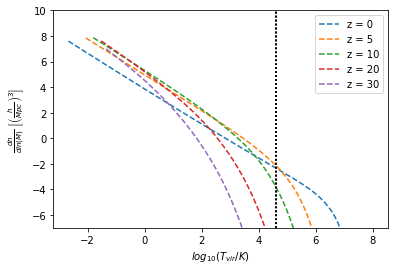

In [3]:
# Setting Constants
low = 1
high = 16
G = 6.67e-11
massRange = np.logspace(low,high,1000,base=10)
redshifts = np.array( [0,5,10,20,30] )
model = 'reed07'

#Calculating Values
cosmo = cosmology.setCosmology('planck18')
Hzs = cosmo.Hz(redshifts)


#Looping over Hubble Constants
for Z, Hz in zip(redshifts, Hzs):
    vHaloRange = (G * (massRange) * 10 * Hz)**(1./3)
    vTempRange = ( 3.6 *(1e5) ) * (vHaloRange/100)**2
    HMD = mass_function.massFunction(massRange, Z, q_out = 'dndlnM', model = model)
    
    x = np.log10(vTempRange)
    x2 = np.log10(massRange)
    y = np.log10(HMD)
    
    plt.plot(x,y, label = "z = {}".format(Z), linestyle= '--')
    plt.axvline(4.6, color='black', linestyle= ':')
    
plt.ylim(-7,10)
plt.xlabel(r'$log_{10}(T_{vir} / K)$')
plt.ylabel(r'$\frac{dn}{dln(M)}$ $\left[\left(\frac{h}{Mpc}\right)^3\right]$')
plt.legend()
plt.show()

## Grabbing the values of Z

In [5]:
redshifts = np.linspace(0,15, 100)
criticalTemp = 10**4.6
Qdensity = []
vHaloRange = (G * (massRange) * 10 * Hz)**(1./3)
model = 'reed07'


for z in redshifts:
    Hz = cosmo.Hz(z)
    critVel = (criticalTemp / ( 3.6 *(1e5) ))**(0.5) * 100
    critMass = (critVel**3) / (G * 10 * Hz)
    Qdensity.append( mass_function.massFunction(critMass, z, q_out = 'dndlnM', model = model) )

modelDiffQdensity = np.array([(Qdensity[i+1] + Qdensity[i])/2 for i in range(len(Qdensity) - 1)]  )
modelAvRedshift = np.array( [(redshifts[i+1] + redshifts[i]) / 2 for i in range(len(redshifts) - 1)])
modelDiffRedshifts = np.array( [abs(redshifts[i+1] - redshifts[i]) for i in range(len(redshifts) - 1)])
modelQFR = modelDiffQdensity / modelDiffRedshifts


# print(modelQFR)

Text(0, 0.5, '$\\frac{dn_{quasar}}{dZ}$')

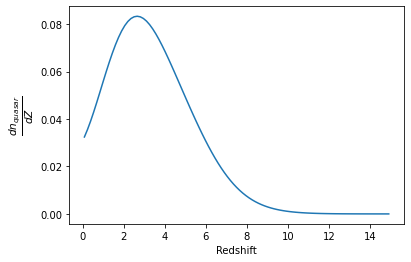

In [7]:
# print(Qdensity)
plt.plot(modelAvRedshift, (modelQFR))
plt.xlabel('Redshift')
plt.ylabel(r'$\frac{dn_{quasar}}{dZ}$', fontsize = 15)
# plt.yscale('log
# print(modelQFR)

## Grabbing Data To Compare

In [8]:
Vintermediate = 10**1.8
Vthreshold = 10**2.2
simulation = "RefL0100N1504"
StorageLocation = 'C:/Users/samue/Documents/University Work/Year 4/Quasars/DataStorage/quasarPhaseStarting/'
randomNumber = 1
size = 100


# Querying Galaxies just below the critical velocity to test whether it exceeds the critical velocity later
referenceGalaxyQuery = 'SELECT \
        SH.GalaxyID as ID, \
        SH.TopLeafID as TopLeafID, \
        SH.DescendantID as DescID, \
        SH.SnapNum as SnapShot, \
        SH.Redshift as Z, \
        SH.Vmax as Vmax, \
        SH.StarFormationRate as SFR \
    FROM \
        {}_SubHalo as SH \
    WHERE \
        SH.Vmax > {} AND \
        SH.Vmax < {}'.format(simulation, Vintermediate, Vthreshold)  

# Querying Galaxies above the critical velocity 
quasarPhaseGalaxyQuery = 'SELECT \
    SH.GalaxyID as ID, \
    SH.TopLeafID as TopLeafID, \
    SH.DescendantID as DescID, \
    SH.SnapNum as SnapShot, \
    SH.Redshift as Z \
    FROM \
        {}_SubHalo as SH \
    WHERE \
        SH.Vmax > {}'.format(simulation, Vthreshold) 

# Establishing the Analysis Tools
eagle = EAT.eagleData(simulation, randomNumber, StorageLocation)

# Querying Reference Galaxies
eagle.DatabaseQuery("Reference Galaxies", referenceGalaxyQuery)
# Querying Quasar Phase Galaxies
eagle.DatabaseQuery("Quasar Phase Galaxies", quasarPhaseGalaxyQuery)

18/03/2021 09:03:21 | Querying Database ... 
18/03/2021 09:03:40   |  Query Time: 19.12s
Sorting Data into Astropy Table ...
18/03/2021 09:03:40   |  Sort Time: 0.02s
18/03/2021 09:03:40 | Querying Database ... 
18/03/2021 09:03:43   |  Query Time: 2.95s
Sorting Data into Astropy Table ...
18/03/2021 09:03:43   |  Sort Time: 0.0s


### Calculating Transition Density

In [9]:
quasarGalaxiesEntering = {}
test = []
for SN in range(28):

    # Grab all Descendant IDs that have not exceeded the Transition Velocity in the previous Snapshot
    referenceIDs = np.array(np.sort( eagle.dataStorage['Reference Galaxies']['DescID'][eagle.dataStorage['Reference Galaxies']['SnapShot'] == SN] ))
    # Grab Galaxy IDs in the previous snapshot that have not undergone the transition 
    testIDs = np.array(np.sort( eagle.dataStorage['Quasar Phase Galaxies']['ID'][eagle.dataStorage['Quasar Phase Galaxies']['SnapShot'] == (SN+1)] ))
    
#     print(referenceIDs)
    # Testing if this galaxy exists in the Quasar Phase in the following redshift
    matchIDs = []
    testCount = 0
    for refID in referenceIDs:
        if refID in testIDs:
            matchIDs.append(refID)
            testCount += 1

    print("Number of Galaxies SN = {}: Reference {}: TestID {}: Matched {}: Testing {}".format(SN, len(referenceIDs), len(testIDs), len(matchIDs), testCount))

    quasarGalaxiesEntering['SN = {}'.format(SN)] = matchIDs
    # test.append(testCount)
    # print(len(quasarGalaxiesEntering['SN = {}'.format(SN)]))
    

# print(len(quasarGalaxiesEntering['SN = 15']))


Number of Galaxies SN = 0: Reference 2: TestID 0: Matched 0: Testing 0
Number of Galaxies SN = 1: Reference 367: TestID 9: Matched 10: Testing 10
Number of Galaxies SN = 2: Reference 7953: TestID 35: Matched 35: Testing 35
Number of Galaxies SN = 3: Reference 11456: TestID 95: Matched 95: Testing 95
Number of Galaxies SN = 4: Reference 14854: TestID 214: Matched 174: Testing 174
Number of Galaxies SN = 5: Reference 20386: TestID 471: Matched 426: Testing 426
Number of Galaxies SN = 6: Reference 27603: TestID 659: Matched 339: Testing 339
Number of Galaxies SN = 7: Reference 31197: TestID 859: Matched 414: Testing 414
Number of Galaxies SN = 8: Reference 34371: TestID 1232: Matched 720: Testing 720
Number of Galaxies SN = 9: Reference 38232: TestID 1553: Matched 805: Testing 805
Number of Galaxies SN = 10: Reference 41094: TestID 1945: Matched 1017: Testing 1017
Number of Galaxies SN = 11: Reference 42805: TestID 2327: Matched 1339: Testing 1339
Number of Galaxies SN = 12: Reference 437

In [10]:
# Reformating Number Density into a single array taking into account simulation size
numberDensity = np.array([len(quasarGalaxiesEntering[key]) for key in quasarGalaxiesEntering.keys()]) / (100**3)

# Formating Redshifts
Redshift = np.array( eagle.timeData['Z']  )
DataAvRedshift = np.array( [(Redshift[i+1] + Redshift[i])/2 for i in range(28) ] )
DiffRedshifts = np.array( [abs(Redshift[i+1] - Redshift[i]) for i in range(28) ] )

# Quasar Formation Rate
dataQFR = numberDensity / DiffRedshifts
print(np.log10(dataQFR))

[       -inf -5.71090203 -4.45816672 -3.98287019 -3.77019582 -3.40337173
 -3.15441888 -3.03638451 -2.88462442 -2.79451859 -2.65134567 -2.58204123
 -2.52053745 -2.33192858 -2.28775272 -2.34035334 -2.25599937 -2.25123409
 -2.29529884 -2.25787583 -2.30514652 -2.38441375 -2.45958805 -2.55039826
 -2.54852445 -2.59517728 -2.62193545 -2.73325138]


<ipython-input-10-f658ce71288d>:11: RuntimeWarning: divide by zero encountered in log10
  print(np.log10(dataQFR))


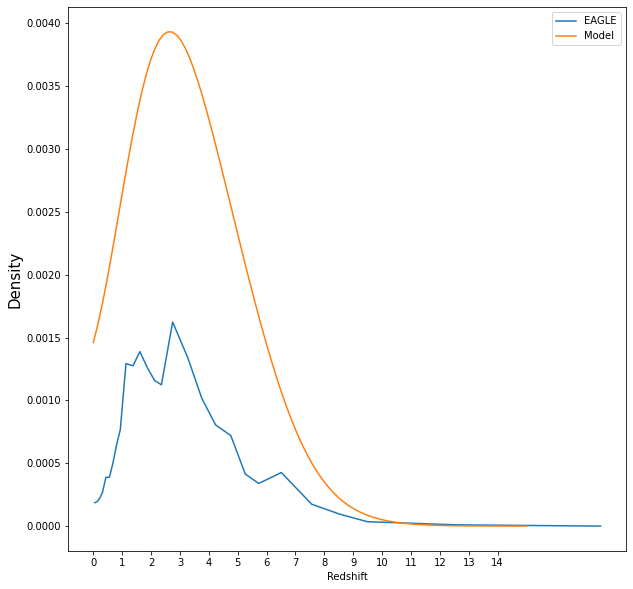

In [12]:
# Establishing Figure
fig, ax = plt.subplots(1,1, figsize = (10,10))
h = 0.6777


x = DataAvRedshift
y = numberDensity

ax.plot(x, y, label = 'EAGLE')

x = redshifts
y = np.array(Qdensity) * h**3 
ax.plot(x, y, label = 'Model')
ax.set_xlabel('Redshift')
ax.set_ylabel('Density', fontsize = 15)

ax.set_xticks(np.arange(0,15))
ax.legend()
plt.show()

# Star Formation Quenching Graph Creation


## Simulation Comparisons

In [3]:
#Importing Relevant Modules
import numpy as np
import matplotlib.pyplot as plt
import eagleAnalysisTools as EAT
import eagleAnalysis as EA
from colossus.cosmology import cosmology
from scipy.optimize import curve_fit
import math
from scipy import stats
from scipy.stats import chisquare
import uncertainties.unumpy as unp
import uncertainties as unc
from colossus.lss import mass_function
from colossus.cosmology import cosmology
import astropy

storageLocation = 'C:/Users/samue/Documents/University Work/Year 4/Quasars/DataStorage/haloDistributionFunction/'
size = 100

In [2]:
# Querying DataBase
simulationAGN = "RefL0050N0752"
simulationNoAGN = "NoAGNL0050N0752"
randNum = 1

def query(sim, randNum, snapshot):
    
    Query = "SELECT \
            fof.GroupCentreOfPotential_x as x, \
            fof.GroupCentreOfPotential_y as y, \
            fof.GroupCentreOfPotential_z as z, \
            fof.GroupMass as Mass, \
            fof.Group_R_Mean200 as radius, \
            fof.GroupID as GroupID, \
            SH.Vmax as Vmax, \
            SH.StarFormationRate as SFR, \
            SH.GalaxyID as GalaxyID, \
            SH.SubGroupNumber as SubGNum, \
            SH.SnapNum as SnapShot \
        FROM \
            {}_FOF as fof, \
            {}_Subhalo as SH \
        WHERE \
            SH.GroupID = fof.GroupID AND \
            fof.RandomNumber < {} AND \
            SH.SubGroupNumber = 0 AND \
            SH.SnapNum = {} \
        ORDER BY \
            fof.GroupMass DESC".format(sim, sim, randNum, snapshot)
    
    return Query

eagle = EAT.eagleData(randNum, simulationAGN, storageLocation)

snapShots = np.arange(0,29)
redshifts = [20.00002119, 15.1323108, 9.99303373, 8.98787474, 8.07461608, 7.04956604,
  5.97116243, 5.4874151, 5.03723649, 4.4852138, 3.98366355, 3.52797657, 3.01650464, 2.47841334, 2.23703689, 2.01241024, 1.73696582, 1.48670732,
  1.2593315, 1.00412169,0.86505054, 0.7356296, 0.61518977, 0.50310731, 0.36566855, 0.27090109, 0.18270988, 0.10063854, 0.]
for SN, Z in zip(snapShots,redshifts):
    lab = 'AGNgalaxies:Z{}'.format(Z)
    eagle.DatabaseQuery(lab, query(simulationAGN, randNum, SN))
    eagle.linkTimes(lab)

for SN, Z in zip(snapShots,redshifts):
    lab = 'NoAGNgalaxies:Z{}'.format(Z)
    eagle.DatabaseQuery(lab, query(simulationNoAGN, randNum, SN))
    eagle.linkTimes(lab)

        

19/04/2021 19:55:12 | Querying Database ... 
19/04/2021 19:55:13   |  Query Time: 1.05s
Sorting Data into Astropy Table ...
19/04/2021 19:55:13   |  Sort Time: 0.0s
Adding Time Data to AGNgalaxies:Z20.00002119 ...
19/04/2021 19:55:13 | Querying Database ... 
19/04/2021 19:55:15   |  Query Time: 2.23s
Sorting Data into Astropy Table ...
19/04/2021 19:55:15   |  Sort Time: 0.0s
Adding Time Data to AGNgalaxies:Z15.1323108 ...
19/04/2021 19:55:15 | Querying Database ... 
19/04/2021 19:55:38   |  Query Time: 22.54s
Sorting Data into Astropy Table ...
19/04/2021 19:55:38   |  Sort Time: 0.0s
Adding Time Data to AGNgalaxies:Z9.99303373 ...
19/04/2021 19:55:38 | Querying Database ... 
19/04/2021 19:58:07   |  Query Time: 149.2s
Sorting Data into Astropy Table ...
19/04/2021 19:58:07   |  Sort Time: 0.0s
Adding Time Data to AGNgalaxies:Z8.98787474 ...
19/04/2021 19:58:07 | Querying Database ... 


ConnectionResetError: [WinError 10054] An existing connection was forcibly closed by the remote host

In [116]:
print(np.array(eagle.timeData['Z']))

[20.00002119 15.1323108   9.99303373  8.98787474  8.07461608  7.04956604
  5.97116243  5.4874151   5.03723649  4.48521382  3.98366355  3.52797657
  3.01650464  2.47841334  2.23703689  2.01241024  1.73696582  1.48670732
  1.2593315   1.00412169  0.86505054  0.7356296   0.61518977  0.50310731
  0.36566855  0.27090109  0.18270988  0.10063854  0.        ]


In [3]:
# Establishing Analysis Tool
ER = EA.eagleReduction(storageLocation)
cosmo = cosmology.setCosmology('planck18')
#Setting Up Binning
numBins = 100




# ER.Binning(numBins, '', 'BHARvsDMAR', binningRange, loggedBins = True, loggedValues = True)
plt.hist(np.log10(eagle.dataStorage['AGNgalaxies']['Mass']), numBins, density = True)
plt.yscale('log')
plt.show()


NameError: name 'eagle' is not defined

## Halo Mass Distribution

Reduced Chi Squared Fit | z = 0.0 | 185.66683455894537
Reduced Chi Squared Fit | z = 0.0 | 185.40149080653666
Reduced Chi Squared Fit | z = 1.00412169 | 175.78275303684833
Reduced Chi Squared Fit | z = 1.00412169 | 175.92126949974738
Reduced Chi Squared Fit | z = 5.03723649 | 156.94322045648215
Reduced Chi Squared Fit | z = 5.03723649 | 157.35229045981123
Reduced Chi Squared Fit | z = 7.04956604 | 158.17993979036203
Reduced Chi Squared Fit | z = 7.04956604 | 157.92940916133355
Reduced Chi Squared Fit | z = 9.99303373 | 171.10937369382
Reduced Chi Squared Fit | z = 9.99303373 | 171.36411209768733
[-3.36451625 -3.63451202 -3.84163751 -4.31875876 -5.09691001] [-3.40450175 -3.75393495 -4.12008861 -4.5178579  -4.97632987]
[-2.94462167 -3.29073004 -3.64975198 -4.01772877 -4.39794001] [-2.97882194 -3.32236033 -3.69238919 -4.10377686 -4.57573786]
[-2.50251746 -2.83923144 -3.22767829 -3.40671393 -3.98296666] [-2.40140737 -2.72997946 -3.0852123  -3.47615746 -3.91411381]
[-2.8068754  -3.03621217 

<ipython-input-82-8dc3e9f60979>:70: RuntimeWarning: divide by zero encountered in log10
  y = np.log10(HMD * (h**3))


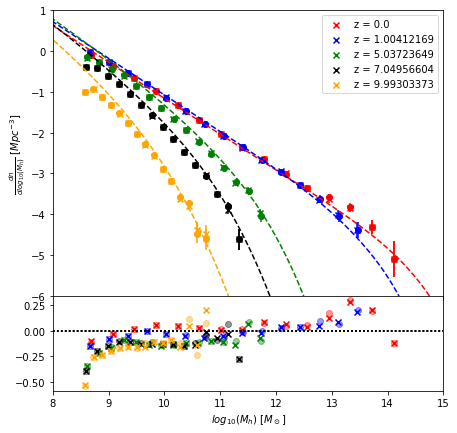

In [82]:
# Setting up Limits and Restrictions
dataSetRedshift = 7
size = 50**3
redshifts = [0.0, 1.00412169, 5.03723649, 7.04956604, 9.99303373]
h = 0.6777
numBins = 15
model = 'reed07'
percentiles = [60,40]
colours = ['red','blue','green','black','orange']
titles = ['AGNgalaxies', 'NoAGNgalaxies']
markers = ['x', 'o']
low = 1
high = 16
massRange = np.logspace(low,high,1000,base=10)
residuals = {}


fig, axes = plt.subplots(ncols = 1, nrows = 2, sharex = True, figsize = (7,7), gridspec_kw={'height_ratios': [3, 1]})
plt.subplots_adjust(hspace = 0)


#Looping over all of the queried datasets
for z, col in zip(redshifts, colours):
    temp = []
    i = True
    for name, marker in zip(titles, markers):
        #Set the Dataset required
        title = "{}:Z{}".format(name,z) 
        #Establishing dataRanges for specific dataSet
        dataRange = np.log10( np.array([ min( eagle.dataStorage[title]['Mass'] ) , max( eagle.dataStorage[title]['Mass'] ) ]))
        n, bins = np.histogram(np.log10( eagle.dataStorage[title]['Mass']), bins = numBins, range = (dataRange[0], dataRange[1]))

        # Plotting Data
        x = np.array( [ ((bins[i] + bins[i+1])/2) for i in range(len(bins) - 1)  ] ) 
        y = np.log10( n  / size )
        
        # Calculating Errors
        error = np.sqrt(n) / size
        error = error / (np.log(10) * (n  / size))
    

        axes[0].errorbar(x, y, yerr = error, marker= marker, fmt = 'none', color = col) 
        if i:
            axes[0].scatter(x, y, color = col, marker = marker, label = 'z = {}'.format(z))
            i = False
        else:
            axes[0].scatter(x, y, color = col, marker = marker)

        
    
        # Creating a ChiSquared Test for the data fitting to colossus model
        TestCondition = x > 9
        xTest = x[TestCondition]
        yTest =  np.log10( mass_function.massFunction(xTest, z, q_out = 'dndlnM', model = model) * (h**3))
        # print(y, yTest)
        Chi = chisquare(f_obs=y[x>9], f_exp=yTest)
        print("Reduced Chi Squared Fit | z = {} | {}".format(z,Chi[0]))
        temp.append([x,y])
        
    residuals[z] = temp


axes[0].legend()

#Add the Halo Mass Function from the Colossus package
for z, col in zip(redshifts,colours):
    HMD = mass_function.massFunction(massRange, z, q_out = 'dndlnM', model = model)
    x = np.log10(massRange)
    # y = HMD
    y = np.log10(HMD * (h**3))


    axes[0].plot(x,y, label = "z = {}".format(z), linestyle= '--', color = col)
    
    #Plotting Residuals
    xAGN, yAGN = residuals[z][0]
    xNoAGN, yNoAGN = residuals[z][1]
    yModelAGN = np.log10(mass_function.massFunction(10**xAGN, z, q_out = 'dndlnM', model = model)* (h**3))
    yModelNoAGN = np.log10(mass_function.massFunction(10**xNoAGN, z, q_out = 'dndlnM', model = model)* (h**3))
    print(yAGN[-5:], yModelAGN[-5:])
    
    
    axes[1].scatter(xAGN, yAGN - yModelAGN , color = col, marker = 'x', label = 'z = {}'.format(z))
    axes[1].scatter(xNoAGN, yNoAGN - yModelNoAGN , color = col, marker = 'o', label = 'z = {}'.format(z), alpha = 0.4)
    axes[1].axhline(0, linestyle = ':', color = 'black')



axes[0].set_ylim(-6,1)
axes[0].set_xlim(8,15)
axes[1].set_xlabel(r'$log_{10}(M_h)$ [$M_\odot$]')
axes[1].set_ylabel(r'Normalised \n Residuals')
axes[0].set_ylabel(r'$\frac{dn}{dlog_{10}(M_h)}$ $[Mpc^{-3}]$')

plt.show()






## Virial Temperature Distribution

In [ ]:
ER.Storage['Vh'] = (ER.G * ER.Storage['DMmass'] * 10 * ER.Storage['Hz'])**(1./3) 
ER.Storage['Tmax'] = ( 3.6 *(1e5) ) * (ER.Storage['Vmax']/100)**2 
ER.Storage['Th'] = ( 3.6 *(1e5) ) * (ER.Storage['Vh']/100)**2 

Reduced Chi Squared Fit | z = 0.0 | 211.72654019146566
Reduced Chi Squared Fit | z = 0.0 | 211.4811494068838
Reduced Chi Squared Fit | z = 1.00412169 | 202.22305818254281
Reduced Chi Squared Fit | z = 1.00412169 | 202.3556247960991
Reduced Chi Squared Fit | z = 5.03723649 | 191.90759632469542
Reduced Chi Squared Fit | z = 5.03723649 | 192.2887241779429
Reduced Chi Squared Fit | z = 7.04956604 | 202.20067568946513
Reduced Chi Squared Fit | z = 7.04956604 | 201.960177228877
Reduced Chi Squared Fit | z = 9.99303373 | 218.14108286369463
Reduced Chi Squared Fit | z = 9.99303373 | 218.36090570977078
[2.44949436 2.70766807 2.96584177 3.22401524 3.48218918 3.74036264
 3.99853611 4.25671005 4.51488352 4.77305698 5.03123093 5.28940487
 5.54757786 5.8057518  6.06392574]
[2.60246658 2.83031583 3.05816507 3.28601408 3.51386333 3.74171257
 3.96956158 4.19741058 4.42526007 4.65310907 4.88095856 5.10880756
 5.33665657 5.56450558 5.79235506]
[3.00806689 3.15636873 3.30467081 3.45297289 3.60127497 3.749

<ipython-input-71-4adab2e5011d>:75: RuntimeWarning: divide by zero encountered in log10
  y = np.log10(HMD* (h**3))


Text(0, 0.5, '$\\frac{dn}{dlog_{10}(T_h)}$  [$Mpc^{-3}$]')

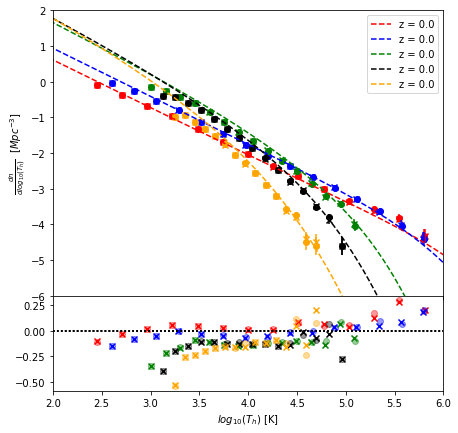

In [71]:
# Setting up Limits and Restrictions
dataSetRedshift = 7
size = 50**3
redshifts = [0.0, 1.00412169, 5.03723649, 7.04956604, 9.99303373]
h = 0.6777
numBins = 15
model = 'reed07'
percentiles = [60,40]
colours = ['red','blue','green','black','orange']
titles = ['AGNgalaxies', 'NoAGNgalaxies']
markers = ['x', 'o']
low = 1
high = 16
massRange = np.logspace(low,high,1000,base=10)
residuals = {}
ER = EA.eagleReduction(storageLocation)
cosmo = cosmology.setCosmology('planck18')



fig, axes = plt.subplots(ncols = 1, nrows = 2, sharex = True, figsize = (7,7), gridspec_kw={'height_ratios': [3, 1]})
plt.subplots_adjust(hspace = 0)


#Looping over all of the queried datasets
for z, col in zip(redshifts, colours):
    temp = []
    i = True
    for name, marker in zip(titles, markers):
        #Set the Dataset required
        title = "{}:Z{}".format(name,z) 
        #Establishing dataRanges for specific dataSet
        Hz = cosmo.Hz(z)
        Vh = (ER.G * eagle.dataStorage[title]['Mass'] * 10 * Hz)**(1./3) 
        Th = ( 3.6 *(1e5) ) * (Vh/100)**2 

        
        dataRange = np.log10( np.array([ min( Th ) , max( Th ) ]))
        n, bins = np.histogram(np.log10(Th), bins = numBins, range = (dataRange[0], dataRange[1]))

        # Plotting Data
        x = np.array( [ ((bins[i] + bins[i+1])/2) for i in range(len(bins) - 1)  ] ) 
        y = np.log10( n  / size )
        
        # Calculating Errors
        error = np.sqrt(n) / size
        error = error / (np.log(10) * (n  / size))
    

        axes[0].errorbar(x, y, yerr = error, marker= marker, fmt = 'none', color = col) 
        axes[0].scatter(x, y, color = col, marker = marker)

        
    
        # Creating a ChiSquared Test for the data fitting to colossus model
        xTest = x
        xTest = ((xTest / (3.6 * (1e5)))**0.5)*100
        XTest = (xTest**3) / (ER.G * 10 * Hz)
        yTest =  np.log10( mass_function.massFunction(xTest, z, q_out = 'dndlnM', model = model) * (h**3))
        Chi = chisquare(f_obs=y, f_exp=yTest)
        print("Reduced Chi Squared Fit | z = {} | {}".format(z,Chi[0]))
        temp.append([x,y])
        
    residuals[z] = temp


#Looping over Hubble Constants
for z, col in zip(redshifts, colours):
    Hz = cosmo.Hz(z)
    vHaloRange = (ER.G * (massRange) * 10 * Hz)**(1./3)
    vTempRange = ( 3.6 *(1e5) ) * (vHaloRange/100)**2
    HMD = mass_function.massFunction(massRange, z, q_out = 'dndlnM', model = model)
    x = np.log10(vTempRange)
    x2 = np.log10(massRange)
    y = np.log10(HMD* (h**3))
    
    axes[0].plot(x,y, label = "z = {}".format(Z), linestyle= '--', color = col)
#     plt.axvline(4.6, color='black', linestyle= ':')


    # Plotting Residuals
    xAGN, yAGN = residuals[z][0]
    xNoAGN, yNoAGN = residuals[z][1]
    
    xAGNmass = ((10**xAGN / (3.6 * (1e5)))**0.5)*100
    xAGNmass = (xAGNmass**3) / (ER.G * 10 * Hz)
    
    xNoAGNmass = ((10**xNoAGN / (3.6 * (1e5)))**0.5)*100
    xNoAGNmass = (xNoAGNmass**3) / (ER.G * 10 * Hz)  
    
    print(xAGN)
    yModelAGN = np.log10(mass_function.massFunction(xAGNmass, z, q_out = 'dndlnM', model = model)* (h**3))
    yModelNoAGN = np.log10(mass_function.massFunction(xNoAGNmass, z, q_out = 'dndlnM', model = model)* (h**3))    
    
    axes[1].scatter(xAGN, yAGN - yModelAGN , color = col, marker = 'x', label = 'z = {}'.format(z))
    axes[1].scatter(xNoAGN, yNoAGN - yModelNoAGN , color = col, marker = 'o', alpha = 0.4)
    axes[1].axhline(0, linestyle = ':', color = 'black')





axes[0].legend()

axes[0].set_ylim(-6,2)
axes[0].set_xlim(2,6)
axes[1].set_xlabel(r'$log_{10}(T_h)$ [K]')
axes[0].set_ylabel(r'$\frac{dn}{dlog_{10}(T_h)}$  [$Mpc^{-3}$]')

## Star Formation Distribution

KeyError: 'AGNgalaxies:Z7.04956604'

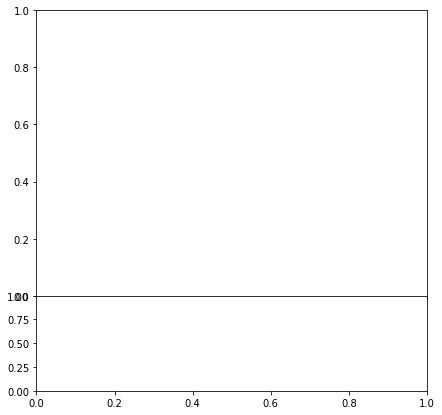

In [119]:
# Setting up Limits and Restrictions
size = 50**3
redshifts = [0, 1, 5, 7, 10]
h = 0.6777
numBins = 15
model = 'reed07'
percentiles = [60,40]
colours = ['red','blue','green','black','orange']
titles = ['AGNgalaxies', 'NoAGNgalaxies']
markers = ['x', 'o']
low = 1
high = 16
massRange = np.logspace(low,high,1000,base=10)
residuals = {}
ER = EA.eagleReduction(storageLocation)
cosmo = cosmology.setCosmology('planck18')
redshifts = np.array([20.00002119, 15.1323108, 9.99303373, 8.98787474, 8.07461608, 7.04956604,
  5.97116243, 5.4874151, 5.03723649, 4.4852138, 3.98366355, 3.52797657, 3.01650464, 2.47841334, 2.23703689, 2.01241024, 1.73696582, 1.48670732,
  1.2593315, 1.00412169,0.86505054, 0.7356296, 0.61518977, 0.50310731, 0.36566855, 0.27090109, 0.18270988, 0.10063854, 0.])

fig, axes = plt.subplots(ncols = 1, nrows = 2, sharex = True, figsize = (7,7), gridspec_kw={'height_ratios': [3, 1]})
plt.subplots_adjust(hspace = 0)

SFAGN = []
SFNoAGN = []
mask = redshifts < 8

#Looping over all of the queried datasets
for z in redshifts[mask]:
    
    #Set the Dataset required
    titleAGN = "{}:Z{}".format(titles[0],z) 
    titleNoAGN = "{}:Z{}".format(titles[1],z) 
    #Establishing dataRanges for specific dataSet
    SFAGN.append(sum(eagle.dataStorage[titleAGN]['SFR']))
    SFNoAGN.append(sum(eagle.dataStorage[titleNoAGN]['SFR']))

SFAGN = np.array(SFAGN)
SFNoAGN = np.array(SFNoAGN)

# Plotting Data
x = np.array( redshifts[mask] ) 
y = np.log10( SFAGN / size )
# Calculating Errors

axes[0].scatter(x, y, label = 'AGN', color = 'blue')


x = np.array( redshifts[mask] ) 
y = np.log10( SFNoAGN / size )
# Calculating Errors

axes[0].scatter(x, y, label = 'NoAGN', color = 'red') 
        
    
zRange = np.linspace(0,8,1000)
yModel = np.log10( 0.015 * ( ((1 + zRange)**2.7) / (1 + ((1+zRange)/2.9)**5.6)))
    
axes[0].plot((zRange), yModel, color='black', label = '(Madau, Lilly, et al 1996')
    
# Plotting Residuals

yModel = np.array(0.015 * ( ((1 + redshifts[mask])**2.7) / (1 + ((1+redshifts[mask])/2.9)**5.6)) * h**3)
axes[1].scatter(redshifts[mask], ((SFAGN/size) - yModel)/abs(SFAGN/size), color = 'blue')
print(np.log10(SFAGN/size), np.log10(yModel))

    
axes[0].legend()
# axes[0].set_ylim(-6,2)
# axes[0].set_xlim(2,6)
axes[1].set_xlabel(r'Redshift')
axes[0].set_ylabel(r'log(SFR) [$Mpc^{-3}$]')
axes[1].set_ylabel(r'Normalised \n Residuals')



## ReCalculating Galaxy Matching


In [1]:
# Testing Matching Programme
def query(sim, snapshot):
    
    Query = "SELECT \
            fof.GroupCentreOfPotential_x as x, \
            fof.GroupCentreOfPotential_y as y, \
            fof.GroupCentreOfPotential_z as z, \
            fof.GroupMass as Mass, \
            fof.Group_R_Mean200 as radius, \
            fof.GroupID as GroupID, \
            SH.Vmax as Vmax, \
            SH.StarFormationRate as SFR, \
            SH.GalaxyID as GalaxyID, \
            SH.SubGroupNumber as SubGNum, \
            SH.SnapNum as SnapShot, \
            SH.MassType_DM as DHM, \
            SH.MassType_Star as SM, \
            SH.TopLeafID \
        FROM \
            {}_FOF as fof, \
            {}_Subhalo as SH \
        WHERE \
            SH.GroupID = fof.GroupID AND \
            SH.SnapNum = {} AND \
            SH.SubGroupNumber = 0 AND \
            SH.MassType_DM > 0 AND \
            SH.MassType_Star > 0 \
        ORDER BY \
            SH.StarFormationRate DESC ".format(sim, sim, snapshot)
    
    return Query

#Importing Relevant Modules
import numpy as np
import matplotlib.pyplot as plt
import eagleAnalysisTools as EAT
from colossus.cosmology import cosmology
from scipy.optimize import curve_fit
import math
from scipy import stats
from scipy.stats import chisquare
import uncertainties.unumpy as unp
import uncertainties as unc
from colossus.lss import mass_function
from colossus.cosmology import cosmology
import astropy
import time
import datetime
import eagleAnalysis as EA

storageLocation = 'C:/Users/samue/Desktop/GalaxyMatching/'
size = 50
simulationAGN = "RefL0050N0752"
simulationNoAGN = "NoAGNL0050N0752"
randNum = 1
SnapShots = np.arange(9,20)

In [3]:
for SN in SnapShots:
    print('Starting Snapshot: {}'.format(SN))
    # Querying DataBase
    
    eagle = EAT.eagleData(randNum, simulationAGN, storageLocation)

    eagle.DatabaseQuery('AGN', query(simulationAGN, SN))
    eagle.DatabaseQuery('NoAGN', query(simulationNoAGN,  SN))


    SuccesfulMatches = 0
    Total = len(eagle.dataStorage['AGN']['GalaxyID'])
    ID = []
    TopLeafID = []
    Mass = []
    SnapShot = []
    SFR = []
    SM = []
    Vmax = []
    X = []
    Y = []
    Z = []
    refID = []
    refTopLeafID = []
    refMass = []
    refSnapShot = []
    refSFR = []
    refSM = []
    refVmax = []
    refX = []
    refY = []
    refZ = []

    ts = time.time()
    iterations = 0

    for refGal in  eagle.dataStorage['AGN'][:Total]:
        #Define Reference Galaxies
        Galaxies = eagle.dataStorage['NoAGN']

        #Defining Comparisons
        Galaxies['dx'] = abs(Galaxies['x'] - refGal['x'] )
        Galaxies['dy'] = abs(Galaxies['y'] - refGal['y'] )
        Galaxies['dz'] = abs(Galaxies['z'] - refGal['z'] )
        Galaxies['dr'] = Galaxies['dx'] + Galaxies['dy'] + Galaxies['dz']
        Galaxies['dm'] = abs(Galaxies['DHM'] - refGal['DHM'] )

        #Distance Guess
        distanceGuess = min(Galaxies['dr'])
        MatchPosition = Galaxies[Galaxies['dr'] == distanceGuess]

        PositionAccuracy = np.mean( [(refGal['x']/MatchPosition['x']) ,(refGal['y']/MatchPosition['y']), (refGal['z']/MatchPosition['z'])]) * 100
        MassAccuracy = float((refGal['DHM']/MatchPosition['DHM']) ) * 100

        if 98 < PositionAccuracy < 102 and 95 < MassAccuracy < 105:
            SuccesfulMatches += 1
            ID.append(int(MatchPosition['GalaxyID']))
            TopLeafID.append(int(MatchPosition['TopLeafID']))
            Mass.append(float(MatchPosition['DHM']))
            SnapShot.append(int(MatchPosition['SnapShot']))
            SFR.append(float(MatchPosition['SFR']))
            SM.append(float(MatchPosition['SM']))
            Vmax.append(float(MatchPosition['Vmax']))
            X.append(float(MatchPosition['x']))
            Y.append(float(MatchPosition['y']))
            Z.append(float(MatchPosition['z']))
            refID.append(refGal['GalaxyID'])
            refTopLeafID.append(refGal['TopLeafID'])
            refMass.append(refGal['DHM'])
            refSnapShot.append(MatchPosition['SnapShot'])
            refSFR.append(refGal['SFR'])
            refSM.append(refGal['SM'])
            refVmax.append(refGal['Vmax'])
            refX.append(refGal['x'])
            refY.append(refGal['y'])
            refZ.append(refGal['z'])

        if iterations == 100:
            sortTime = ((time.time() - ts) / 100) * Total
            t = datetime.datetime.now().strftime("%d/%m/%Y %H:%M:%S")
            log = '{}   |  Sort Time: {}s'.format(t,round(sortTime,2))
            print(log)
        iterations += 1



    Matches = astropy.table.Table()
    Matches['GuessID'] = ID
    Matches['GuessTopLeafID'] = TopLeafID
    Matches['GuessMass'] = Mass
    Matches['GuessSnapShot'] = SnapShot
    Matches['GuessSFR'] = SFR
    Matches['GuessSM'] = SM
    Matches['GuessVmax'] = Vmax
    Matches['GuessX'] = X
    Matches['GuessY'] = Y
    Matches['GuessZ'] = Z
    Matches['RefID'] = refID
    Matches['RefTopLeafID'] = refTopLeafID 
    Matches['RefMass'] = refMass
    Matches['RefSnapShot'] = refSnapShot
    Matches['RefSFR'] = refSFR
    Matches['RefSM'] = refSM
    Matches['RefVmax'] = refVmax
    Matches['RefX'] = refX
    Matches['RefY'] = refY
    Matches['RefZ'] = refZ

    if Total != 0:
        print('Successful Matches: {}%'.format(round((SuccesfulMatches/Total)*100),2))
    print('FINISHED')
    print('Saved as SnapShot{}\n\n'.format(SN))
    
    eagle.dataStorage['SnapShot{}'.format(SN)] = Matches
    eagle.saveData('SnapShot{}'.format(SN))
    

Starting Snapshot: 9
07/04/2021 23:05:15 | Querying Database ... 
07/04/2021 23:05:18   |  Query Time: 3.44s
Sorting Data into Astropy Table ...
07/04/2021 23:05:18   |  Sort Time: 0.0s
07/04/2021 23:05:18 | Querying Database ... 
07/04/2021 23:05:22   |  Query Time: 3.21s
Sorting Data into Astropy Table ...
07/04/2021 23:05:22   |  Sort Time: 0.0s
07/04/2021 23:05:23   |  Sort Time: 728.35s
Successful Matches: 42%
FINISHED
Saved as SnapShot9


Starting Snapshot: 10
07/04/2021 23:16:50 | Querying Database ... 
07/04/2021 23:16:53   |  Query Time: 3.0s
Sorting Data into Astropy Table ...
07/04/2021 23:16:53   |  Sort Time: 0.01s
07/04/2021 23:16:53 | Querying Database ... 
07/04/2021 23:16:56   |  Query Time: 3.07s
Sorting Data into Astropy Table ...
07/04/2021 23:16:56   |  Sort Time: 0.0s
07/04/2021 23:16:58   |  Sort Time: 716.7s
Successful Matches: 42%
FINISHED
Saved as SnapShot10


Starting Snapshot: 11
07/04/2021 23:29:01 | Querying Database ... 
07/04/2021 23:29:04   |  Query Tim

## Recalculating SFR Ratio

In [4]:
SnapShots = np.arange(0,29)
eagle = EAT.eagleData(10, 'test', 'C:/Users/samue/Desktop/GalaxyMatching/')

for SN in SnapShots:
    eagle.DatabaseQuery('SnapShot{}'.format(SN), 'SnapShot{}'.format(SN), loadFromPickle=True)
    eagle.dataStorage['SnapShot{}'.format(SN)]['SnapShot'] = eagle.dataStorage['SnapShot{}'.format(SN)]['GuessSnapShot']
    eagle.propertiesQueried['SnapShot{}'.format(SN)] += ['SnapShot']
    eagle.linkTimes('SnapShot{}'.format(SN))
    
    
# print(eagle.dataStorage['SnapShot20']['GuessMass'])    
combinedData = astropy.table.Table()   

for key in eagle.dataStorage['SnapShot28'].keys():
    temp = []
    for SN in SnapShots:
        title = 'SnapShot{}'.format(SN)
        temp += eagle.dataStorage[title][key].tolist()
    combinedData[key] = temp
    
combinedData['SnapShot'] = combinedData['GuessSnapShot']      

eagle.dataStorage['CombinedData'] = combinedData

Adding Time Data to SnapShot0 ...
Adding Time Data to SnapShot1 ...
Adding Time Data to SnapShot2 ...
Adding Time Data to SnapShot3 ...
Adding Time Data to SnapShot4 ...
Adding Time Data to SnapShot5 ...
Adding Time Data to SnapShot6 ...
Adding Time Data to SnapShot7 ...
Adding Time Data to SnapShot8 ...
Adding Time Data to SnapShot9 ...
Adding Time Data to SnapShot10 ...
Adding Time Data to SnapShot11 ...
Adding Time Data to SnapShot12 ...
Adding Time Data to SnapShot13 ...
Adding Time Data to SnapShot14 ...
Adding Time Data to SnapShot15 ...
Adding Time Data to SnapShot16 ...
Adding Time Data to SnapShot17 ...
Adding Time Data to SnapShot18 ...
Adding Time Data to SnapShot19 ...
Adding Time Data to SnapShot20 ...
Adding Time Data to SnapShot21 ...
Adding Time Data to SnapShot22 ...
Adding Time Data to SnapShot23 ...
Adding Time Data to SnapShot24 ...
Adding Time Data to SnapShot25 ...
Adding Time Data to SnapShot26 ...
Adding Time Data to SnapShot27 ...
Adding Time Data to SnapShot28

In [6]:
# Fitting Model
def testModel(xObs,a,b):
    return a*(xObs) +  b
# Chi Squared Fitting Function
def ChiSq(xObs, yObs, params ):
    model = testModel(xObs, *params)
    return np.sum( ((yObs - model)**2) / abs(model) )
# Residual Function
def residuals(params):
    return testModel(params, xObs) - yObs
##################################################################
ER = EA.eagleReduction('test')
cosmo = cosmology.setCosmology('planck18')

ER.LoadInData(eagle.dataStorage['CombinedData'], ['GuessSFR', 'RefSFR', 'GuessMass', 'RefMass', 'GuessVmax', 'RefVmax', 'GuessSM', 'RefSM', 'RedShift'])
Hz = cosmo.Hz(0)

ER.Storage['Hz'] = cosmo.Hz(ER.Storage['RedShift'])
ER.Storage['GuessVh'] = ((6.67e-11) * (ER.Storage['GuessMass']) * 10 * ER.Storage['Hz'])**(1./3)
ER.Storage['RefVh'] = ((6.67e-11) * (ER.Storage['RefMass']) * 10 * ER.Storage['Hz'])**(1./3)

ER.Storage['GuessTh'] = ( 3.6 *(1e5) ) * (ER.Storage['GuessVh']/100)**2
ER.Storage['RefTh'] = ( 3.6 *(1e5) ) * (ER.Storage['RefVh']/100)**2

ER.Storage['GuessTmax'] =  (3.6 *(1e5) ) * (ER.Storage['GuessVmax']/100)**2
ER.Storage['RefTmax'] =  (3.6 *(1e5) ) * (ER.Storage['RefVmax']/100)**2

ER.Storage['GuessSSFR'] = ER.Storage['GuessSFR'] / ER.Storage['GuessSM']
ER.Storage['RefSSFR'] = ER.Storage['RefSFR'] / ER.Storage['RefSM']
ER.Storage['SFRratio'] = ER.Storage['RefSSFR'] / ER.Storage['GuessSSFR']


print(np.log10(min(ER.Storage['RefTh'])), np.log10(max(ER.Storage['RefTh'])))
ER.Binning( 20, 'RefTh', 'SFRratio', [4, 5.3], loggedBins = True, loggedValues = False)
ER.Binning( 20, 'RefTh', 'RefSSFR', [4, 5.3], loggedBins = True, loggedValues = True)
ER.Binning( 20, 'GuessTh', 'GuessSSFR', [4, 5.3], loggedBins = True, loggedValues = True)

2.2816944865593483 6.1133506829275355


<ipython-input-6-93e67011f5ac>:30: RuntimeWarning: divide by zero encountered in true_divide
  ER.Storage['SFRratio'] = ER.Storage['RefSSFR'] / ER.Storage['GuessSSFR']
<ipython-input-6-93e67011f5ac>:30: RuntimeWarning: invalid value encountered in true_divide
  ER.Storage['SFRratio'] = ER.Storage['RefSSFR'] / ER.Storage['GuessSSFR']


ChiSquared: 0.03 
 Reduced ChiSquare: 0.002 
 Fitted Parameters: -0.57, 3.53 
 Parameter Errors: 0.04, 0.19 
 Critical Value: 4.5 
 Critical Value Error: 0.2
---------------------------------


<ipython-input-9-1dacea0940f2>:76: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


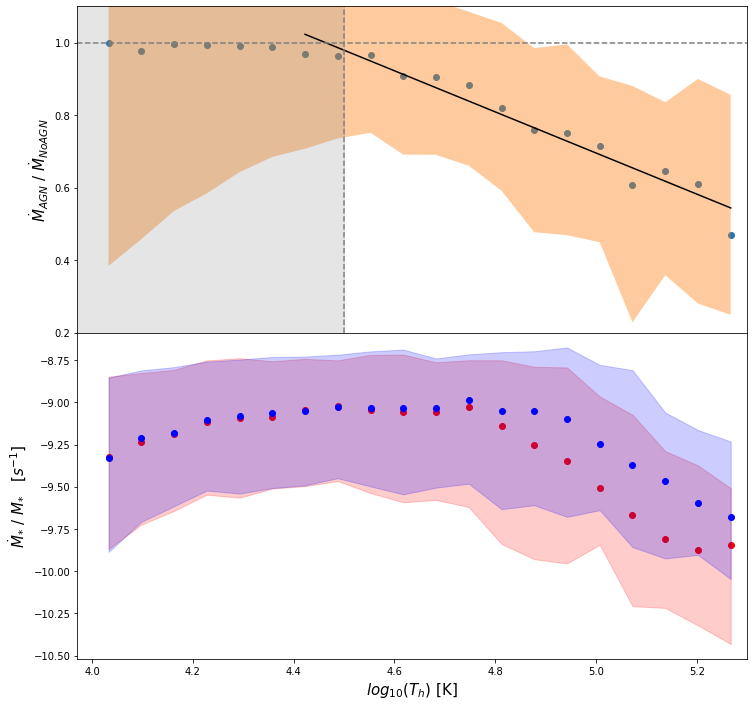

In [9]:
fig, axes = plt.subplots(ncols = 1, nrows = 2, sharex = True, figsize = (12,12))
plt.subplots_adjust(hspace = 0)


x = ER.binStorage['RefTh vs SFRratio']['binCenters']
y = ER.binStorage['RefTh vs SFRratio']['Median']
yUp,yDown = ER.binStorage['RefTh vs SFRratio']['Percentile75'], ER.binStorage['RefTh vs SFRratio']['Percentile25']
axes[0].scatter(x,y)
axes[0].fill_between(x, yUp, yDown, alpha = 0.4)
axes[0].set_ylim(top=1.1, bottom = 0.2)
axes[0].set_xlim(right = 5.3)



#Initial Guess Values
initGuess = [12,1,10]
mask = x>4.4
xObs = x[mask]
yObs = y[mask]
# Fitting the Model to the Data
pOpt , pCov = curve_fit(testModel, xObs, yObs)

params = pOpt
errors = np.sqrt(np.diag(pCov))    
DoF = len(xObs) - len(params)
chiSq = round(ChiSq(xObs,yObs,params), 1 - int(math.floor(math.log10(abs(ChiSq(xObs,yObs,params))))) - 1)
rChiSq = round(chiSq/DoF, 1 - int(math.floor(math.log10(abs(chiSq/DoF)))) - 1)
# Critical Value 
critValue = (1 - params[1]) / params[0]
critError = np.sqrt(np.sum(errors**2))

critError =  round(critError, 1 - int(math.floor(math.log10(abs(critError)))) - 1)
critValue = round(critValue, 1)

print('ChiSquared: {} \n Reduced ChiSquare: {} \n Fitted Parameters: {}, {} \n Parameter Errors: {}, {} \n Critical Value: {} \n Critical Value Error: {}'.format(chiSq, rChiSq, *np.round(params,2), *np.round(errors,2), critValue, critError ))
print('---------------------------------')
axes[0].plot(xObs, testModel(xObs, *pOpt), color = 'black' )

# Define Two Regions as a coloured Region
axes[0].axvspan(3,4.5, color = 'gray', alpha = 0.2)
axes[0].axhline(1, linestyle = '--', color = 'gray')
axes[0].axvline(4.5, linestyle = '--', color = 'gray') 














x = ER.binStorage['RefTh vs RefSSFR']['binCenters']
y = ER.binStorage['RefTh vs RefSSFR']['Median']
yUp,yDown = ER.binStorage['RefTh vs RefSSFR']['Percentile75'], ER.binStorage['RefTh vs RefSSFR']['Percentile25']

axes[1].scatter(x,y,color='red')
axes[1].fill_between(x, yUp, yDown, alpha = 0.2,color = 'red')

x = ER.binStorage['GuessTh vs GuessSSFR']['binCenters']
y = ER.binStorage['GuessTh vs GuessSSFR']['Median']
yUp,yDown = ER.binStorage['GuessTh vs GuessSSFR']['Percentile75'], ER.binStorage['GuessTh vs GuessSSFR']['Percentile25']

axes[1].scatter(x,y,color='blue')
axes[1].fill_between(x, yUp, yDown, alpha = 0.2,color = 'blue')


axes[1].set_xlabel(r'$log_{10}(T_h)$ [K]', fontsize = 15)
axes[0].set_ylabel(r'$\dot{M}_{AGN}$ / $\dot{M}_{NoAGN}$', fontsize = 15)
axes[1].set_ylabel(r'$\dot{M}_{*}$ / $M_{*}$   $[s^{-1}]$', fontsize = 15)

fig.show()

<ipython-input-68-47855a70f8e1>:29: RuntimeWarning: divide by zero encountered in true_divide
  ER.Storage['SFRratio'] = ER.Storage['RefSSFR'] / ER.Storage['GuessSSFR']
<ipython-input-68-47855a70f8e1>:29: RuntimeWarning: invalid value encountered in true_divide
  ER.Storage['SFRratio'] = ER.Storage['RefSSFR'] / ER.Storage['GuessSSFR']
C:\Users\samue\Dropbox\Samuel Hayes - L4 Project - A Model for the Evolution of Quasars\Jupyter Notebook FIles\Epiphany\eagleAnalysis.py:137: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  binDataStorage['rawBinnedData'] = np.array(binnedDataTemp)
C:\Users\samue\Dropbox\Samuel Hayes - L4 Project - A Model for the Evolution of Quasars\Jupyter Notebook FIles\Epiphany\eagleAnalysis.py:111: RuntimeWarning: divide by zero encountered in log10
 

2.3463529758893915 6.105132927592582
2.3346963409685446 6.11335067638508
2.4431049789796955 5.961457757533264
2.4974513160231755 5.655193308568943
2.570208081029496 5.492967892154211
2.760251713988738 5.337271470015408


C:\Users\samue\Dropbox\Samuel Hayes - L4 Project - A Model for the Evolution of Quasars\Jupyter Notebook FIles\Epiphany\eagleAnalysis.py:137: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  binDataStorage['rawBinnedData'] = np.array(binnedDataTemp)
C:\Python39\lib\site-packages\numpy\lib\function_base.py:3968: RuntimeWarning: invalid value encountered in multiply
  x2 = take(ap, indices_above, axis=axis) * weights_above
C:\Users\samue\Dropbox\Samuel Hayes - L4 Project - A Model for the Evolution of Quasars\Jupyter Notebook FIles\Epiphany\eagleAnalysis.py:111: RuntimeWarning: divide by zero encountered in log10
  valuesToBeBinned = np.array( np.log10( self.Storage[variableToBeBinned] ) )
<ipython-input-68-47855a70f8e1>:103: UserWarning: Matplotlib is currently using modul

2.9247235734220207 5.1227785535344035
[[28, 4.1], [27, 4.3], [23, 4.4], [19, 4.2], [15, 4.5], [12, 4.5], [8, 4.5]]


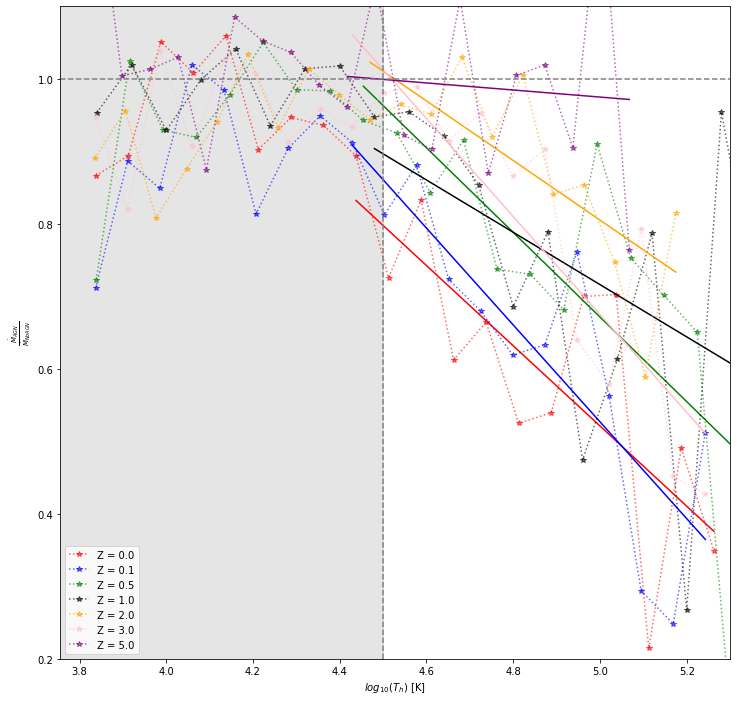

In [68]:
SNs = np.array([28,27,23,19,15,12,8])
Zs = np.array([0,0.1,0.5,1,2,3,5])
Ranges = np.array([[3.8,5.3],[3.8,5.28],[3.8,5.34],[3.8,5.4],[3.8,5.21],[3.8,5.28],[3.8,5.1],[3.8,4.8]])
# SNs = np.array([23,24,25])
colours = ['red','blue','green','black','orange','pink','purple', 'brown']
fig, axes = plt.subplots(ncols = 1, nrows = 1, sharex = True, figsize = (12,12))
critValues = []
for SN,Z,Range,col in zip(SNs,Zs,Ranges,colours):
    title = 'SnapShot{}'.format(SN)
    ER = EA.eagleReduction('test')
    cosmo = cosmology.setCosmology('planck18')

    ER.LoadInData(eagle.dataStorage[title], ['GuessSFR', 'RefSFR', 'GuessMass', 'RefMass', 'GuessVmax', 'RefVmax', 'GuessSM', 'RefSM', 'RedShift'])
    Hz = cosmo.Hz(0)
    
#     print(ER.Storage.keys())
    ER.Storage['Hz'] = cosmo.Hz(ER.Storage['RedShift'])
    ER.Storage['GuessVh'] = ((6.67e-11) * (ER.Storage['GuessMass']) * 10 * ER.Storage['Hz'])**(1./3)
    ER.Storage['RefVh'] = ((6.67e-11) * (ER.Storage['RefMass']) * 10 * ER.Storage['Hz'])**(1./3)

    ER.Storage['GuessTh'] = ( 3.6 *(1e5) ) * (ER.Storage['GuessVh']/100)**2
    ER.Storage['RefTh'] = ( 3.6 *(1e5) ) * (ER.Storage['RefVh']/100)**2

    ER.Storage['GuessTmax'] =  (3.6 *(1e5) ) * (ER.Storage['GuessVmax']/100)**2
    ER.Storage['RefTmax'] =  (3.6 *(1e5) ) * (ER.Storage['RefVmax']/100)**2

    ER.Storage['GuessSSFR'] = ER.Storage['GuessSFR'] / ER.Storage['GuessSM']
    ER.Storage['RefSSFR'] = ER.Storage['RefSFR'] / ER.Storage['RefSM']
    ER.Storage['SFRratio'] = ER.Storage['RefSSFR'] / ER.Storage['GuessSSFR']
    ER.Storage['SFRDifference'] = ER.Storage['RefSSFR'] - ER.Storage['GuessSSFR']


    print(np.log10(min(ER.Storage['RefTh'])), np.log10(max(ER.Storage['RefTh'])))
    ER.Binning( 20, 'RefTh', 'SFRratio', Range, loggedBins = True, loggedValues = False)
    ER.Binning( 20, 'RefTh', 'RefSSFR', Range, loggedBins = True, loggedValues = True)
    ER.Binning( 20, 'GuessTh', 'GuessSSFR', Range, loggedBins = True, loggedValues = True)



    x = ER.binStorage['RefTh vs SFRratio']['binCenters']
    y = (ER.binStorage['RefTh vs SFRratio']['Median'])
    yUp,yDown = ER.binStorage['RefTh vs SFRratio']['Percentile75'], ER.binStorage['RefTh vs SFRratio']['Percentile25']
    axes.plot(x,y, label = 'Z = {}'.format(Z),marker='*',color=col,linestyle=':',alpha=0.6)
    
    
#     axes.fill_between(x, yUp, yDown, alpha = 0.1, color = col)

    
    
    #Initial Guess Values
    initGuess = [12,1,10]
    mask = x>4.4
    xObs = x[mask]
    yObs = y[mask]
    # Fitting the Model to the Data
    pOpt , pCov = curve_fit(testModel, xObs, yObs)

    params = pOpt
    errors = np.sqrt(np.diag(pCov))

    DoF = len(xObs) - len(params)
    chiSq = round(ChiSq(xObs,yObs,params), 1 - int(math.floor(math.log10(abs(ChiSq(xObs,yObs,params))))) - 1)
    rChiSq = round(chiSq/DoF, 1 - int(math.floor(math.log10(abs(chiSq/DoF)))) - 1)
    # Critical Value 
    critValue = (1 - params[1]) / params[0]
    critError = np.sqrt(np.sum(errors**2))

    critError =  round(critError, 1 - int(math.floor(math.log10(abs(critError)))) - 1)
    critValue = round(critValue, 1)
    critValues.append([SN,critValue])
#     print('ChiSquared: {} \n Reduced ChiSquare: {} \n Fitted Parameters: {}, {} \n Parameter Errors: {}, {} \n Critical Value: {} \n Critical Value Error: {}'.format(chiSq, rChiSq, *np.round(params,2), *np.round(errors,2), critValue, critError ))
#     print('---------------------------------')
    axes.plot(xObs, testModel(xObs, *pOpt), color = col )


    
    
#     x = ER.binStorage['RefTh vs RefSSFR']['binCenters']
#     y = ER.binStorage['RefTh vs RefSSFR']['Median']
#     yUp,yDown = ER.binStorage['RefTh vs RefSSFR']['Percentile75'], ER.binStorage['RefTh vs RefSSFR']['Percentile25']

#     axes[1].scatter(x,y, label = 'Snapshot = {}'.format(SN))
#     axes[1].fill_between(x, yUp, yDown, alpha = 0.2,color = 'red')

#     x = ER.binStorage['GuessTh vs GuessSSFR']['binCenters']
#     y = ER.binStorage['GuessTh vs GuessSSFR']['Median']
#     yUp,yDown = ER.binStorage['GuessTh vs GuessSSFR']['Percentile75'], ER.binStorage['GuessTh vs GuessSSFR']['Percentile25']

#     axes[1].scatter(x,y,color='blue')
#     axes[1].fill_between(x, yUp, yDown, alpha = 0.2,color = 'blue')


axes.set_xlabel(r'$log_{10}(T_h)$ [K]')
axes.set_ylabel(r'$\frac{\dot{M}_{AGN}}{\dot{M}_{NoAGN}}$')

axes.legend()
axes.set_ylim(top=1.1, bottom = 0.2)
axes.set_xlim(right = 5.3)
# Define Two Regions as a coloured Region
axes.axvspan(2,4.5, color = 'gray', alpha = 0.2)
axes.axhline(1, linestyle = '--', color = 'gray')
axes.axvline(4.5, linestyle = '--', color = 'gray') 
fig.show()
    
print(critValues)
    
    
    
    
    
    

In [20]:

print(SNs)
print(eagle.timeData[:10])

[28 27 23 19 15 12  8  4]
SnapNum      Z      LookBackTime  refZ    AgeOfUniverse   
------- ----------- ------------ ----- -------------------
    0.0 20.00002119  13.63873564  20.0 0.16026435999999933
    1.0  15.1323108  13.55123493 15.13  0.2477650699999998
    2.0  9.99303373  13.34299545  9.99  0.4560045499999994
    3.0  8.98787474  13.26939663  8.99  0.5296033700000002
    4.0  8.07461608  13.18443969  8.07  0.6145603099999999
    5.0  7.04956604  13.05959447  7.05  0.7394055299999991
    6.0  5.97116243  12.87707213  5.97  0.9219278699999993
    7.0   5.4874151  12.77004409  5.49  1.0289559099999988
    8.0  5.03723649  12.65093052  5.04  1.1480694800000002
    9.0  4.48521382  12.47098305  4.49  1.3280169500000003


# Energy Balance Graph Creation

## Halo Mass Function

In [2]:
#Importing Relevant Modules
import numpy as np
import matplotlib.pyplot as plt
import eagleAnalysisTools as EAT
import eagleAnalysis as EA
from colossus.cosmology import cosmology
from scipy.optimize import curve_fit
import math
from scipy import stats
from scipy.stats import chisquare
import uncertainties.unumpy as unp
import uncertainties as unc
from colossus.lss import mass_function
from colossus.cosmology import cosmology

storageLocation = 'C:/Users/samue/Documents/University Work/Year 4/Quasars/DataStorage/haloDistributionFunction/'
size = 100

In [2]:
# EAGLE query for the relevant Data
def queryDefine(sim, snap):
    dataBaseQuery = "SELECT \
            SH.MassType_DM as HaloMass, \
            SH.Redshift as Z, \
            SH.Snapnum as SnapShot, \
            SH.SubGroupNumber \
        FROM \
            {}_SubHalo as SH \
        WHERE \
            SH.Snapnum = {}".format(sim,snap)
    return dataBaseQuery

# Variables specifying the Query
randomNumber = 1
simulation = "DMONLY..L0100N1504"
# simulation = "RefL0100N1504"

storageLocation = 'C:/Users/samue/Documents/University Work/Year 4/Quasars/DataStorage/haloDistributionFunction/'


# Undertaking the Query for the relevant snapshots and saving it in the eagle class 
snapShots = [28, 19, 8, 5, 2, 0]
redshifts = [0, 1, 5, 7, 10, 20]

eagle = EAT.eagleData(randomNumber, simulation, storageLocation)

for Z, SN in zip(redshifts, snapShots):
    title = "DarkMatterZ{}".format(Z)
    eagle.DatabaseQuery(title, queryDefine(simulation, SN))

14/04/2021 21:21:43 | Querying Database ... 


KeyboardInterrupt: 

[ 9.         14.64398524]
Reduced Chi Squared Fit | z = 0 | 59.782408883165616
[ 9.         14.01999836]
Reduced Chi Squared Fit | z = 1 | 58.06613266175443
[ 9.         12.33130361]
Reduced Chi Squared Fit | z = 5 | 57.68238936784148
[ 9.         11.81525118]
Reduced Chi Squared Fit | z = 7 | 60.851205148379144
[ 9.         11.06198211]
Reduced Chi Squared Fit | z = 10 | 66.58803449909455
[-3.92081875 -4.26760624 -4.69897    -5.         -5.22184875] [-4.16098406 -4.44955673 -4.76674744 -5.12897323 -5.55748507]
[-3.73048706 -4.05551733 -4.23657201 -4.85387196 -5.22184875] [-3.83781059 -4.148405   -4.49273641 -4.87967513 -5.32537478]
[-3.5654311  -3.86012091 -4.25181197 -4.49485002 -5.09691001] [-3.62119956 -3.9567449  -4.32644685 -4.73627448 -5.19229569]
[-3.79588002 -4.09691001 -4.79588002 -4.74472749 -5.09691001] [-3.91747503 -4.2631154  -4.6360224  -5.03882223 -5.47438452]
[-4.05551733 -4.4436975  -4.92081875 -5.22184875 -5.39794001] [-4.28468447 -4.57557826 -4.88091187 -5.20183517 

<ipython-input-181-08a7c66757fa>:69: RuntimeWarning: divide by zero encountered in log10
  y = np.log10(HMD * (h**3))


Text(0, 0.5, 'Normalised \\n Residuals')

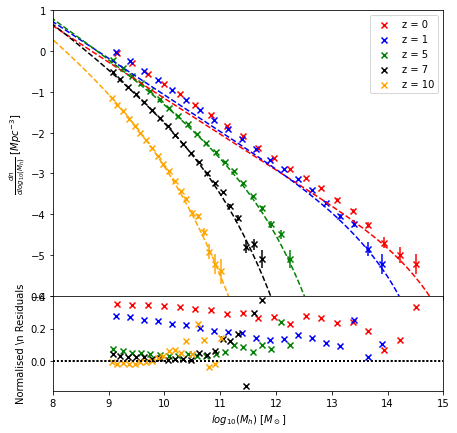

In [181]:
# Setting up Limits and Restrictions
dataSetRedshift = 7
size = 100**3
snapShots = [28, 19, 8, 5, 2, 0]
redshifts = [0, 1, 5, 7, 10, 20]
h = 0.6777 
scale = 2
numBins = 10 *scale
model = 'reed07'
percentiles = [60,40]
colours = ['red','blue','green','black','orange']
markers = ['x', 'o']
low = 1
high = 16
massRange = np.logspace(low,high,1000,base=10)
residuals = {}
ER = EA.eagleReduction(storageLocation)
cosmo = cosmology.setCosmology('planck18')



fig, axes = plt.subplots(ncols = 1, nrows = 2, sharex = True, figsize = (7,7), gridspec_kw={'height_ratios': [3, 1]})
plt.subplots_adjust(hspace = 0)


#Looping over all of the queried datasets
for z, col in zip(redshifts, colours):
    #Set the Dataset required
    title = "DarkMatterZ{}".format(z) 
    #Establishing dataRanges for specific dataSet
    dataRange = np.log10( np.array([ 10**9 , max( eagle.dataStorage[title]['HaloMass'] ) ]))
    print(dataRange)
    n, bins = np.histogram(np.log10( eagle.dataStorage[title]['HaloMass']), bins = numBins, range = (dataRange[0], dataRange[1]))

    # Plotting Data
    x = np.array( [ ((bins[i] + bins[i+1])/2) for i in range(len(bins) - 1)  ] ) 
    y = np.log10( n  / size ) + np.log10(scale)

    # Calculating Errors
    error = np.sqrt(n) / size
    error = error / (np.log(10) * (n  / size))


    axes[0].errorbar(x, y, yerr = error, fmt = 'none', color = col) 
    axes[0].scatter(x, y, color = col, marker = 'x', label = 'z = {}'.format(z))




    # Creating a ChiSquared Test for the data fitting to colossus model
    TestCondition = x > 9
    xTest = x[TestCondition]
    yTest =  np.log10( mass_function.massFunction(xTest, z, q_out = 'dndlnM', model = model) * (h**3))
    # print(y, yTest)
    Chi = chisquare(f_obs=y[x>9], f_exp=yTest) / np.sqrt(len(xTest))
    print("Reduced Chi Squared Fit | z = {} | {}".format(z,Chi[0]))
    
        
    residuals[z] = [x,y]


axes[0].legend()

#Add the Halo Mass Function from the Colossus package
for z, col in zip(redshifts,colours):
    HMD = mass_function.massFunction(massRange, z, q_out = 'dndlnM', model = model)
    x = np.log10(massRange)
    # y = HMD
    y = np.log10(HMD * (h**3))


    axes[0].plot(x,y, label = "z = {}".format(z), linestyle= '--', color = col)
    
#     #Plotting Residuals
    xAGN, yAGN = residuals[z][0], residuals[z][1] 
    yModelAGN = np.log10(mass_function.massFunction(10**xAGN, z, q_out = 'dndlnM', model = model)* (h**3))
    print(yAGN[-5:], yModelAGN[-5:])
    
    
    axes[1].scatter(xAGN, yAGN - yModelAGN , color = col, marker = 'x', label = 'z = {}'.format(z))
    axes[1].axhline(0, linestyle = ':', color = 'black')



axes[0].set_ylim(-6,1)
axes[0].set_xlim(8,15)
axes[1].set_xlabel(r'$log_{10}(M_h)$ [$M_\odot$]')
axes[0].set_ylabel(r'$\frac{dn}{dlog_{10}(M_h)}$ $[Mpc^{-3}]$')


axes[1].set_ylabel(r'Normalised \n Residuals')

# plt.show()






## Star Formation Density

In [ ]:
# EAGLE query for the relevant Data
def queryDefine(sim, snap):
    dataBaseQuery = "SELECT \
            SH.MassType_DM as HaloMass, \
            SH.Redshift as Z, \
            SH.Snapnum as SnapShot, \
            SH.SubGroupNumber, \
            SH.StarFormationRate as SFR \
        FROM \
            {}_SubHalo as SH \
        WHERE \
            SH.MassType_DM > 0 AND \
            SH.MassType_Star > 0".format(sim)
    return dataBaseQuery

# Variables specifying the Query
randomNumber = 1
simulation = "RefL0100N1504"

storageLocation = 'C:/Users/samue/Documents/University Work/Year 4/Quasars/DataStorage/haloDistributionFunction/'


# Undertaking the Query for the relevant snapshots and saving it in the eagle class
eagle = EAT.eagleData(randomNumber, simulation, storageLocation)

title = "AllGalaxies"
eagle.DatabaseQuery(title, queryDefine(simulation, SN))
eagle.linkTimes(title)

14/04/2021 21:21:51 | Querying Database ... 


In [ ]:
# Setting up Limits and Restrictions
size = 100**3
redshifts = [0, 1, 5, 7, 10]
h = 0.6777
numBins = 15
model = 'reed07'
percentiles = [60,40]
colours = ['red','blue','green','black','orange']
markers = ['x', 'o']
low = 1
high = 16
massRange = np.logspace(low,high,1000,base=10)
residuals = {}
ER = EA.eagleReduction(storageLocation)
cosmo = cosmology.setCosmology('planck18')



SFdensity = []
SNs = np.arange(0,29)
Redshifts = np.array(eagle.timeData['Z'])

#Looping over all of the queried datasets
for SN in SNs:
    print(SN)
    #Set the Dataset required
    mask = eagle.dataStorage[title]['SnapShot'] == SN
    #Establishing dataRanges for specific dataSet
    SFdensity.append(sum(eagle.dataStorage[title]['SFR'][mask]))

SFdensity = np.array(SFdensity)

Text(0, 0.5, 'Normalised \\n Residuals')

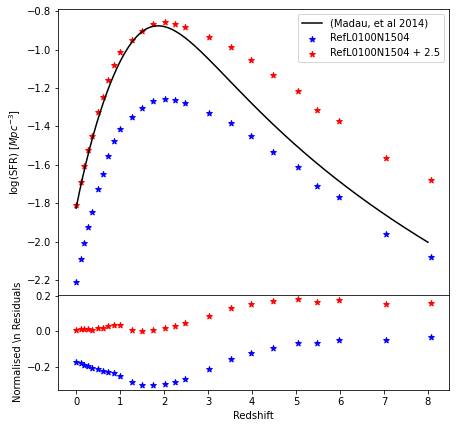

In [176]:
fig, axes = plt.subplots(ncols = 1, nrows = 2, sharex = True, figsize = (7,7), gridspec_kw={'height_ratios': [3, 1]})
plt.subplots_adjust(hspace = 0)

mask = Redshifts < 8.5
h = 0.6777 

# Plotting Data
x = np.array(Redshifts[mask])
y = np.log10( (SFdensity) / size )[mask] 
yCorr = y+ np.log10(2.5)
# Calculating Errors
axes[0].scatter((x), y, label = simulation, color = 'blue', marker='*')
axes[0].scatter(x,yCorr, label = '{} + 2.5'.format(simulation),color='red', marker='*')
        
    
zRange = np.linspace(0,8,1000)
yModel = np.log10( 0.015 * ( ((1 + zRange)**2.7) / (1 + ((1+zRange)/2.9)**5.6)))
    
axes[0].plot((zRange), yModel, color='black', label = '(Madau, et al 2014)')
    
# Plotting Residuals

yModel = np.log10(0.015 * ( ((1 + x)**2.7) / (1 + ((1+x)/2.9)**5.6)))
axes[1].scatter(x, (y-yModel)/abs(y), color = 'blue', marker='*')
axes[1].scatter(x, (yCorr-yModel)/abs(y), color = 'red', marker='*')



    
axes[0].legend()
# axes[0].set_ylim(-6,2)
# axes[0].set_xlim(2,6)
axes[1].set_xlabel(r'Redshift')
axes[0].set_ylabel(r'log(SFR) [$Mpc^{-3}$]')
axes[1].set_ylabel(r'Normalised \n Residuals')

## Measuring Constants


In [13]:
# EAGLE query for the relevant Data
def queryDefine(sim):
    dataBaseQuery = "SELECT \
            SH.MassType_DM as HaloMass, \
            SH.Redshift as Z, \
            SH.Snapnum as SnapShot, \
            SH.SubGroupNumber, \
            SH.StarFormationRate as SFR, \
            SH.TopLeafID, \
            SH.Vmax, \
            SH.MassType_Star as SM \
        FROM \
            {}_SubHalo as SH \
        WHERE \
            SH.MassType_DM > 0 AND \
            SH.MassType_Star > 0".format(sim)
    return dataBaseQuery

# Variables specifying the Query
randomNumber = 1
simulation = "NoAGNL0050N0752"

storageLocation = 'C:/Users/samue/Documents/University Work/Year 4/Quasars/DataStorage/haloDistributionFunction/'


# Undertaking the Query for the relevant snapshots and saving it in the eagle class
eagle = EAT.eagleData(randomNumber, simulation, storageLocation)

title = "AllGalaxies"
eagle.DatabaseQuery(title, queryDefine(simulation))
eagle.linkTimes(title)

18/04/2021 20:03:02 | Querying Database ... 
18/04/2021 20:04:45   |  Query Time: 102.93s
Sorting Data into Astropy Table ...
18/04/2021 20:04:45   |  Sort Time: 0.04s
Adding Time Data to AllGalaxies ...


In [28]:
import pickle
dataSet = title
xPlotting = 'avTh'
binningRange = [4,5]
# binningRange = [1.5, 2.7]
loadData = True
loadName = "EnergyBalance2.p"
numBins = 20

# Establishing Analysis Tool
ER = EA.eagleReduction(storageLocation)
cosmo = cosmology.setCosmology('planck18')

if not loadData:
    # Variables I Want For The Analysis
    properties = ['TopLeafID', 'HaloMass' ,'Z', 'SnapShot', 'AgeOfUniverse', 'Vmax', 'SFR', 'SM' ]
    ER.LoadInData(eagle.dataStorage[dataSet], properties)
    # Units Conversion
    ER.Storage['Hz'] = cosmo.Hz(ER.Storage['Z']) / (ER.parsec * 1000)                           #Units of /s

        
    # Calculating Composite Values
    ER.Storage['Vh'] = (ER.G * ER.Storage['HaloMass'] * 10 * ER.Storage['Hz'])**(1./3) * (ER.SolarMass)**(1./3) / 1000   #Units of km/s
    ER.Storage['Tmax'] = ( 3.6 *(1e5) ) * (ER.Storage['Vmax']/100)**2                           #Units of K
    ER.Storage['Th'] = ( 3.6 *(1e5) ) * (ER.Storage['Vh']/100)**2                               #Units of K
    ER.Storage['sSFR'] = ER.Storage['SFR'] / ER.Storage['SM']                                   #Units of /s
    
    

    # Variables I want for Plotting
    namesRate = [ 'DMAR', 'SMAR']
    propertiesRate = [ 'HaloMass', 'SM']
    ER.RateValues(namesRate, propertiesRate, 'AgeOfUniverse', perGal = True)

    namesAv = ['avTh', 'avVh', 'avSFR']
    propertiesAv = ['Th', 'Vh', 'SFR']
    ER.AverageValues(namesAv, propertiesAv, perGal = True)

    namesDiff = ['diffTimes']
    propertiesDiff = ['AgeOfUniverse']
    ER.DifferenceValues(namesDiff, propertiesDiff, perGal = True)

    # ER.Storage['SMAR'] = ER.Storage['avSFR'] * ER.Storage['diffTimes'] *10**9
    pickle.dump(ER.Storage, open(loadName,"wb") )

else:
    ER.Storage = pickle.load(open(loadName, "rb"))


# Creating Plotting Variables
ER.Storage['SMARvsDMAR'] = (ER.Storage['avSFR'] * ER.Vstar**2) /  (ER.Storage['DMAR'] * ER.Storage['avVh']**2 )
ER.Storage['sSFR'] = ER.Storage['SFR'] / ER.Storage['SM']
# ER.Storage['SMAR'] = (ER.Storage['SMAR'] * ER.Vstar**2)
# ER.Storage['DMAR'] = (ER.Storage['HaloMass'] * ER.Storage['avVmax']**2 )
    
#Conduct Binning
print(np.log10(min(ER.Storage[xPlotting])),np.log10(max(ER.Storage[xPlotting])))
ER.Binning(numBins, xPlotting, 'SMARvsDMAR', binningRange, loggedBins = True, loggedValues = True)
ER.Binning(numBins, xPlotting, 'avSFR', binningRange, loggedBins = True, loggedValues = True)
ER.Binning(numBins, xPlotting, 'DMAR', binningRange, loggedBins = True, loggedValues = True)
ER.Binning(numBins, 'Th', 'sSFR', binningRange, loggedBins = True, loggedValues = True)



# plt.plot(ER.binStorage['{} vs SMAR'.format(xPlotting)]['binCenters'], ER.binStorage['{} vs SMAR'.format(xPlotting)]['Median'], label='Star')
# plt.plot(ER.binStorage['{} vs DMAR'.format(xPlotting)]['binCenters'], ER.binStorage['{} vs DMAR'.format(xPlotting)]['Median'], label='DM')
# plt.legend()
# plt.show()


# print(ER.Vagn, ER.Storage['avVh'][:10])

<ipython-input-28-6e4665bb1087>:51: RuntimeWarning: divide by zero encountered in true_divide
  ER.Storage['SMARvsDMAR'] = (ER.Storage['avSFR'] * ER.Vstar**2) /  (ER.Storage['DMAR'] * ER.Storage['avVh']**2 )
<ipython-input-28-6e4665bb1087>:51: RuntimeWarning: invalid value encountered in true_divide
  ER.Storage['SMARvsDMAR'] = (ER.Storage['avSFR'] * ER.Vstar**2) /  (ER.Storage['DMAR'] * ER.Storage['avVh']**2 )


2.5304821985753305 7.315885634284232


In [19]:
x = (np.log10(ER.Storage['avTh']))
print(min(x))

2.5304821985753305


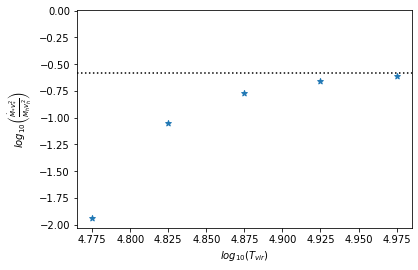

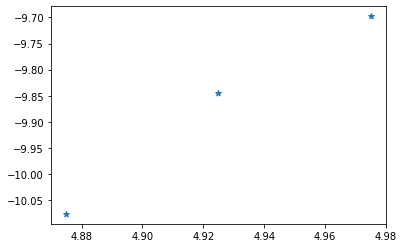

In [29]:
title = 'avTh vs SMARvsDMAR'
xLab = r'$log_{10}(T_{vir})$'
yLab = r'$log_{10}\left(\frac{\dot{M}_{*}v^2_{*}}{\dot{M}_{h}v^2_h} \right)$'

x = ER.binStorage[title]['binCenters']
y = ER.binStorage[title]['Median']
yUp = ER.binStorage[title]['Percentile75']
yDown = ER.binStorage[title]['Percentile25']


plt.scatter(x,y,marker='*')
plt.fill_between(x,yUp,yDown,alpha=0.2)
plt.axhline(np.log10(ER.kappa * ER.OmegaB), linestyle = ':', color = 'black')
plt.xlabel(xLab)
plt.ylabel(yLab)
plt.show()

title = 'Th vs sSFR'
x = ER.binStorage[title]['binCenters']
y = ER.binStorage[title]['Median']
yUp = ER.binStorage[title]['Percentile75']
yDown = ER.binStorage[title]['Percentile25']
plt.scatter(x,y,marker='*')


## Exponential Growth

In [14]:
# EAGLE query for the relevant Data
def queryDefine(sim):
    dataBaseQuery = "SELECT \
            SH.MassType_DM as HaloMass, \
            SH.Redshift as Z, \
            SH.Snapnum as SnapShot, \
            SH.SubGroupNumber, \
            SH.StarFormationRate as SFR, \
            SH.BlackHoleMass as BHM, \
            SH.MassType_Star as SM \
        FROM \
            {}_SubHalo as SH \
        WHERE \
            SH.MassType_DM > 0 AND \
            SH.MassType_Star > 0".format(sim)
    return dataBaseQuery

# Variables specifying the Query
randomNumber = 1
simulation = "RefL0100N1504"

storageLocation = 'C:/Users/samue/Documents/University Work/Year 4/Quasars/DataStorage/haloDistributionFunction/'


# Undertaking the Query for the relevant snapshots and saving it in the eagle class
eagle = EAT.eagleData(randomNumber, simulation, storageLocation)

title = "AllGalaxies"
eagle.DatabaseQuery(title, queryDefine(simulation))
eagle.linkTimes(title)

18/04/2021 23:09:06 | Querying Database ... 
18/04/2021 23:19:54   |  Query Time: 648.28s
Sorting Data into Astropy Table ...
18/04/2021 23:19:54   |  Sort Time: 0.17s
Adding Time Data to AllGalaxies ...


In [15]:
ER = EA.eagleReduction(storageLocation)
cosmo = cosmology.setCosmology('planck18')
#Binning Black Hole Growth

properties = ['HaloMass' ,'Z', 'SnapShot', 'AgeOfUniverse', 'SFR', 'BHM', 'SM' ]
ER.LoadInData(eagle.dataStorage[title], properties)


ER.Binning(20, 'HaloMass', 'BHM', [9,13], loggedBins = True, loggedValues = True)


C:\Users\samue\Dropbox\Samuel Hayes - L4 Project - A Model for the Evolution of Quasars\Jupyter Notebook FIles\Epiphany\eagleAnalysis.py:113: RuntimeWarning: divide by zero encountered in log10
  valuesToBeBinned = np.array( np.log10( self.Storage[variableToBeBinned] ) )
C:\Users\samue\Dropbox\Samuel Hayes - L4 Project - A Model for the Evolution of Quasars\Jupyter Notebook FIles\Epiphany\eagleAnalysis.py:139: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  binDataStorage['rawBinnedData'] = np.array(binnedDataTemp)
C:\Python39\lib\site-packages\numpy\lib\function_base.py:3968: RuntimeWarning: invalid value encountered in multiply
  x2 = take(ap, indices_above, axis=axis) * weights_above


[]

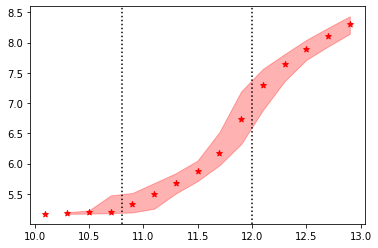

In [16]:
binTitle = 'HaloMass vs BHM'

x = ER.binStorage[binTitle]['binCenters']
y = ER.binStorage[binTitle]['Median']
yUp,yDown = ER.binStorage[binTitle]['Percentile75'], ER.binStorage[binTitle]['Percentile25']

plt.scatter(x,y,marker='*',color='red')
plt.fill_between(x,yUp,yDown,alpha=0.3,color='red')
        
plt.axvline(12, linestyle=':',color='black')
plt.axvline(10.8, linestyle=':',color='black')

plt.plot()

In [15]:
cosmo.Hz(0)

67.66